In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import matplotlib as mpl
import numpy as np


plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
df = pd.read_csv('covid.csv')

In [3]:
df.sample(5)

id  sex  patient_type  entry_date date_symptoms   date_died  \
484022  113c75    1             2  20-05-2020    20-05-2020  9999-99-99   
197618  09d346    1             1  12-06-2020    10-06-2020  9999-99-99   
477690  19e1c0    1             2  18-05-2020    18-05-2020  9999-99-99   
497871  0bf735    2             1  14-05-2020    07-05-2020  9999-99-99   
394270  119007    2             2  26-04-2020    26-04-2020  9999-99-99   

        intubed  pneumonia  age  pregnancy  ...  inmsupr  hypertension  \
484022        1          1   66          2  ...        2             1   
197618       97          1   62          2  ...        2             1   
477690        2          2   72          2  ...        2             1   
497871       97          2   49         97  ...        2             1   
394270        2          2   69         97  ...        2             1   

        other_disease  cardiovascular  obesity  renal_chronic  tobacco  \
484022              2               1        2              2        2   
197618              2               2        2              2        2   
477690              2               2        1              2        2   
497871              2               2        1              2        2   
394270              1               2        2              1        1   

        contact_other_covid  covid_res  icu  
484022                    2          2    2  
197618                   99          1   97  
477690                   99          2    2  
497871                    2          2   97  
394270                   99          2    2  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [5]:
binary_headers = list(set(df.columns) - set(['id', 'age','entry_date','date_symptoms','date_died']))
df[binary_headers] = df[binary_headers].replace({1: 1, 2: 0, 3: np.nan, 97: np.nan, 98: np.nan, 99: np.nan})



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   566602 non-null  object 
 1   sex                  566602 non-null  float64
 2   patient_type         566602 non-null  float64
 3   entry_date           566602 non-null  object 
 4   date_symptoms        566602 non-null  object 
 5   date_died            566602 non-null  object 
 6   intubed              121789 non-null  float64
 7   pneumonia            566591 non-null  float64
 8   age                  566602 non-null  int64  
 9   pregnancy            277903 non-null  float64
 10  diabetes             564621 non-null  float64
 11  copd                 564853 non-null  float64
 12  asthma               564850 non-null  float64
 13  inmsupr              564622 non-null  float64
 14  hypertension         564778 non-null  float64
 15  other_disease    

In [7]:
df.sample(5)

id  sex  patient_type  entry_date date_symptoms   date_died  \
194917  0ccfdb  0.0           1.0  22-05-2020    22-05-2020  9999-99-99   
107631  062acd  0.0           0.0  25-05-2020    25-05-2020  12-06-2020   
205886  19791e  1.0           1.0  27-05-2020    26-05-2020  9999-99-99   
176935   58209  1.0           1.0  15-05-2020    11-05-2020  9999-99-99   
265878  0abe0a  1.0           1.0  17-06-2020    17-06-2020  9999-99-99   

        intubed  pneumonia  age  pregnancy  ...  inmsupr  hypertension  \
194917      NaN        0.0   41        NaN  ...      0.0           0.0   
107631      0.0        1.0   51        NaN  ...      0.0           1.0   
205886      NaN        0.0   40        0.0  ...      0.0           1.0   
176935      NaN        0.0   33        0.0  ...      0.0           0.0   
265878      NaN        0.0   44        0.0  ...      0.0           1.0   

        other_disease  cardiovascular  obesity  renal_chronic  tobacco  \
194917            0.0             0.0      0.0            0.0      0.0   
107631            0.0             0.0      1.0            0.0      0.0   
205886            0.0             0.0      0.0            0.0      0.0   
176935            0.0             0.0      0.0            0.0      0.0   
265878            0.0             0.0      0.0            0.0      0.0   

        contact_other_covid  covid_res  icu  
194917                  1.0        1.0  NaN  
107631                  NaN        1.0  0.0  
205886                  1.0        1.0  NaN  
176935                  1.0        1.0  NaN  
265878                  1.0        0.0  NaN  

[5 rows x 23 columns]

## Analise Descritivas dos Dados

Escolhi criar uma coluna 'died', onde temos $0$ e $1$ para pacientes que faleceram. 

Isso irar ajudar na hora de fazer alguns, plots

In [8]:
df['died'] = 1
df.loc[(df['date_died']=='9999-99-99'),'died'] = 0

Formatando os dados

In [9]:
df['entry_date'] = pd.to_datetime(df['entry_date']).dt.date
df['date_symptoms'] = pd.to_datetime(df['date_symptoms'],format = '%d-%m-%Y',utc = None,dayfirst= True).dt.date
df['date_died'] = pd.to_datetime(df['date_died'], errors = 'coerce').dt.date


### Visualização de dados

Text(0.5, 1.0, 'Distribuição de Óbito/Recuperados')

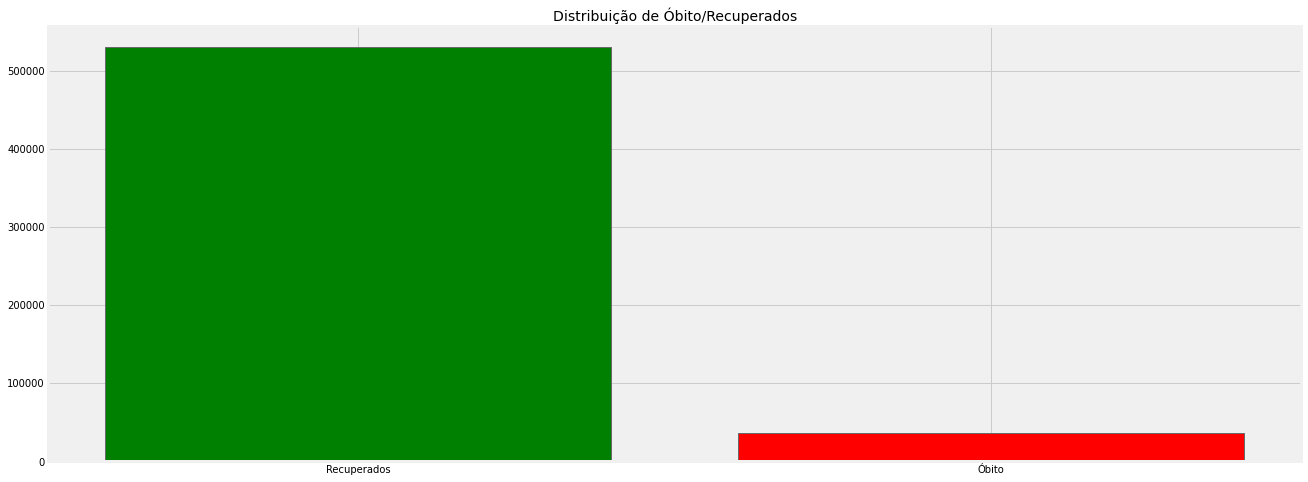

In [10]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.bar(['Recuperados','Óbito'],df['died'].value_counts(), color= ['green','r'])
plt.title('Distribuição de Óbito/Recuperados', fontsize = 14)

In [11]:
print("Temos %d"%(len(df)),"pessoas infectadas. Onde %.d"%(len(df[df['died']==1])),
      "vieram á óbito e %.d"%(len(df[df['died']==0])),'mil se recuperam')
print('Assim tivemos um taxa de letalidade nessa dataset de %.2f'%((len(df[df['died']==1])/len(df[df['died']==0]))*100),"%")

Temos 566602 pessoas infectadas. Onde 36176 vieram á óbito e 530426 mil se recuperam
Assim tivemos um taxa de letalidade nessa dataset de 6.82 %


In [12]:
print('Média de idades é %.2f'%(df['age'].mean()),'anos com desvio padrão de %.2f'%(df['age'].std()))
print('Pessoas Obesas em nossa amostra %.2f'%((len(df[df['obesity']==1])/len(df[df['obesity']==0]))*100),"%")
print('Pessoas re-infectadas em nossa amostra %.2f'%((len(df[df['covid_res']==1])/len(df[df['covid_res']==0]))*100),"%")
print('Pessoas com Hiper-tensão em nossa amostra %.2f'%((len(df[df['hypertension']==1])/len(df[df['hypertension']==0]))*100),"%")
print('Pessoas com problemas Renais em nossa amostra %.2f'%((len(df[df['renal_chronic']==1])/len(df[df['renal_chronic']==0]))*100),"%")
print('Pessoas que desenvolveram pneumonia em nossa amostra %.2f'%((len(df[df['pneumonia']==1])/len(df[df['pneumonia']==0]))*100),"%")
print('Média de idades de pessoas que viream a óbito é %.2f'%(df[df['died']==1]['age'].mean()),'anos com desvio padrão de %.2f'%(df[df['died']==1]['age'].std()))


Média de idades é 42.62 anos com desvio padrão de 16.66
Pessoas Obesas em nossa amostra 19.53 %
Pessoas re-infectadas em nossa amostra 79.08 %
Pessoas com Hiper-tensão em nossa amostra 19.59 %
Pessoas com problemas Renais em nossa amostra 2.03 %
Pessoas que desenvolveram pneumonia em nossa amostra 18.43 %
Média de idades de pessoas que viream a óbito é 60.75 anos com desvio padrão de 15.40


Text(0.5, 1.0, 'Distribuição de Óbito/Recuperados por idade')

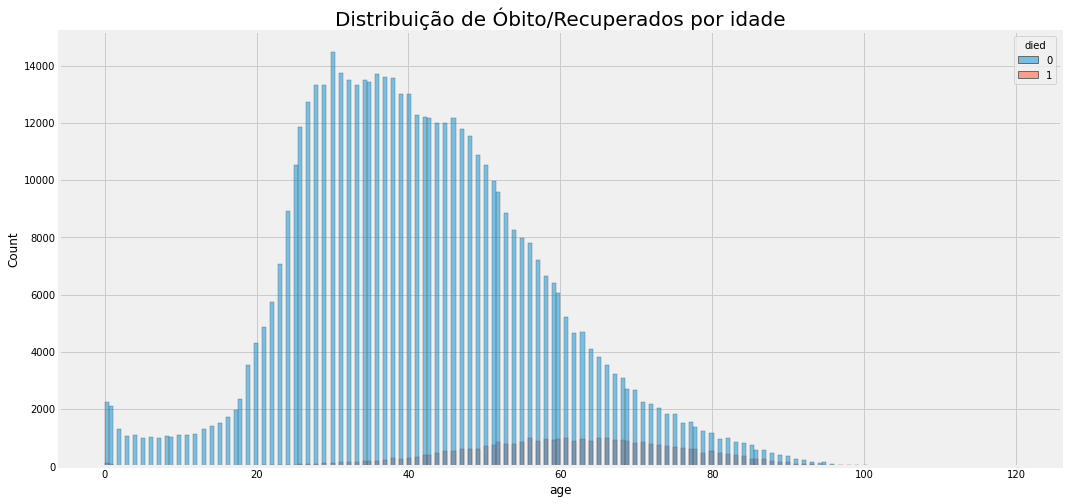

In [13]:
plt.figure(figsize =(16,8))
sns.histplot(data =df , x = 'age', hue = 'died')
plt.title('Distribuição de Óbito/Recuperados por idade', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de Óbito/Idade de pessoas que tem problemas renais')

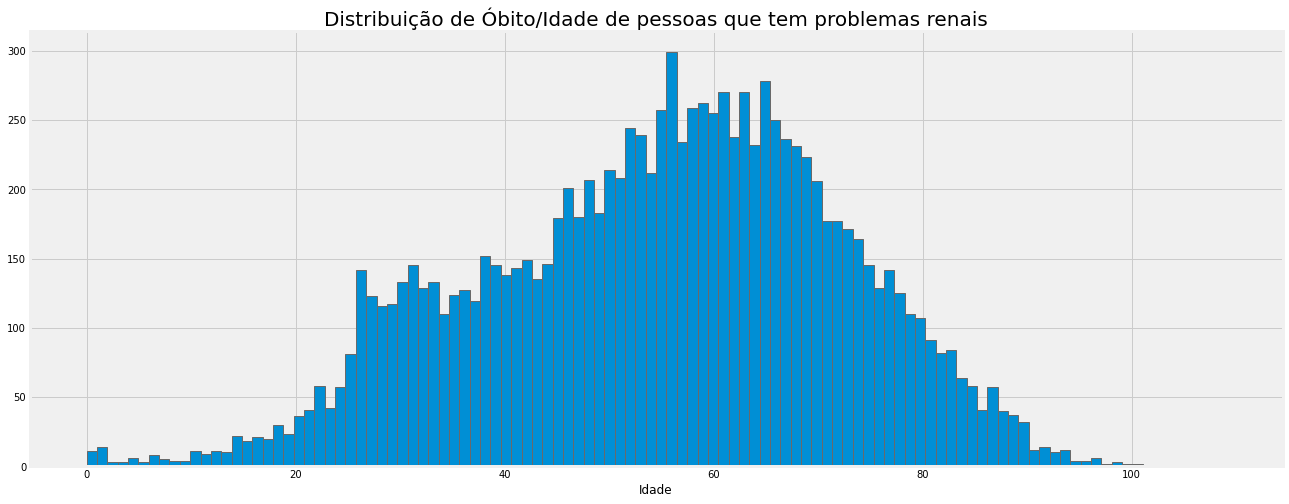

In [14]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.hist(df[df['renal_chronic']==1]['age'],bins = 110);
plt.xlabel('Idade')
plt.title('Distribuição de Óbito/Idade de pessoas que tem problemas renais', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de Óbito por idade de pessoas que tem Hipertensão')

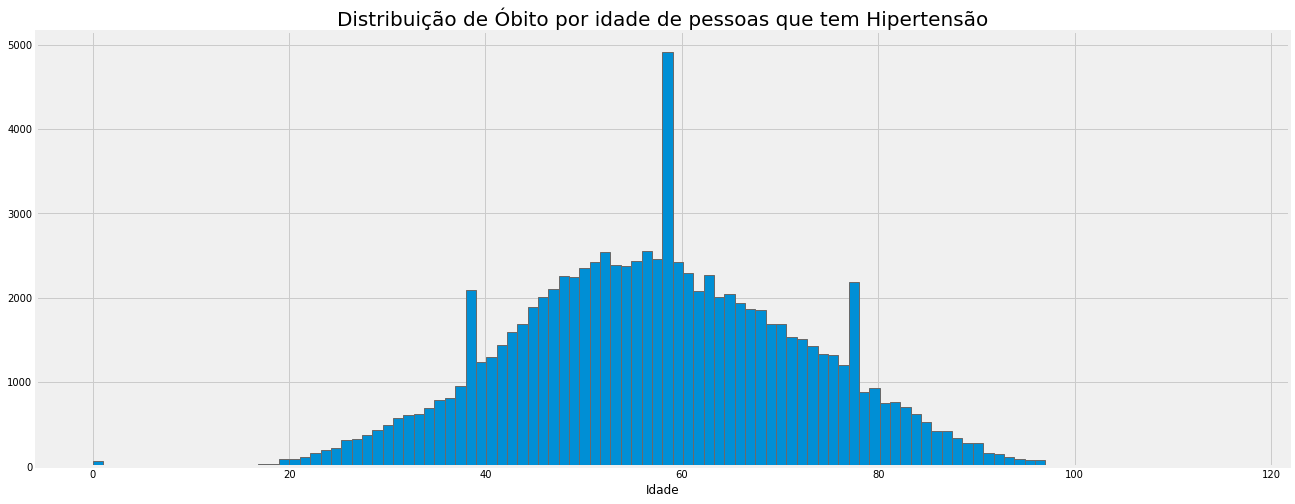

In [15]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.hist(df[df['hypertension']==1]['age'],bins = 110);
plt.xlabel('Idade')
plt.title('Distribuição de Óbito por idade de pessoas que tem Hipertensão', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de Óbito por idade de pessoas que tem Diabetes')

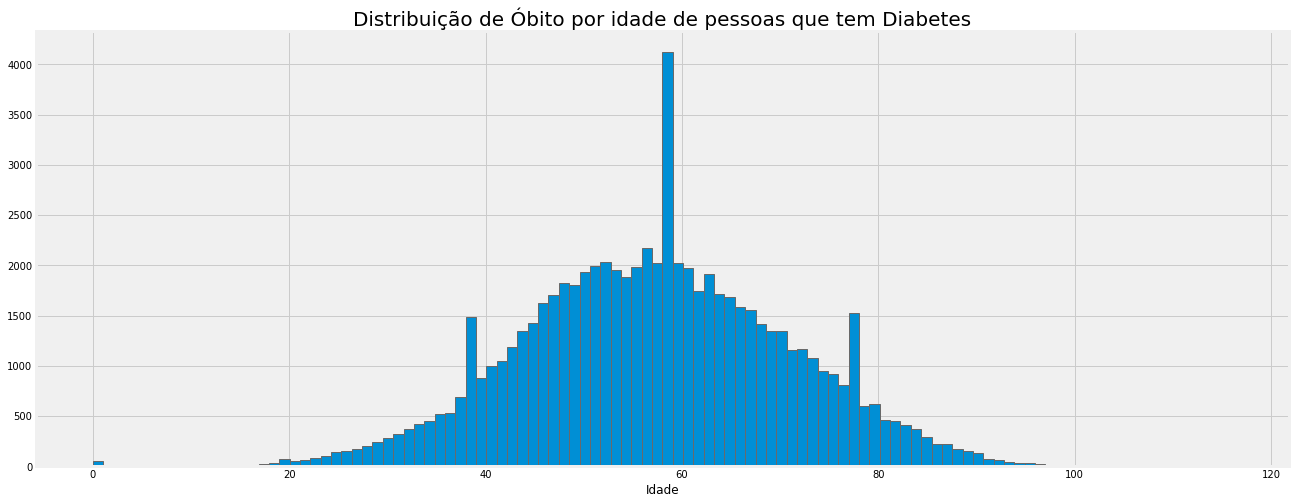

In [16]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.hist(df[df['diabetes']==1]['age'],bins = 110);
plt.xlabel('Idade')
plt.title('Distribuição de Óbito por idade de pessoas que tem Diabetes', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de Óbito por idade de pessoas que foram re-infectadas')

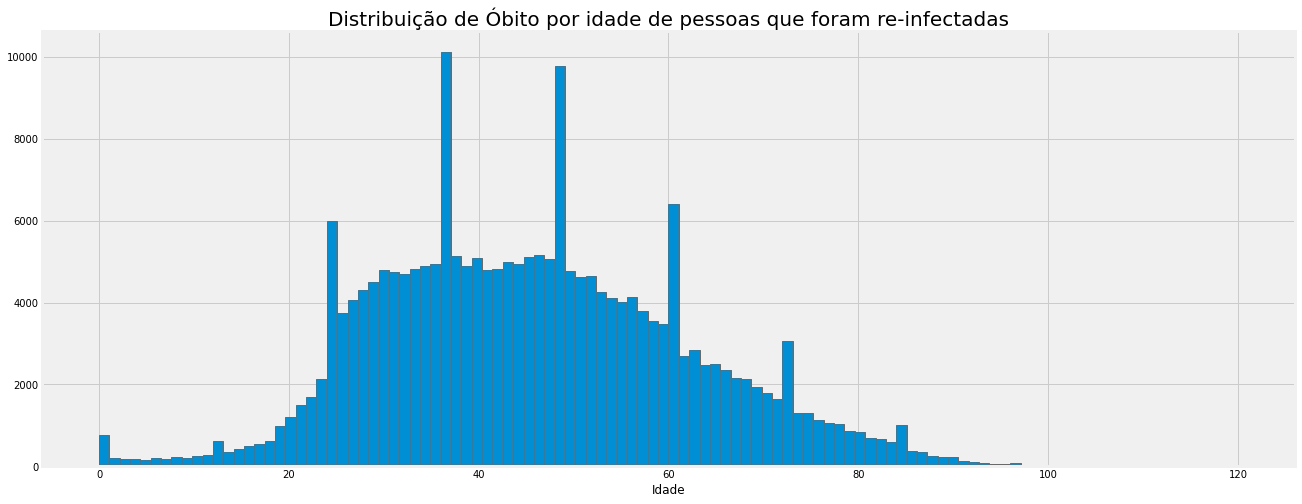

In [17]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.hist(df[df['covid_res']==1]['age'],bins = 110);
plt.xlabel('Idade')
plt.title('Distribuição de Óbito por idade de pessoas que foram re-infectadas', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de Óbito por idade de pessoas que tiveram Pneumonia')

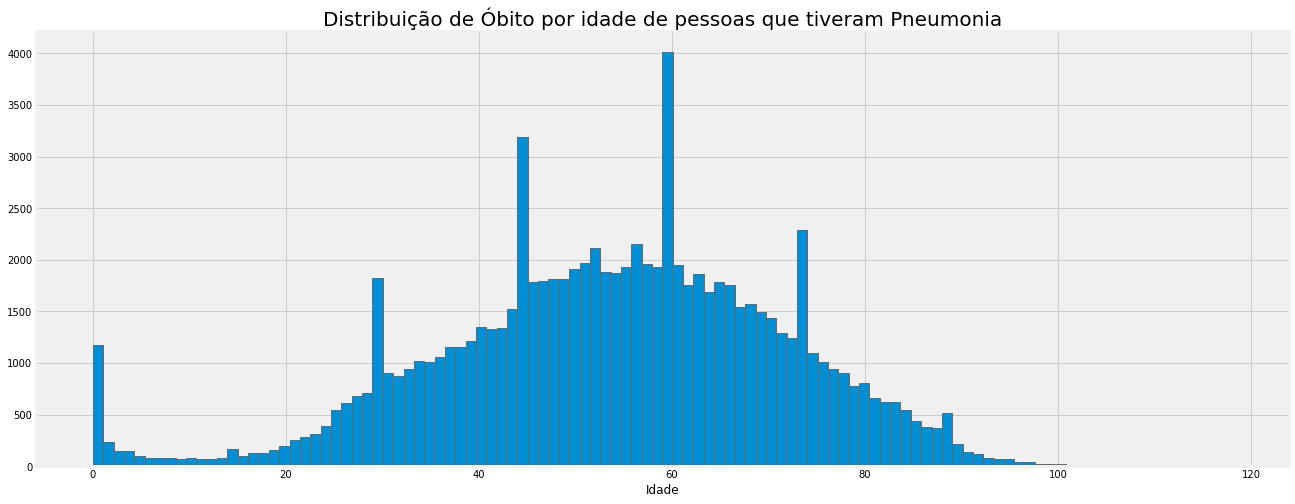

In [18]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.hist(df[df['pneumonia']==1]['age'],bins = 110);
plt.xlabel('Idade')
plt.title('Distribuição de Óbito por idade de pessoas que tiveram Pneumonia', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de Óbito por idade de pessoas que são obesas')

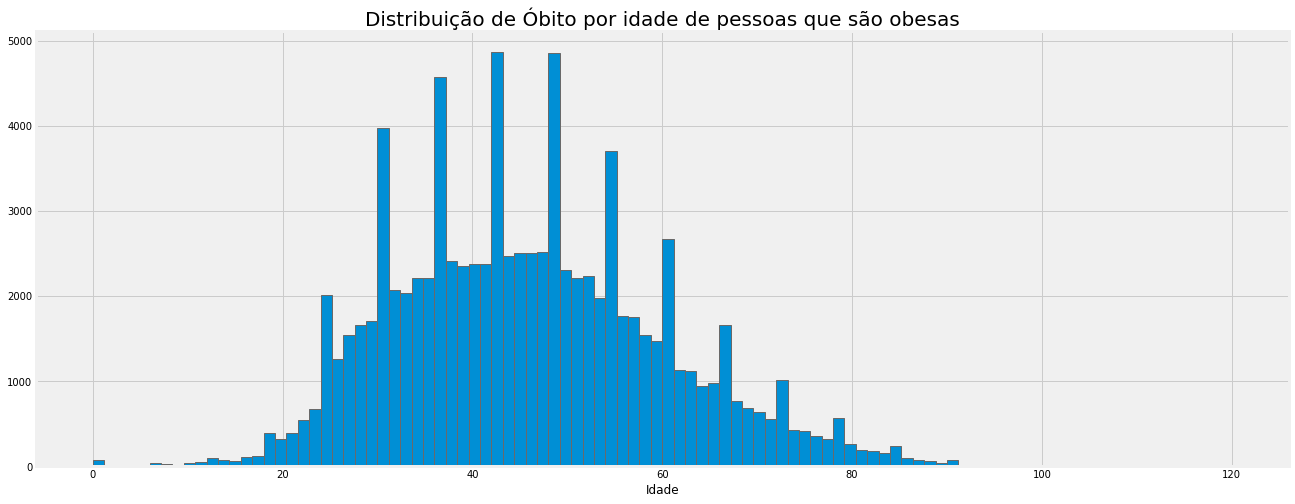

In [19]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.hist(df[df['obesity']==1]['age'],bins = 100);
plt.xlabel('Idade')
plt.title('Distribuição de Óbito por idade de pessoas que são obesas', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de Óbito idade')

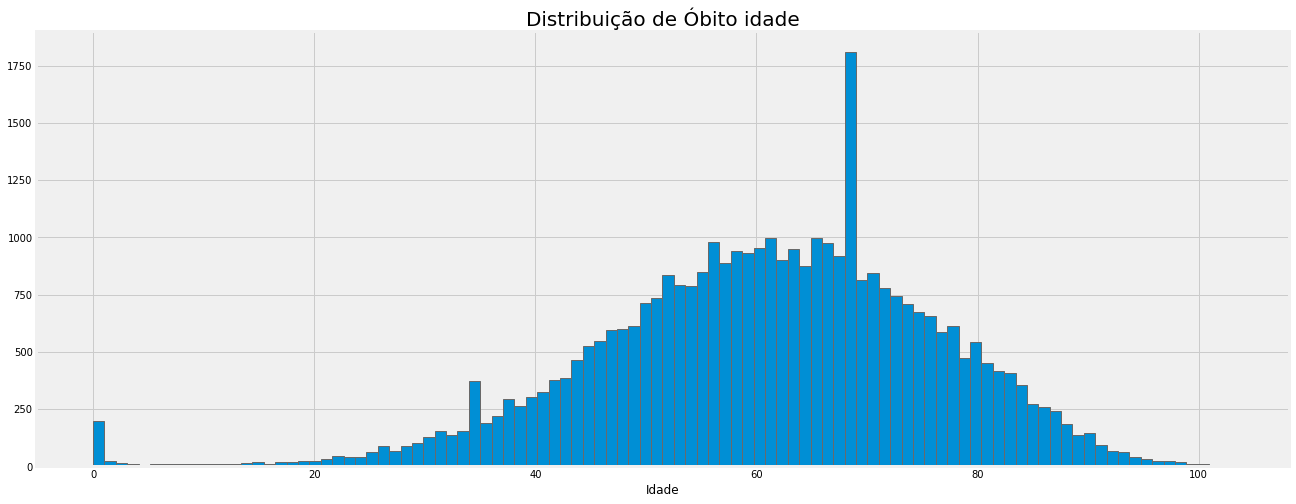

In [20]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.hist(df[df['died']==1]['age'],bins = 100);
plt.xlabel('Idade')
plt.title('Distribuição de Óbito idade', fontsize = 20)

In [21]:
recover = df[df['died']==0]['entry_date'].value_counts()
recover = recover.to_frame()
recover['recover'] = recover['entry_date']
recover['date'] = recover.index
recover = recover.sort_values(by ='date')
recover.reset_index(drop = True,inplace=True)
recover.drop('entry_date',axis = 1,inplace=True)
recover.head()


recover        date
0        5  2020-01-01
1        6  2020-01-02
2       26  2020-01-03
3     1477  2020-01-04
4     2607  2020-01-05

In [22]:
death = df[df['died']==1]['date_died'].value_counts()
death = death.to_frame()
death['deaths'] = death['date_died']
death['date'] = death.index
death = death.sort_values(by ='date')
death.reset_index(drop = True,inplace=True)
death.drop('date_died',axis = 1,inplace=True)
death.head()

deaths        date
0      48  2020-01-04
1     365  2020-01-05
2     628  2020-01-06
3       1  2020-01-13
4       1  2020-01-14

In [23]:
dates = pd.merge(death,recover, how ='inner', on ='date')
dates

deaths        date  recover
0        48  2020-01-04     1477
1       365  2020-01-05     2607
2       628  2020-01-06    10019
3         1  2020-01-13       36
4         1  2020-01-14       52
..      ...         ...      ...
118     609  2020-11-06    11014
119       1  2020-12-03      202
120     125  2020-12-04     1025
121     453  2020-12-05     6504
122     674  2020-12-06    11608

[123 rows x 3 columns]

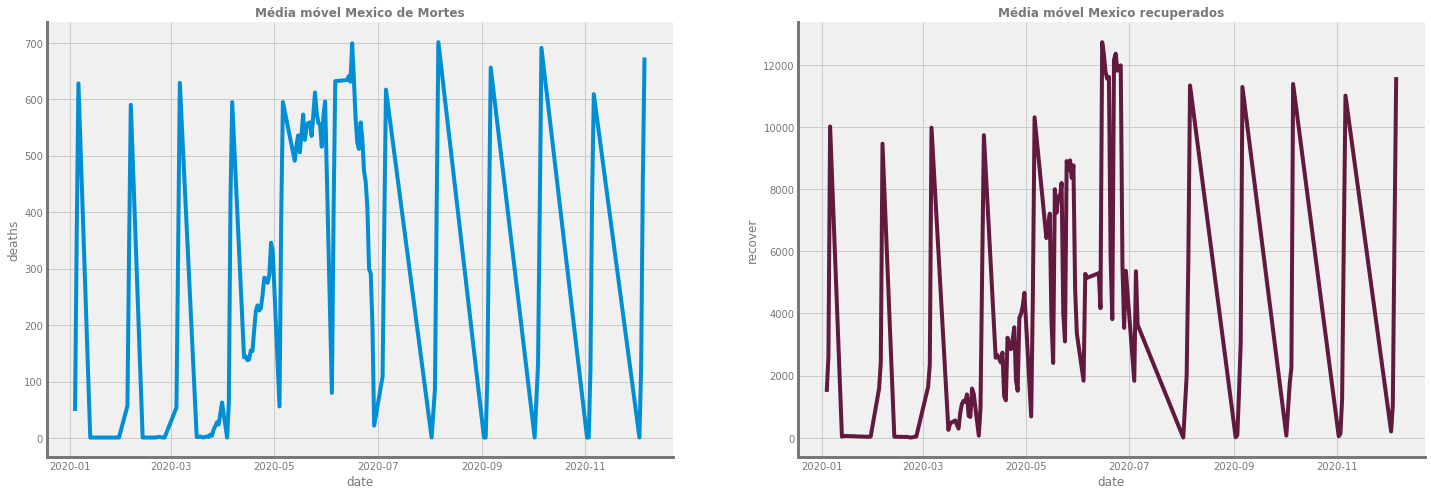

In [24]:
#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12
             }

#Aplicando os parâmetros no matplotlib/seaborn
with plt.rc_context(rc_params):

  #instanciando o axes e figure do matplotlib
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))

  #Construindo o gráfico de linha com a média móvel de novos casos 7 dias
    sns.lineplot(
                x = 'date',
                y = 'deaths',
                ci = None,
                ax = ax[0],
                data = dates  
              )
  
    #Colocando o título no gráfico
    ax[0].set_title("Média móvel Mexico de Mortes")

    #Construindo o gráfico de linha com a média móvel de novas mortes 7 dias
    sns.lineplot(
                x = 'date',
                y = 'recover',
                ci = None,
                ax = ax[1],
                data = dates,
                color = "#621940" 
              )
  
  #Colocando o título no gráfico
    ax[1].set_title("Média móvel Mexico recuperados")
    

Text(0.5, 1.0, 'Distribuição de  riscos de internação  por doença Cardiovascular')

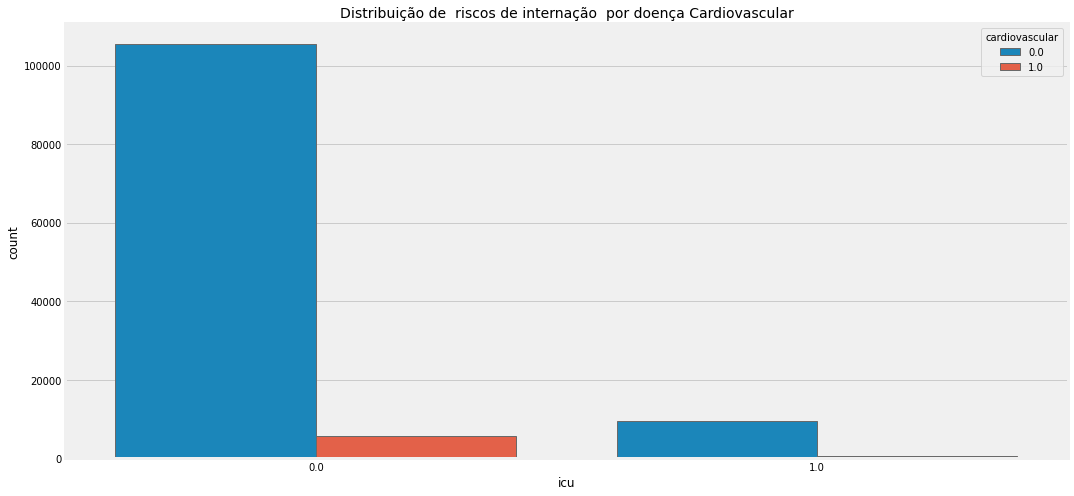

In [25]:
plt.figure(figsize =(16,8))
sns.countplot(data =df , x = 'icu', hue = 'cardiovascular',)
plt.title('Distribuição de  riscos de internação  por doença Cardiovascular', fontsize = 14)

Text(0.5, 1.0, 'Distribuição de  riscos de internação Por Diabetes')

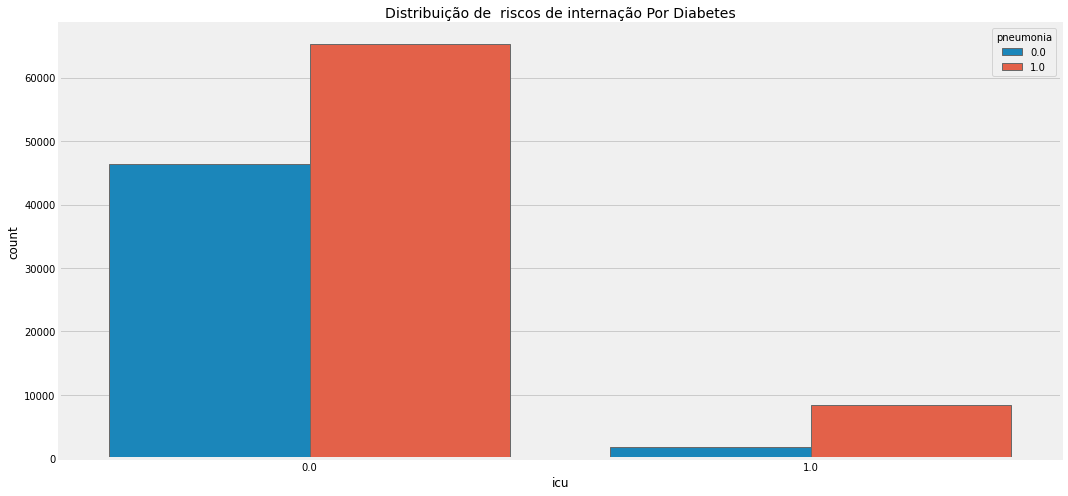

In [26]:
plt.figure(figsize =(16,8))
sns.countplot(data =df , x = 'icu', hue = 'pneumonia',)
plt.title('Distribuição de  riscos de internação Por Diabetes', fontsize = 14)

Text(0.5, 1.0, 'Risco de óbito por idade, Entre Homes e Mulheres')

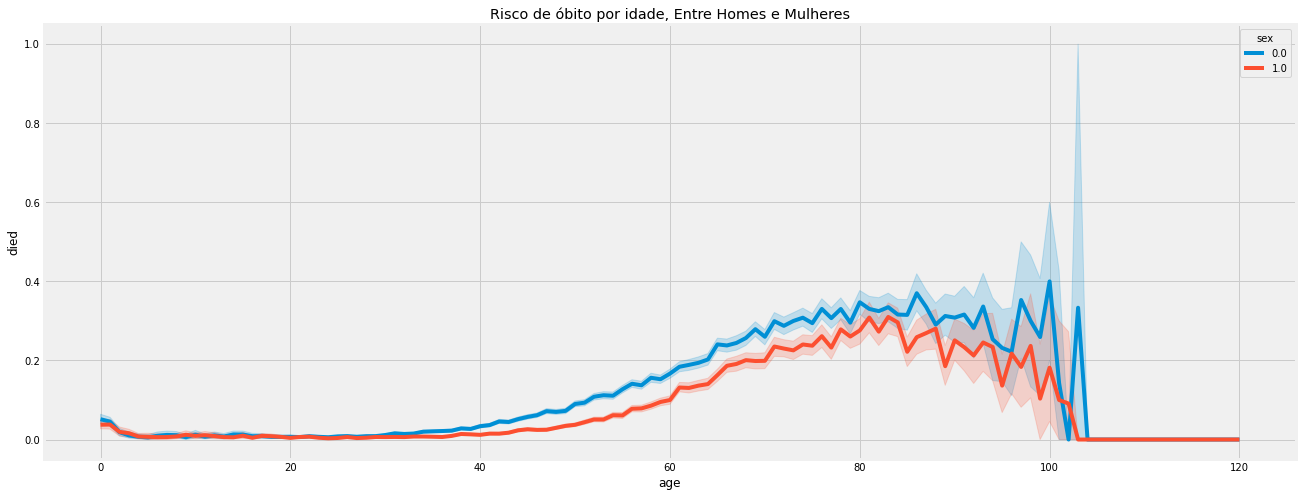

In [27]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.lineplot(data=df.replace('sex', {0: 'Male', 1: 'Female'}),
             x='age',
             y='died',
             hue='sex',)
plt.title('Risco de óbito por idade, Entre Homes e Mulheres')

Text(0.5, 1.0, 'Risco de Internação em UTI por idade, Entre Homes e Mulheres')

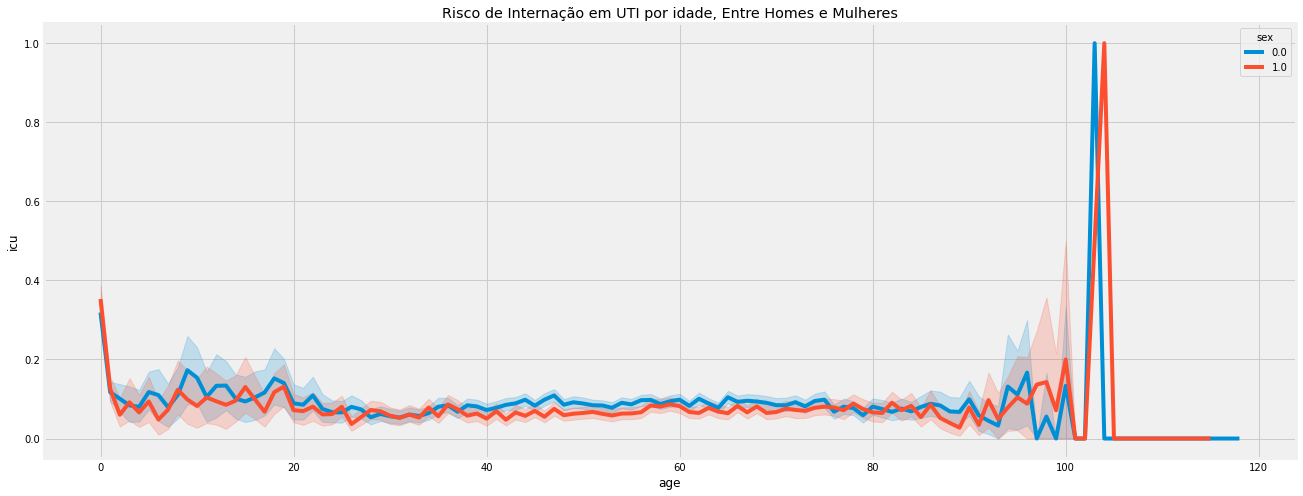

In [28]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.lineplot(data=df.replace('sex', {0: 'Male', 1: 'Female'}),
             x='age',
             y='icu',
             hue='sex',)
plt.title('Risco de Internação em UTI por idade, Entre Homes e Mulheres')

Text(0.5, 1.0, 'Risco de Internação em UTI por idade, Entre pessoas com Pneumonia')

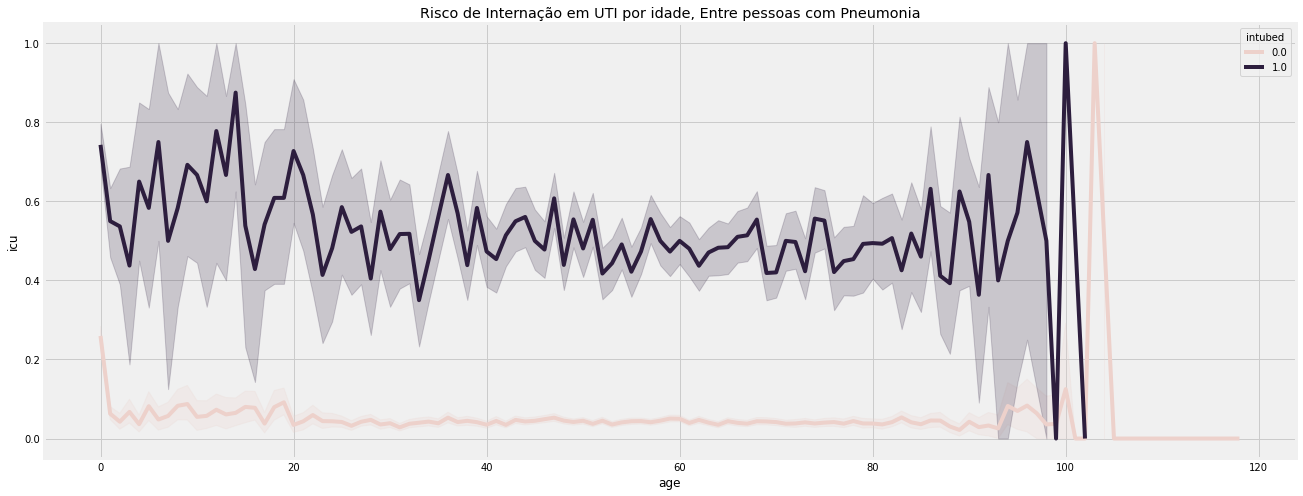

In [29]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.lineplot(data=df.replace('pneumonia',{0: 'Não Tem pneumonia', 1: 'pneumonia'}),
             x='age',
             y='icu',
             hue='intubed',)
plt.title('Risco de Internação em UTI por idade, Entre pessoas com Pneumonia')

Text(0.5, 1.0, 'Risco de óbito por idade, Entre pessoas que estão Intubados')

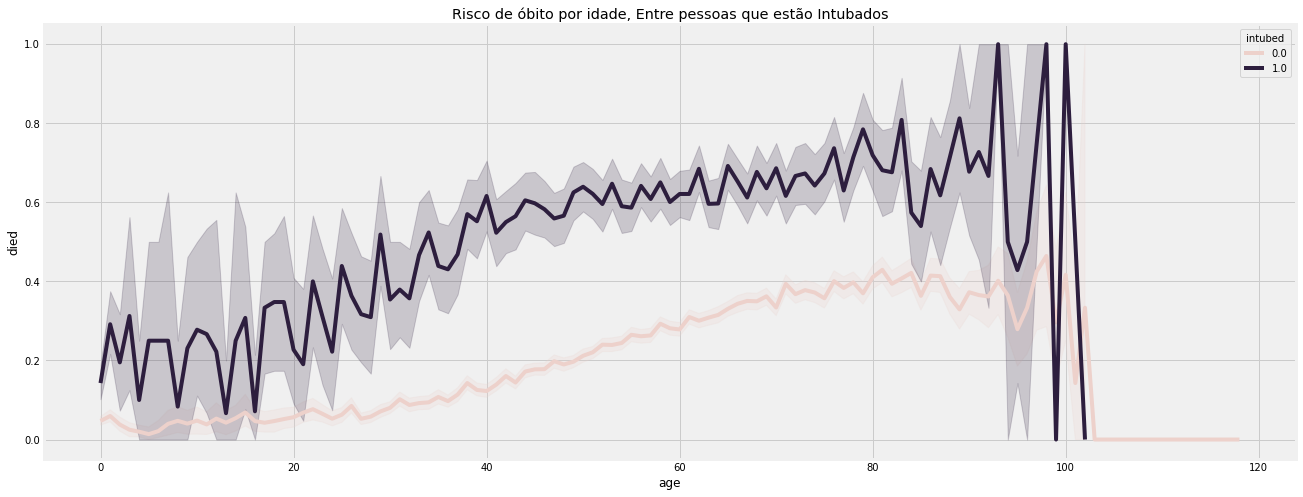

In [30]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.lineplot(data=df.replace('intubed', {0: 'Não-Intubado', 1: 'Intubado'}),
             x='age',
             y='died',
             hue='intubed',)
plt.title('Risco de óbito por idade, Entre pessoas que estão Intubados')

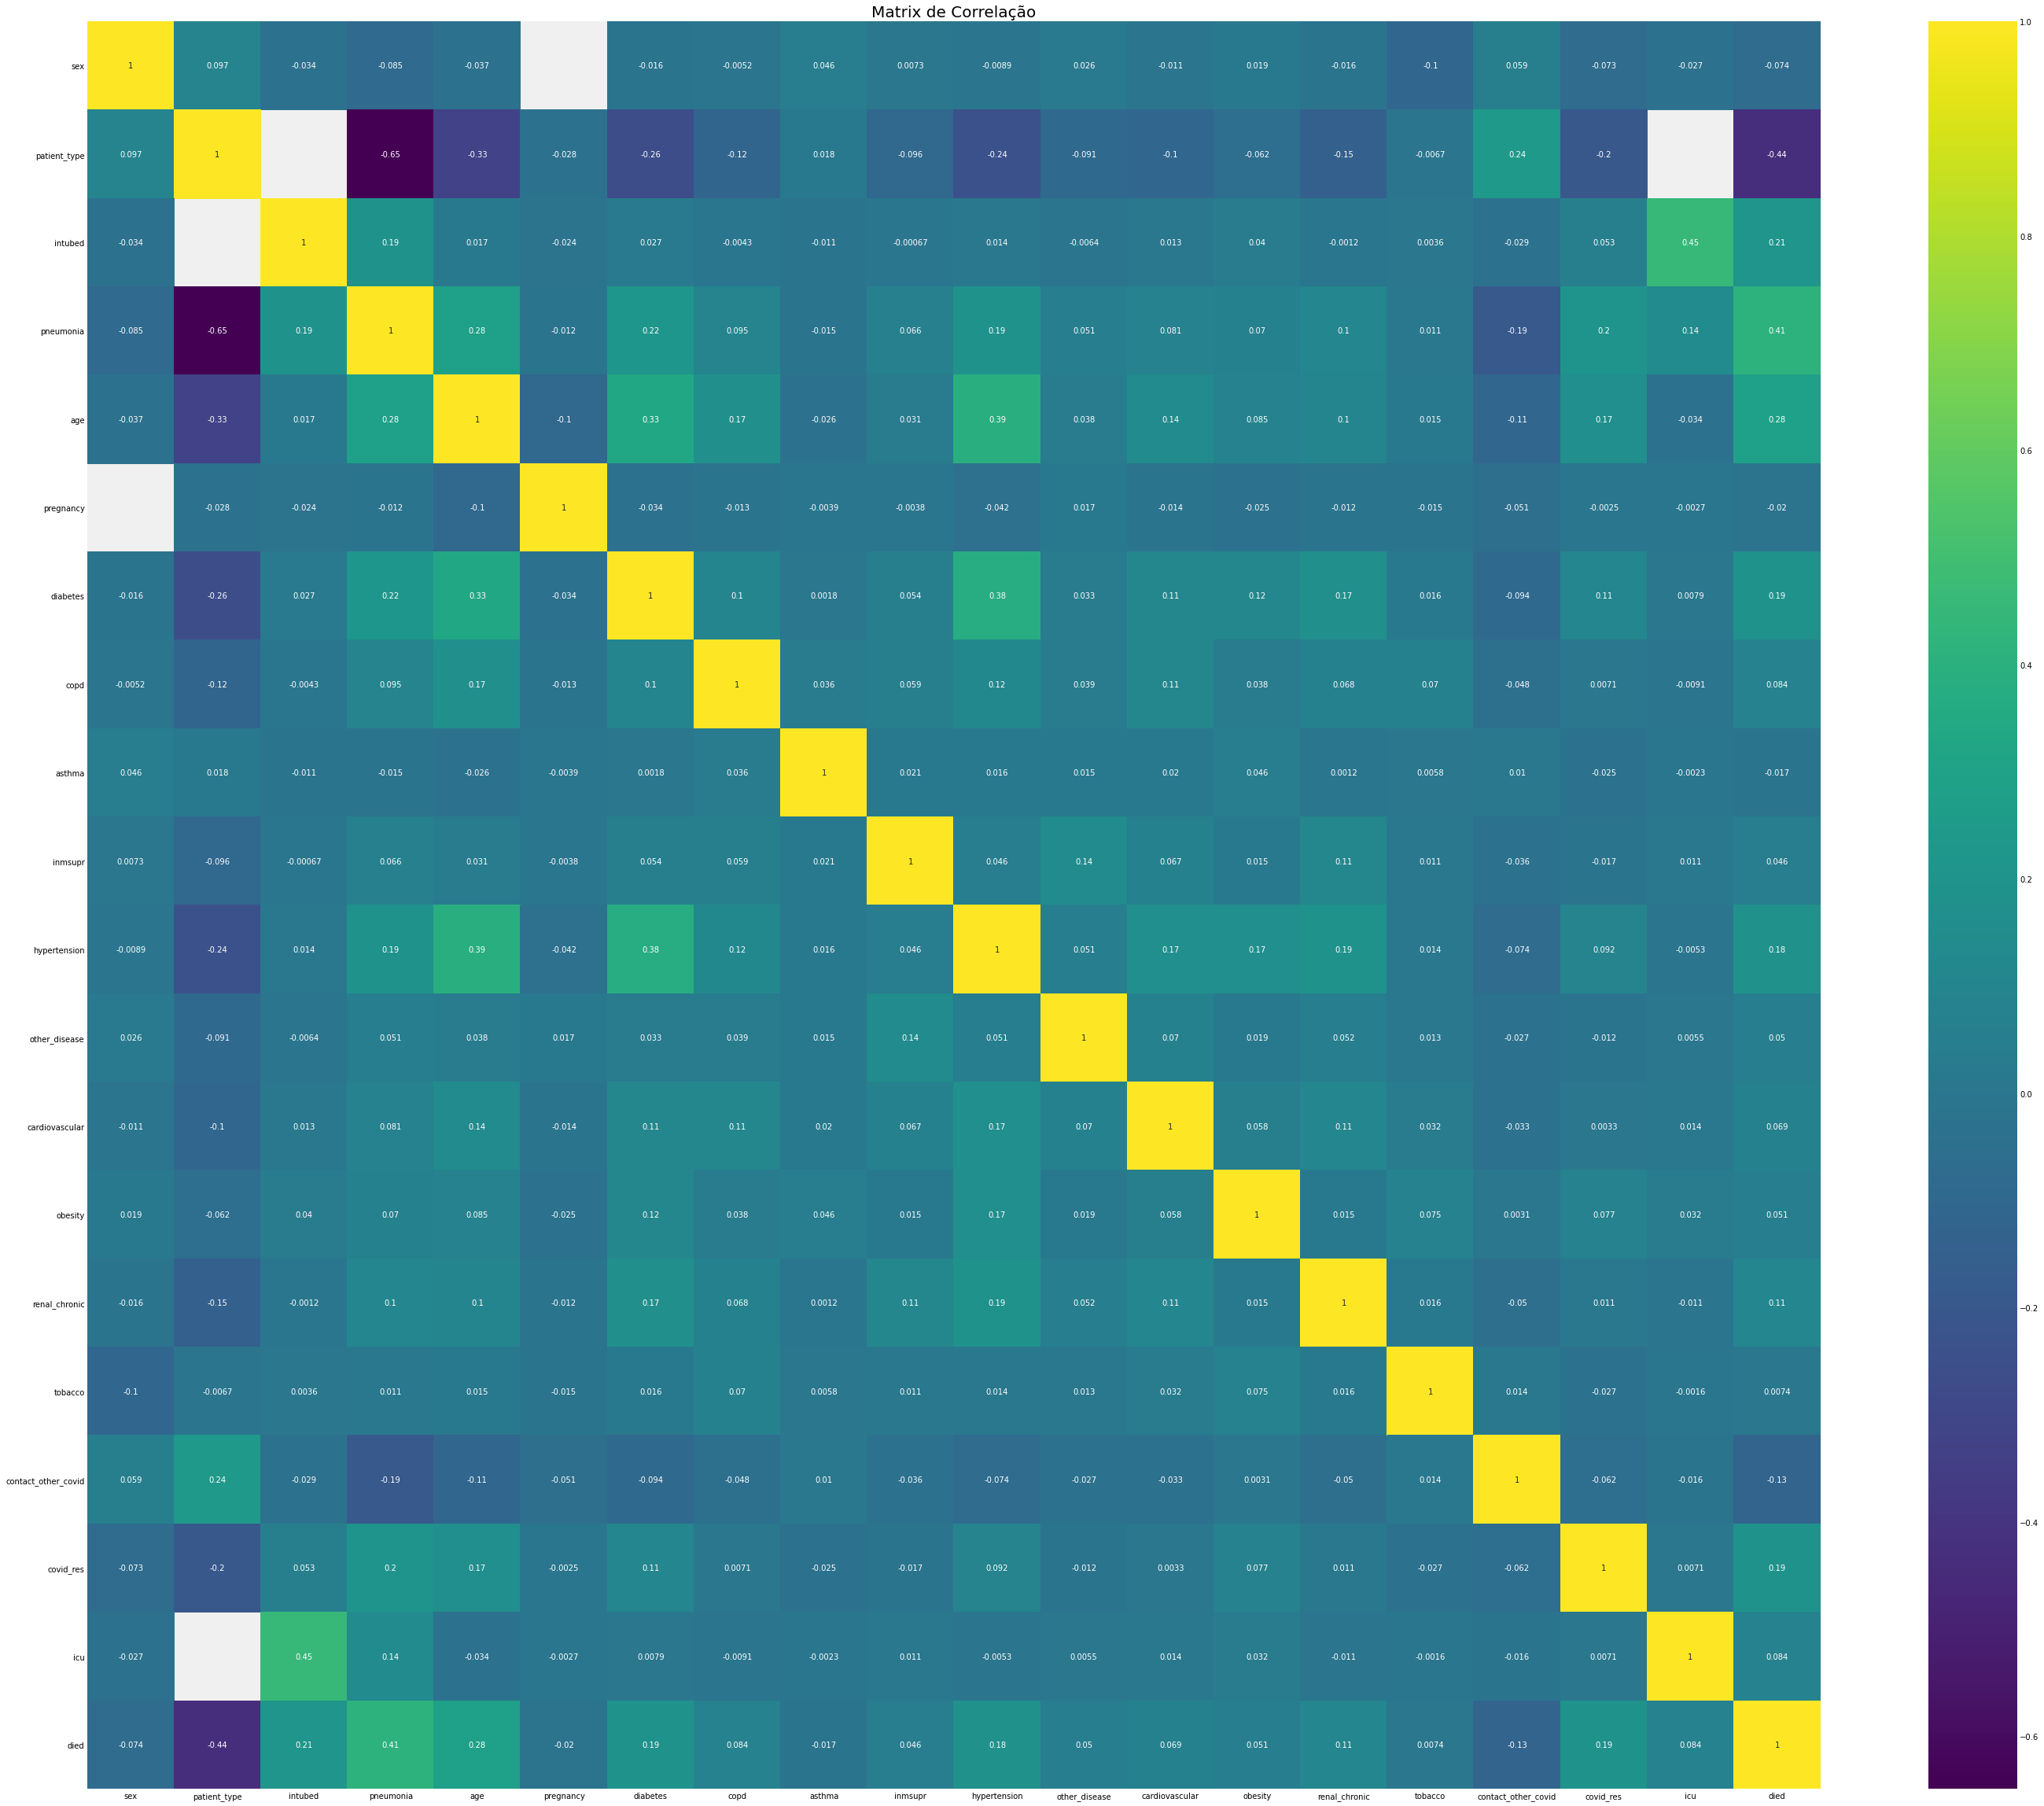

In [31]:
plt.figure(figsize=(40,32))
corrmat = df.corr()
sns.heatmap(corrmat,annot=True,cmap="viridis")
plt.title('Matrix de Correlação',fontsize = 20)
plt.tight_layout()

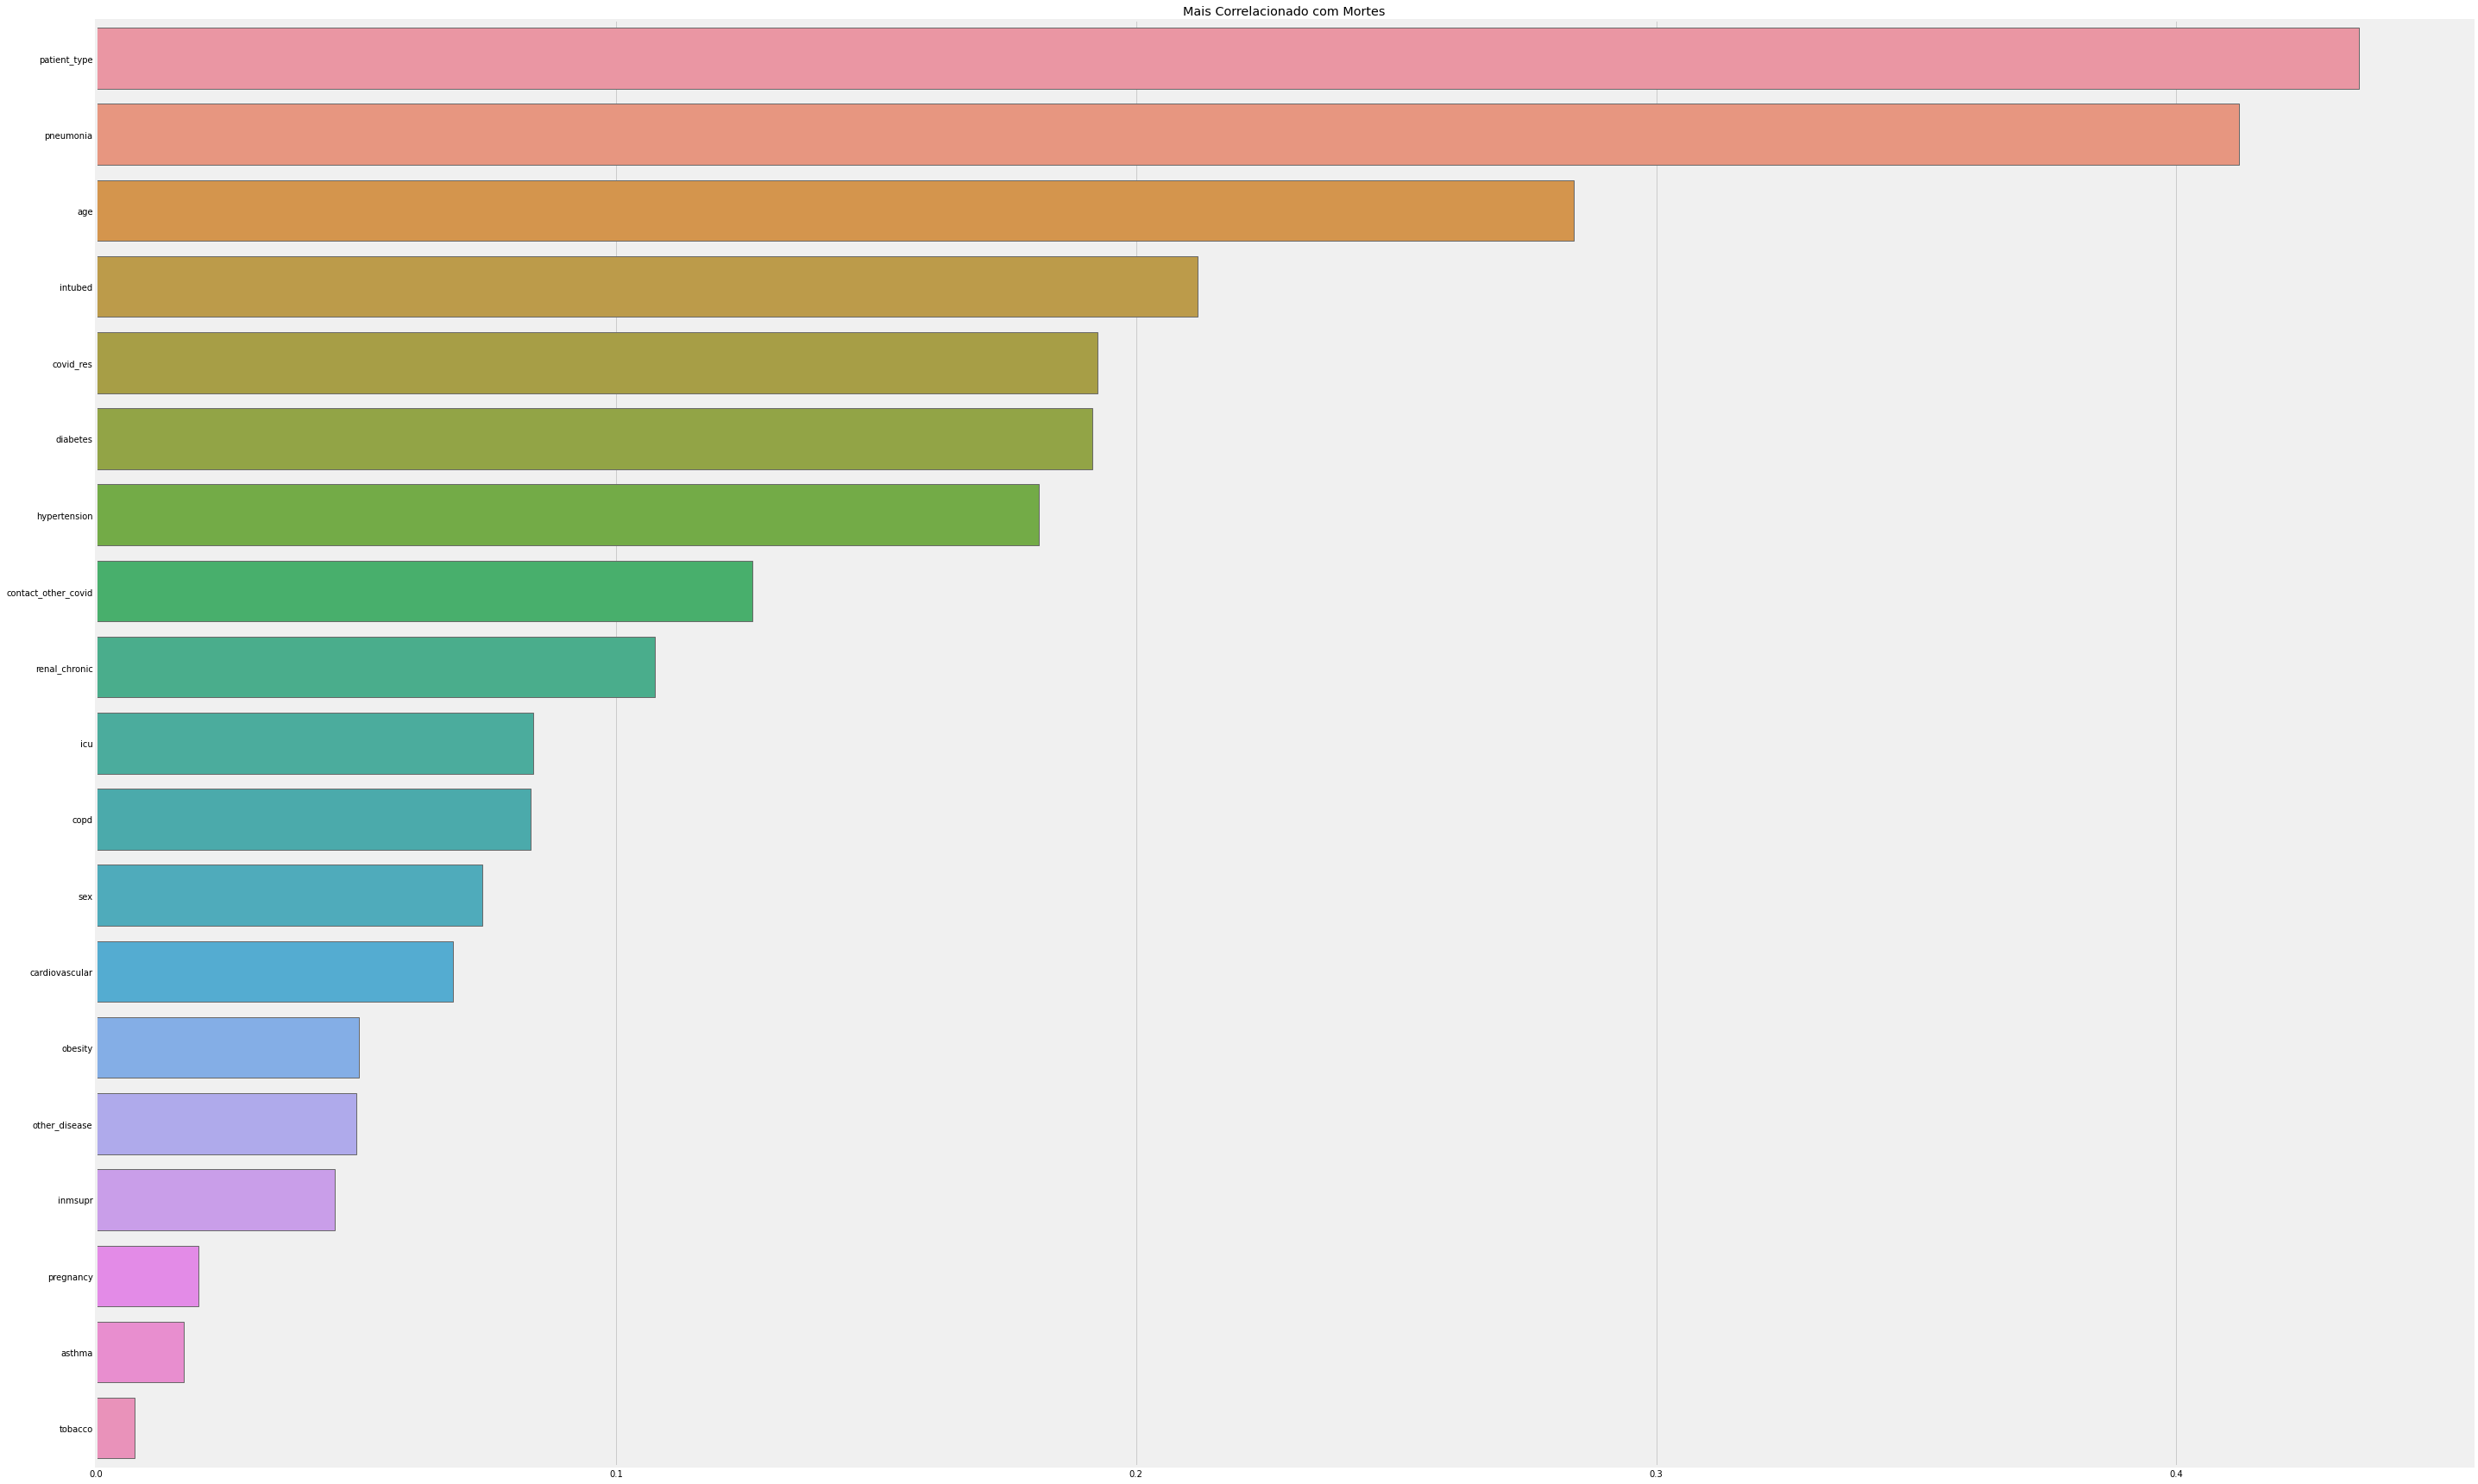

In [32]:
plt.figure(figsize=(40,24))
correlations =corrmat.abs()['died'].sort_values(ascending=False)[1:]
sns.barplot(x=correlations.values,y=correlations.index).set_title('Mais Correlacionado com Mortes')
plt.tight_layout()

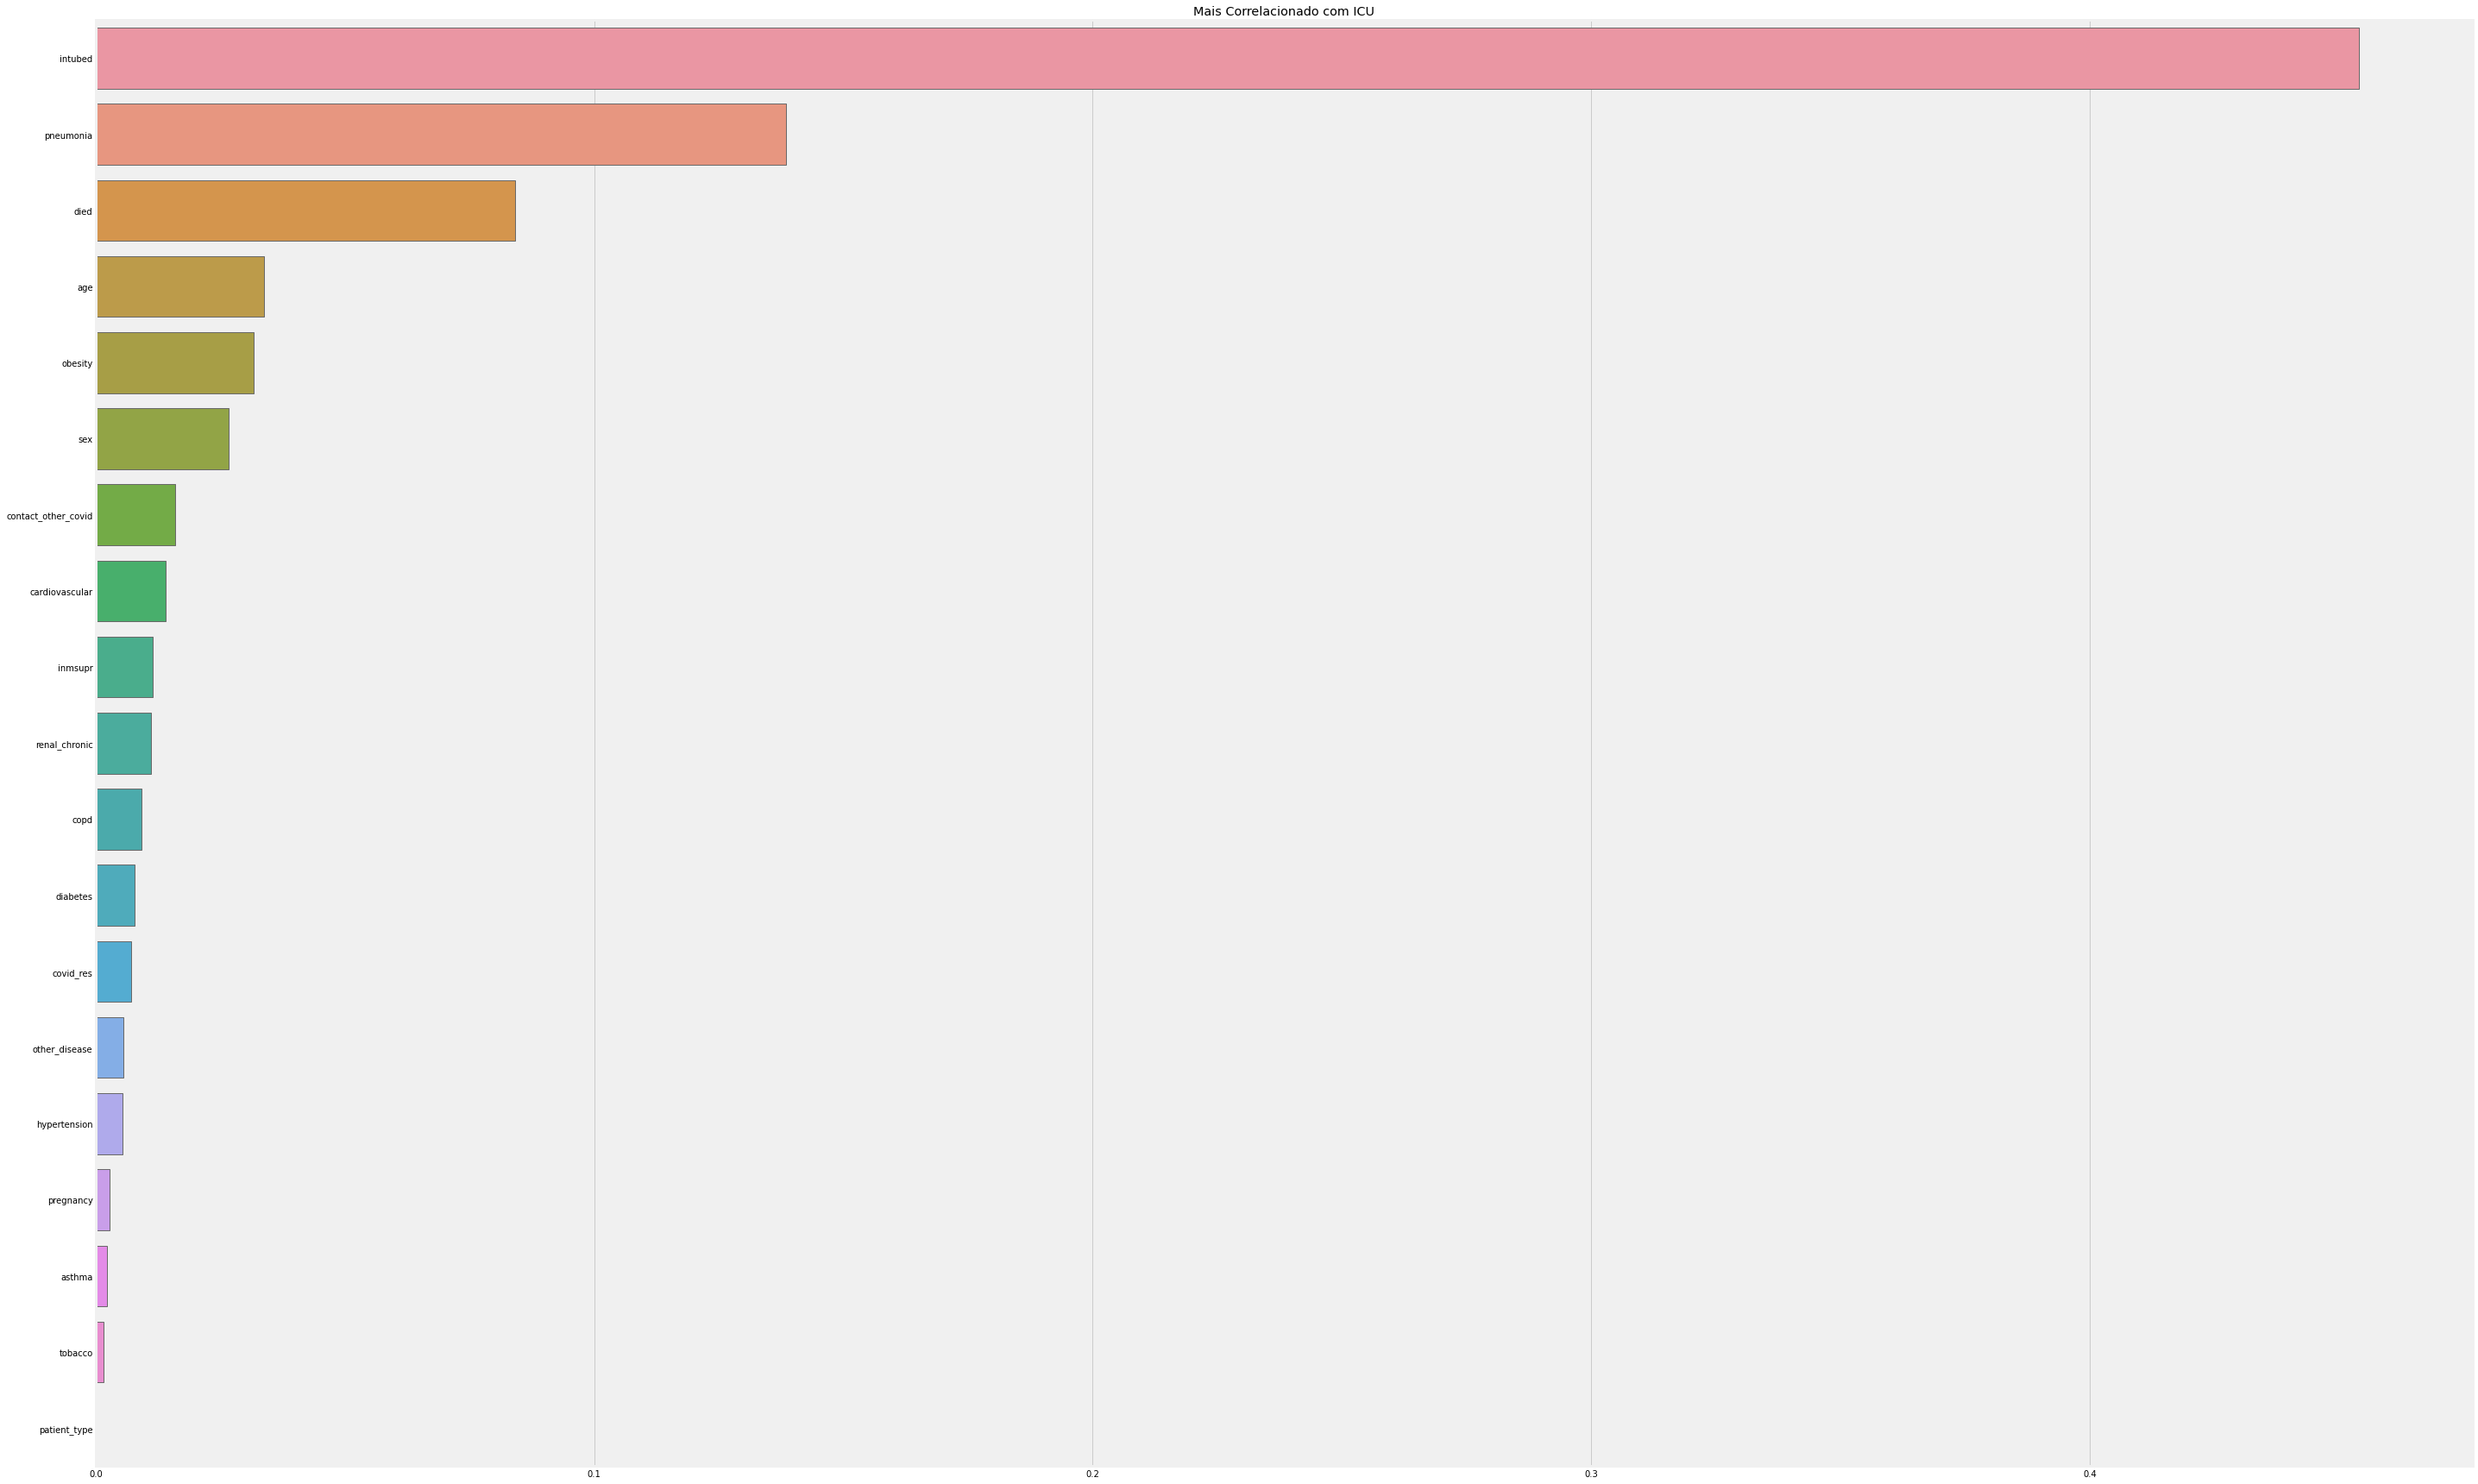

In [33]:
plt.figure(figsize=(40,24))
correlations =corrmat.abs()['icu'].sort_values(ascending=False)[1:]
sns.barplot(x=correlations.values,y=correlations.index).set_title('Mais Correlacionado com ICU')
plt.tight_layout()

Text(0.5, 1.0, 'Risco de internação por idade, Entre pessoas que obesas')

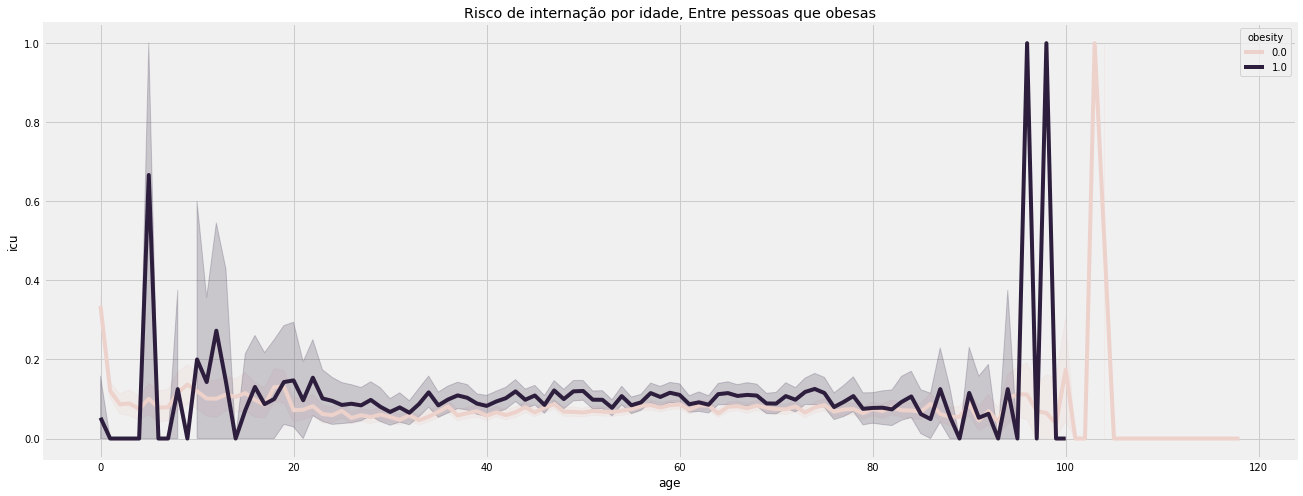

In [34]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.lineplot(data=df.replace('obesity', {0: 'Não-Obeso', 1: 'Obeso'}),
             x='age',
             y='icu',
             hue='obesity',)
plt.title('Risco de internação por idade, Entre pessoas que obesas')

Text(0.5, 1.0, 'Risco de óbito por idade, Entre pessoas que se re-ifectaram')

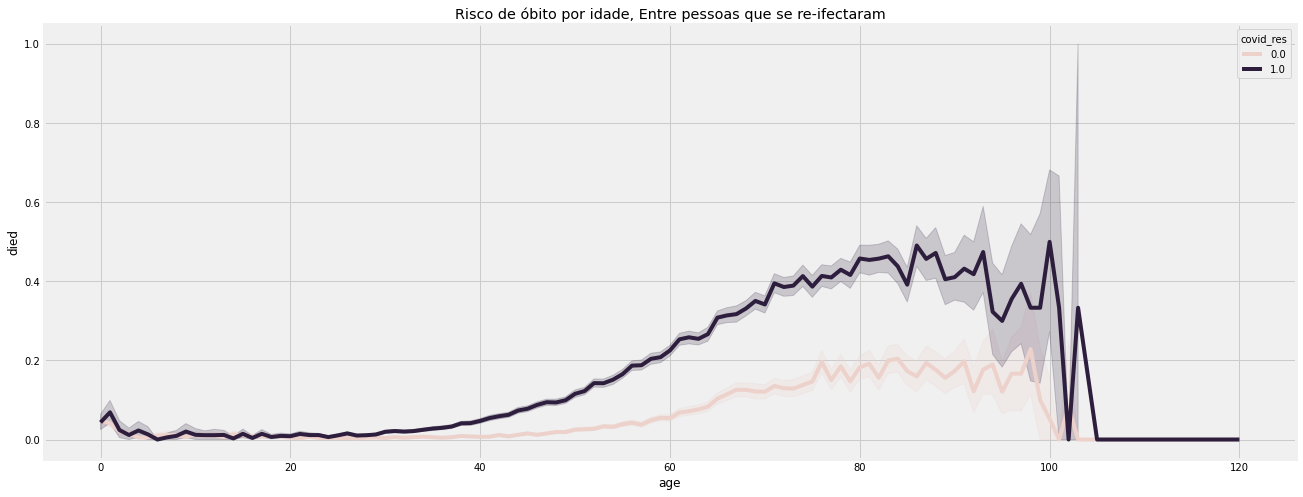

In [35]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.lineplot(data=df.replace('covid_res', {0: 'Primeira Vez', 1: 'Re-infectado'}),
             x='age',
             y='died',
             hue='covid_res',)
plt.title('Risco de óbito por idade, Entre pessoas que se re-ifectaram')

In [36]:
my_report = sv.analyze(df.dropna(),"icu")
#my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)


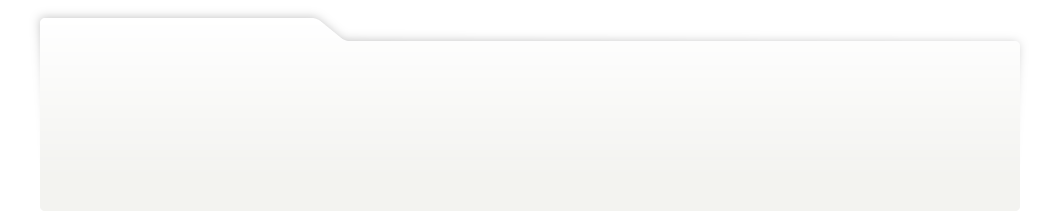
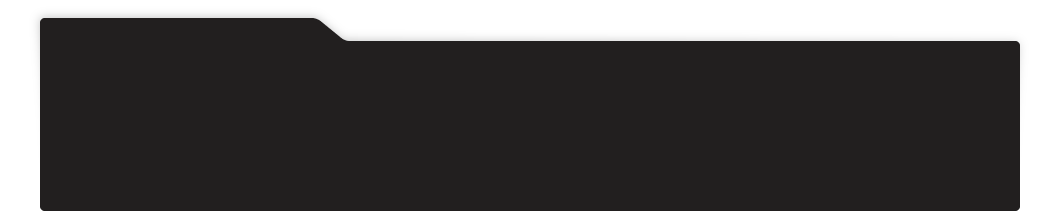
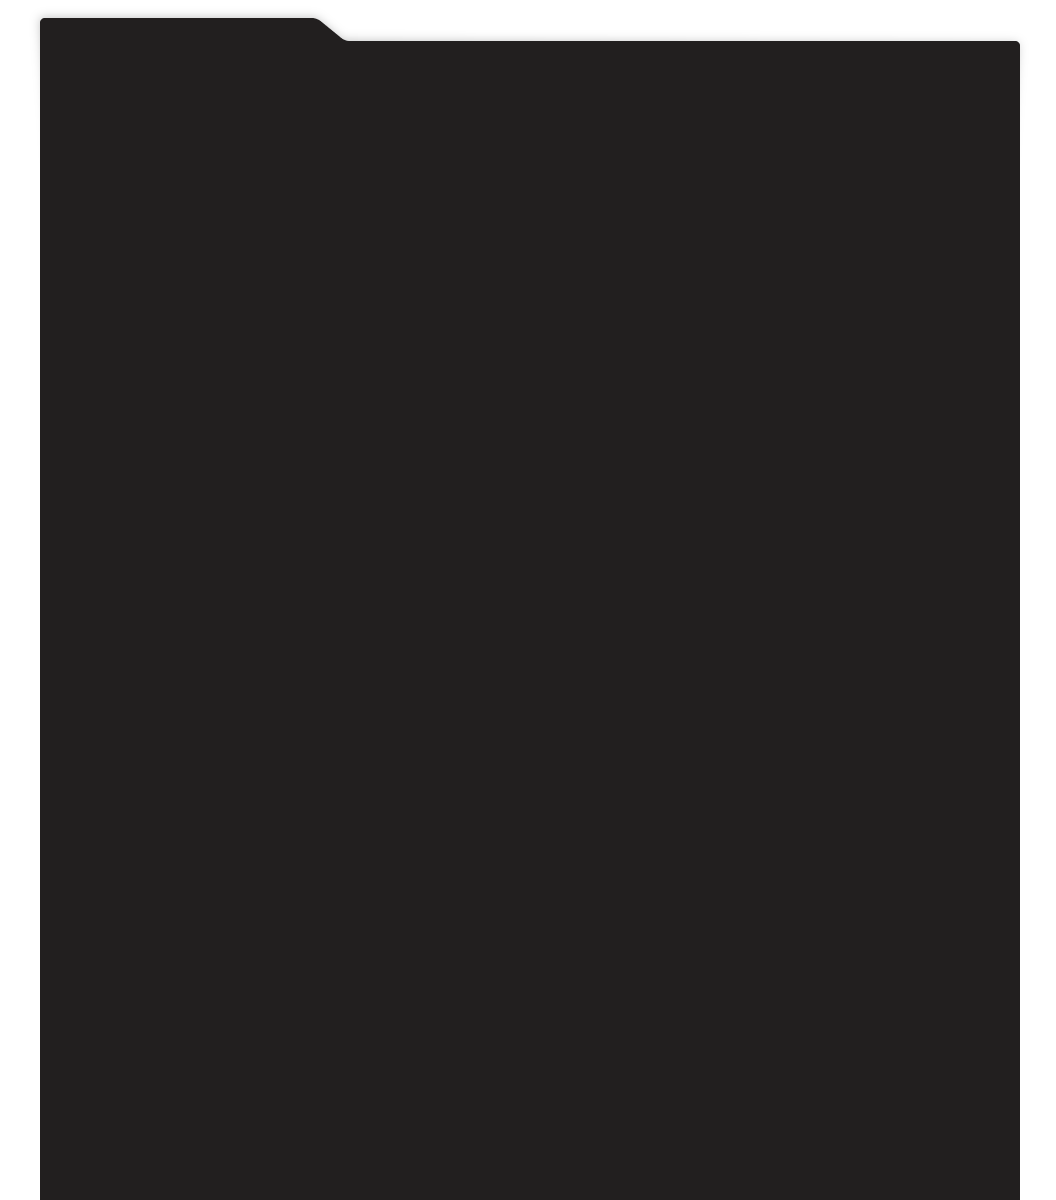
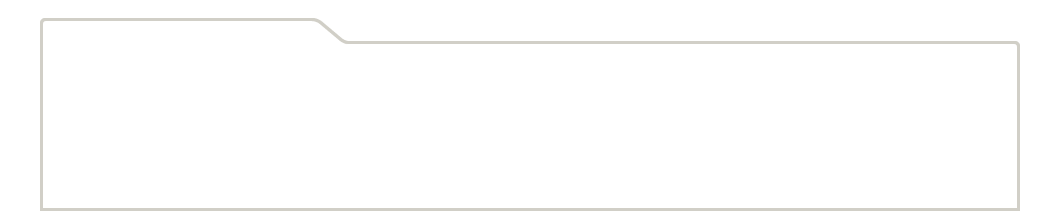
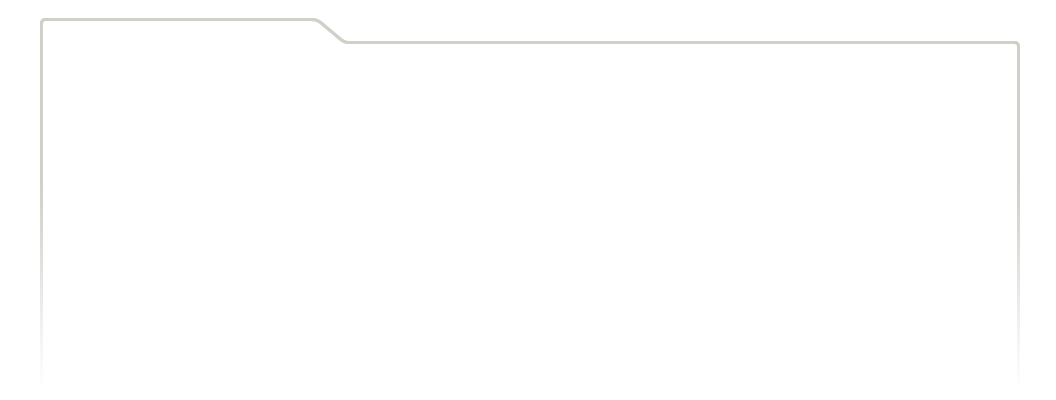
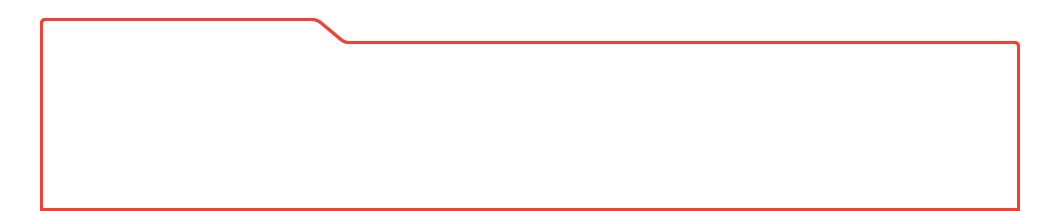
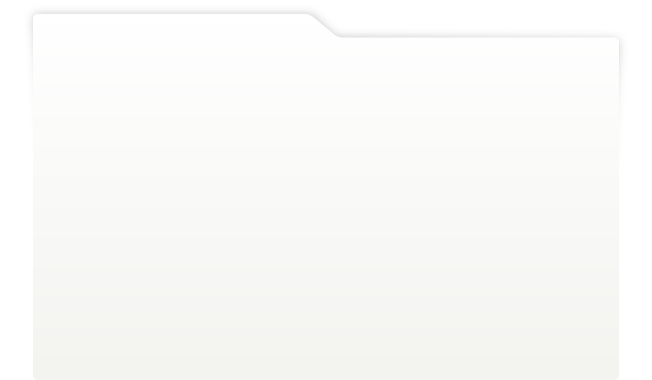
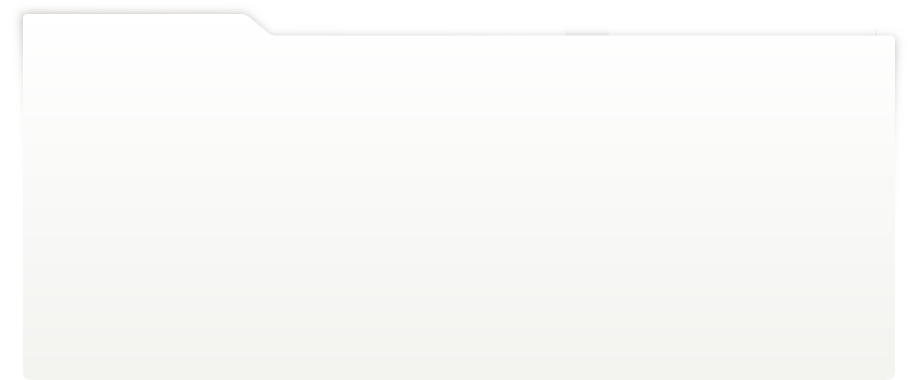
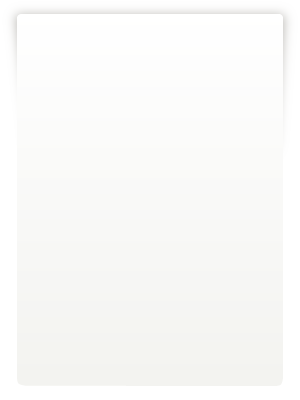
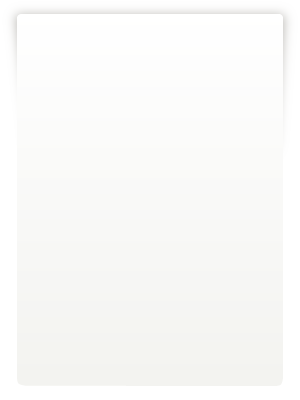
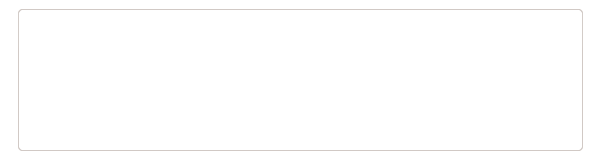
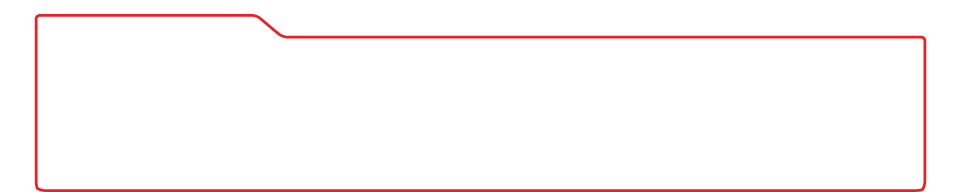
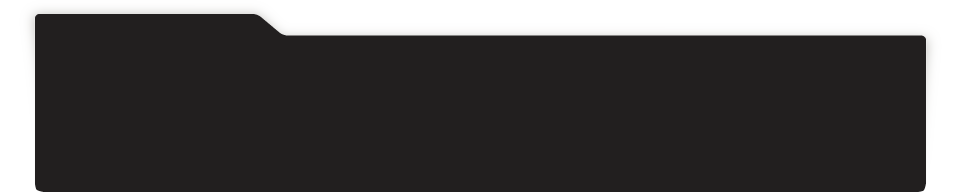
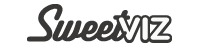
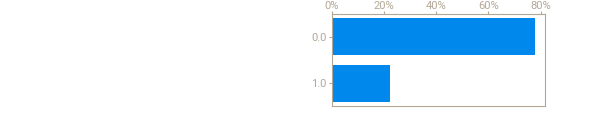
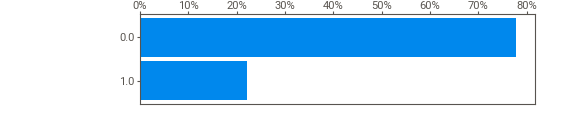
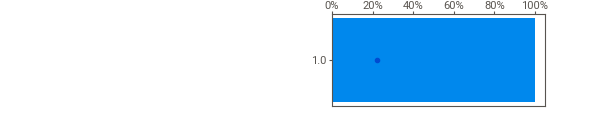
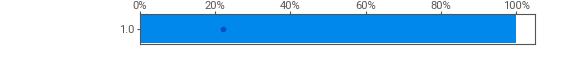
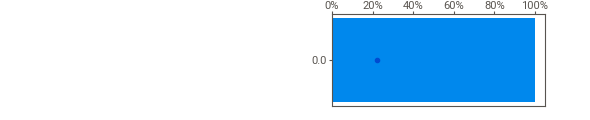
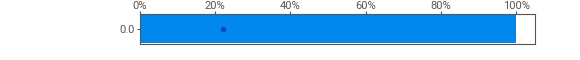
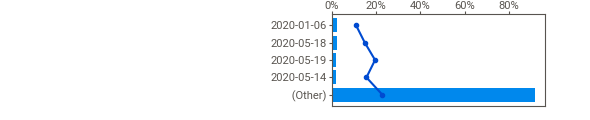
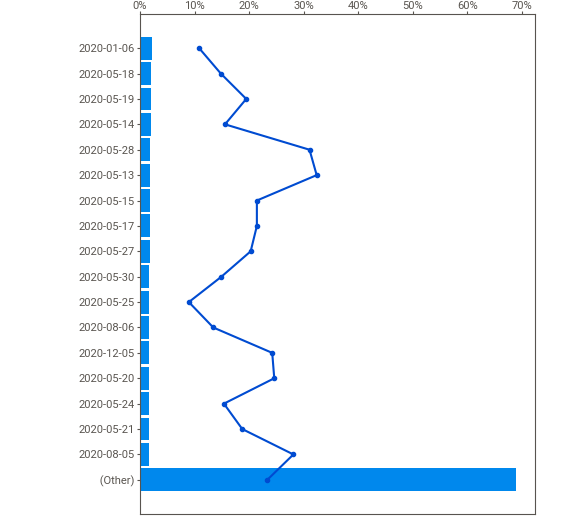
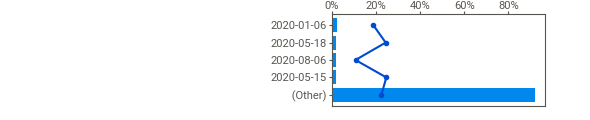
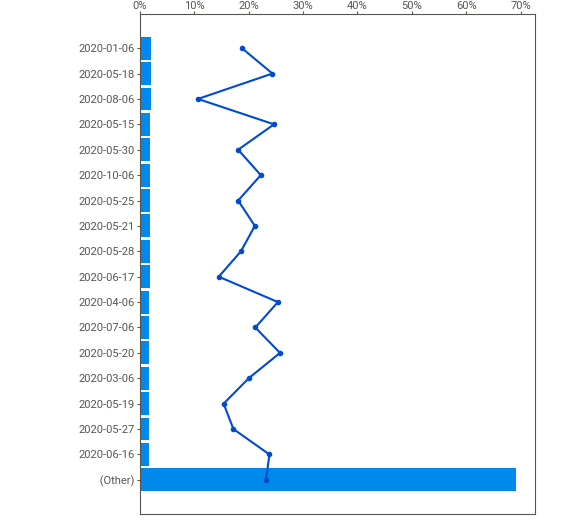
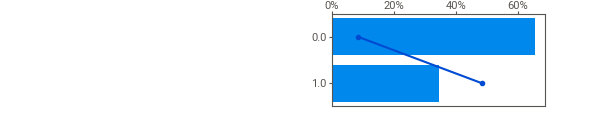
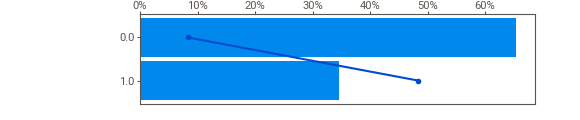
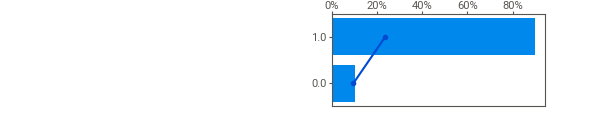
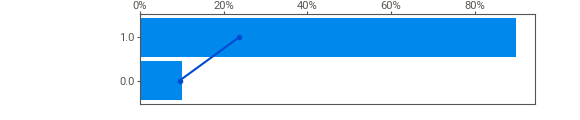
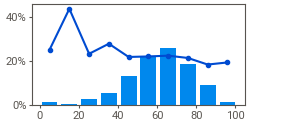
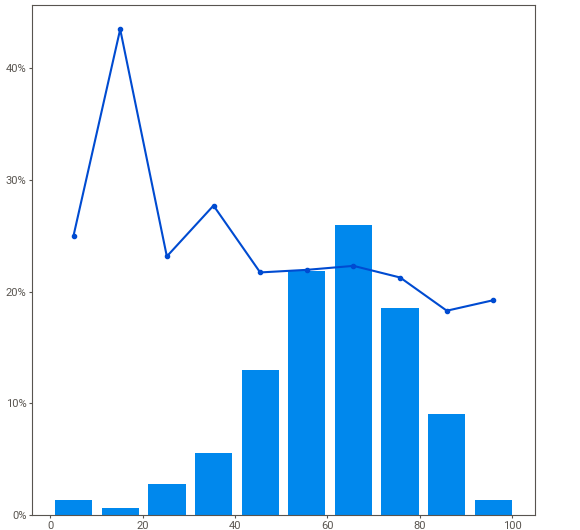
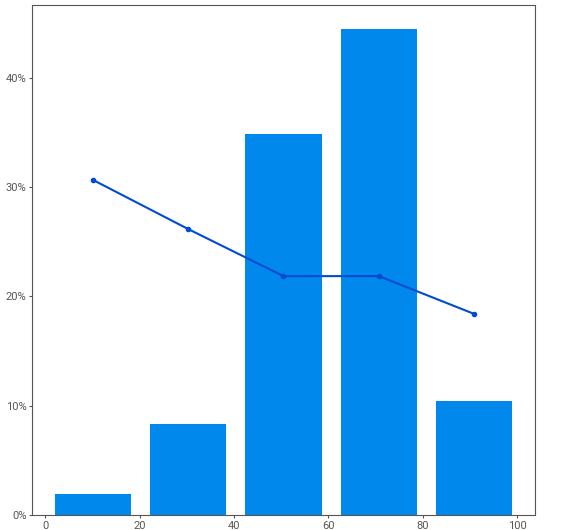
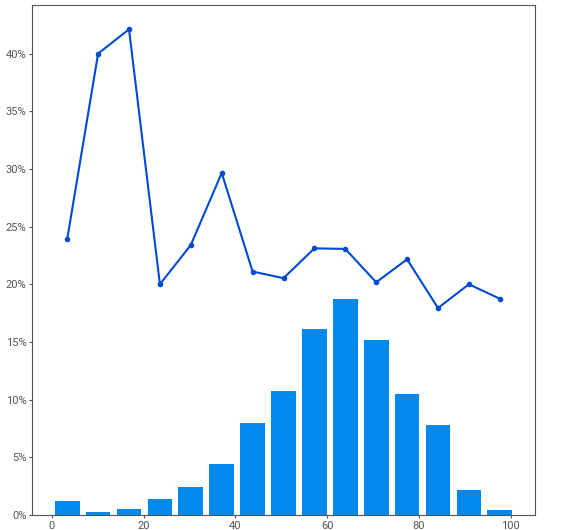
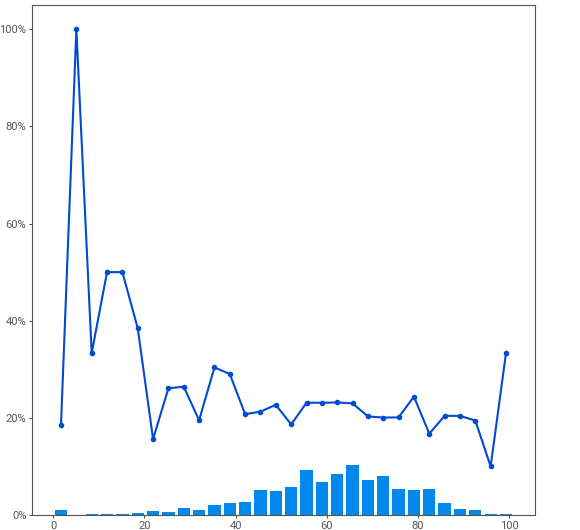
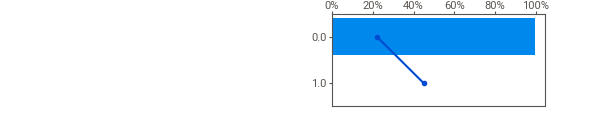
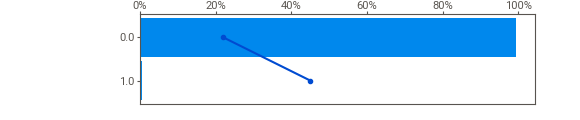
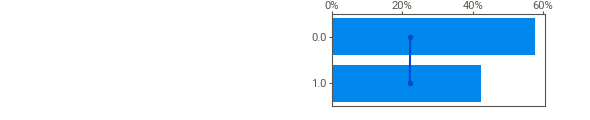
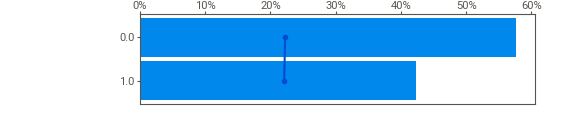
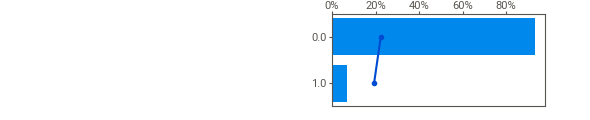
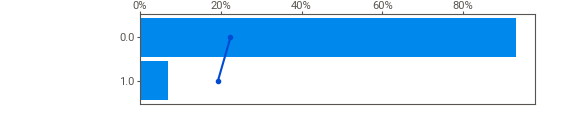
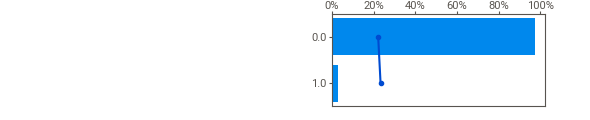
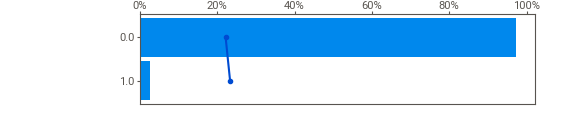
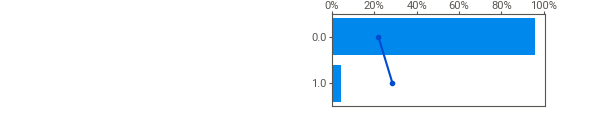
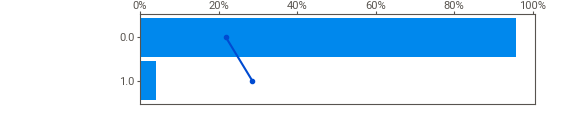
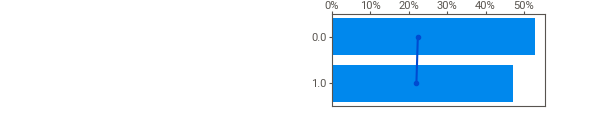
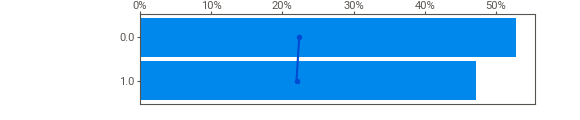
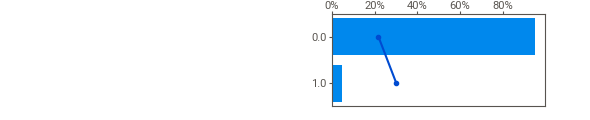
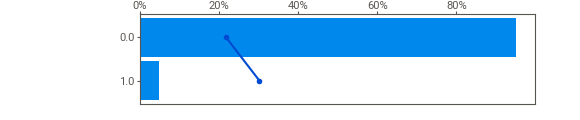
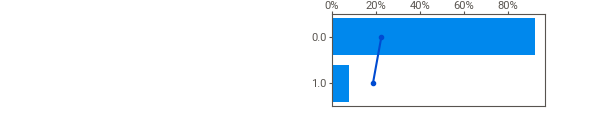
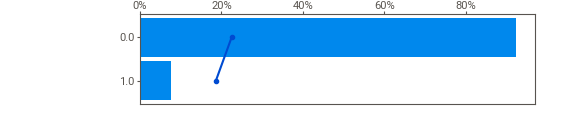
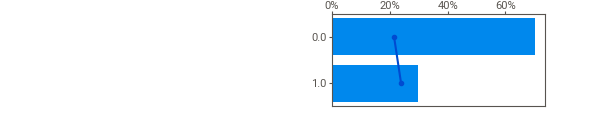
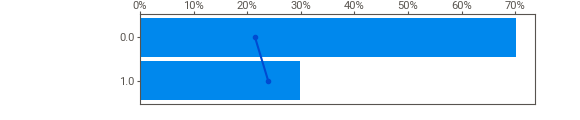
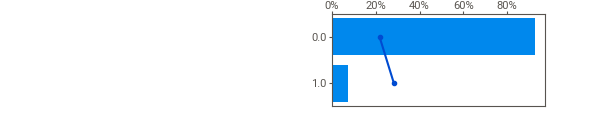
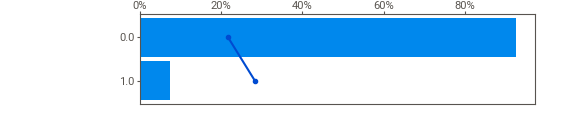
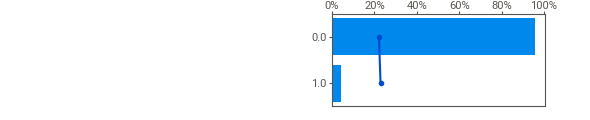
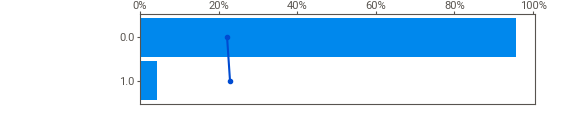
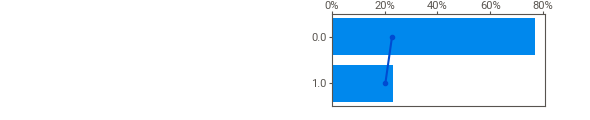
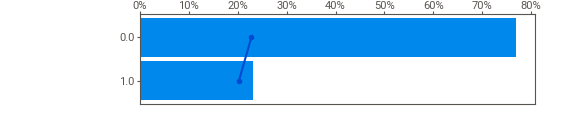
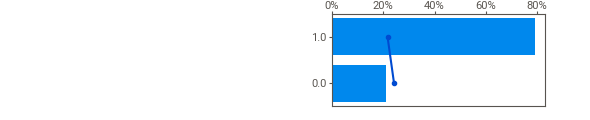
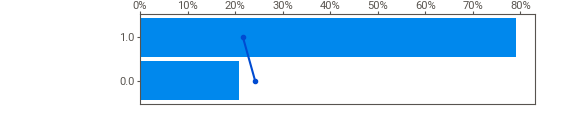
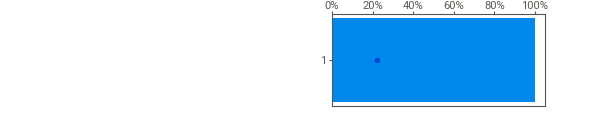
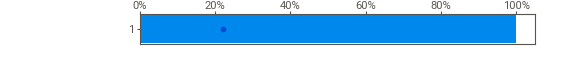
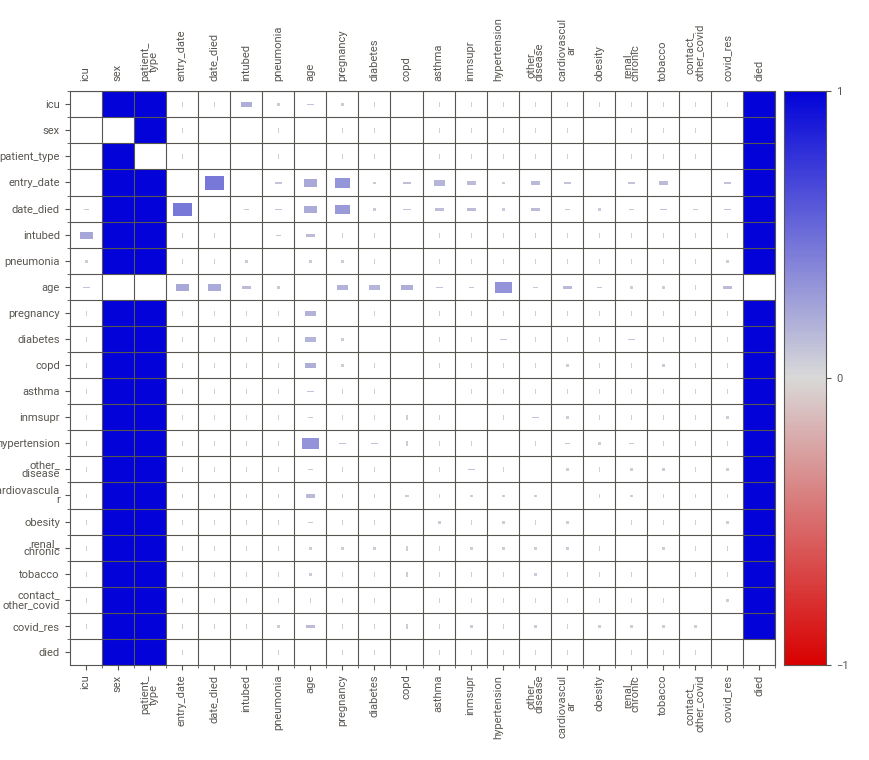
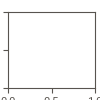

In [37]:
my_report.show_notebook()

In [38]:
my_report_1 = sv.analyze(df.dropna(),"died")
#my_report_1.show_html()

                                             |          | [  0%]   00:00 -> (? left)


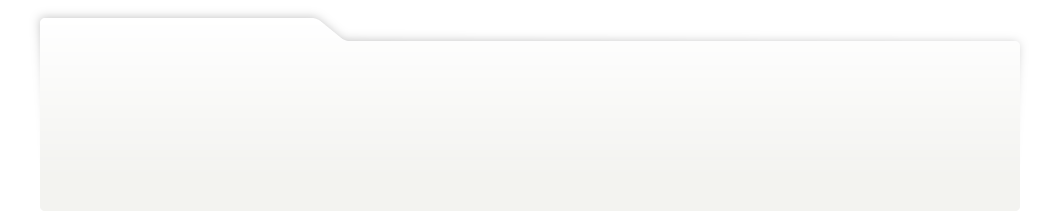
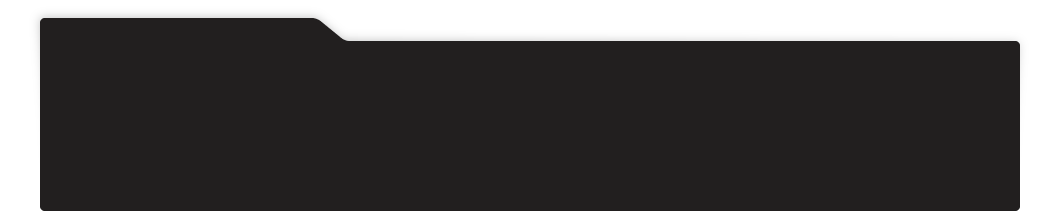
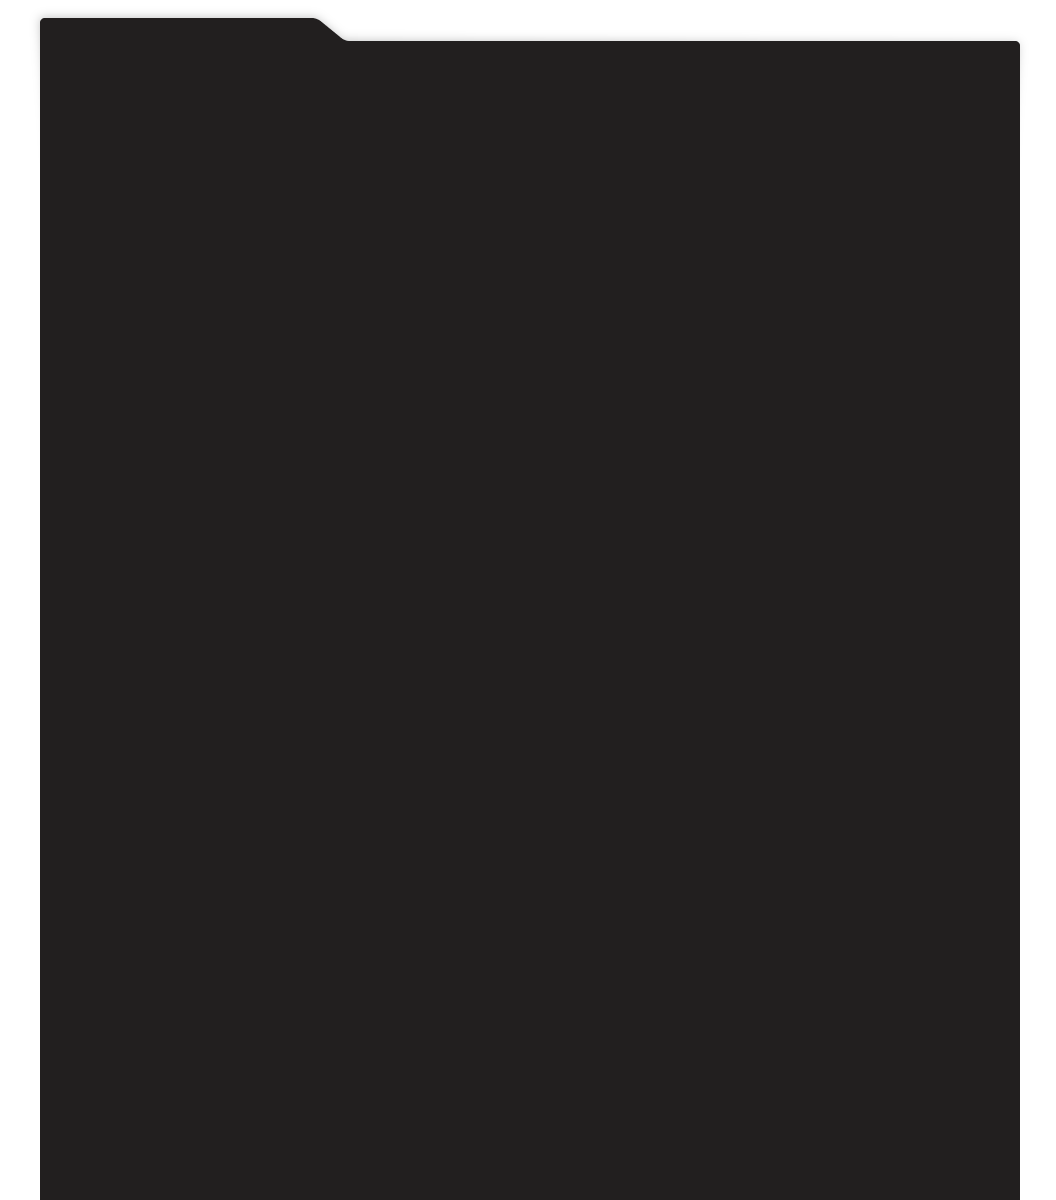
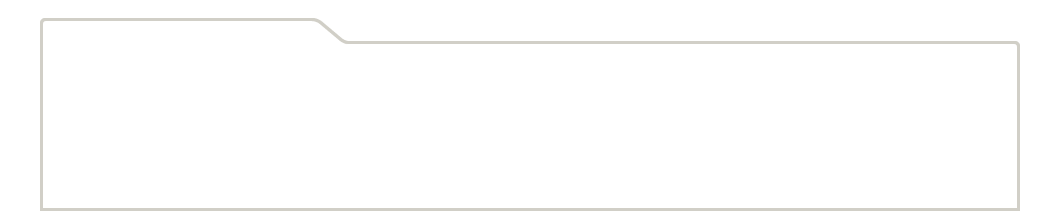
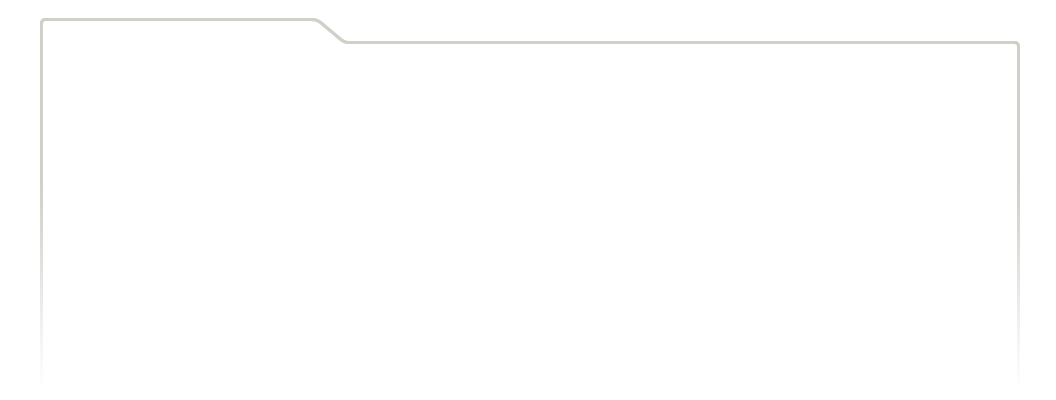
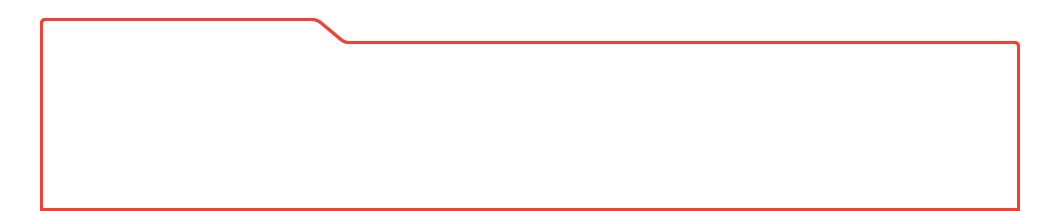
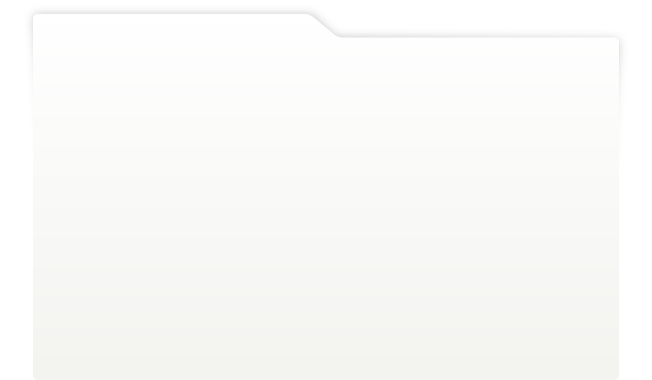
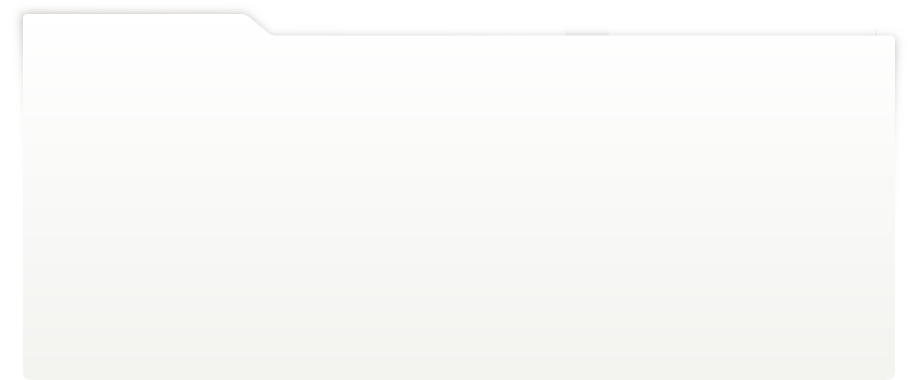
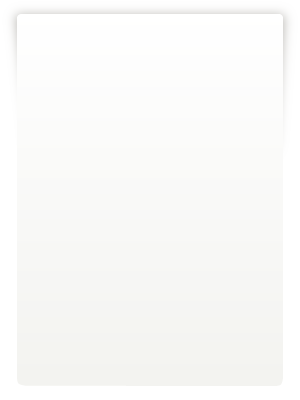
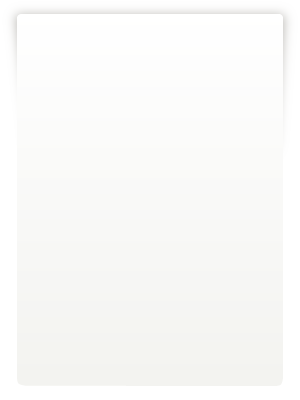
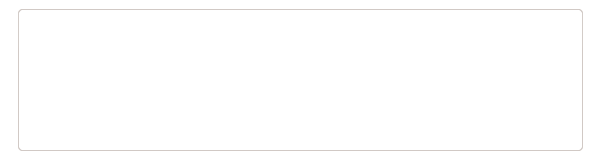
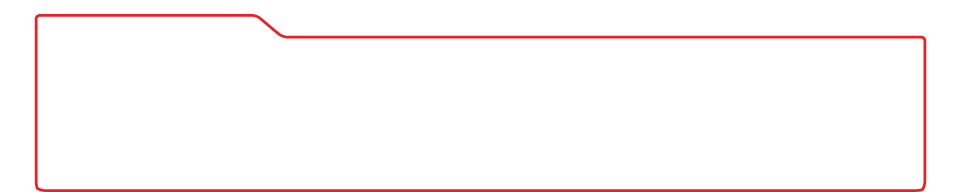
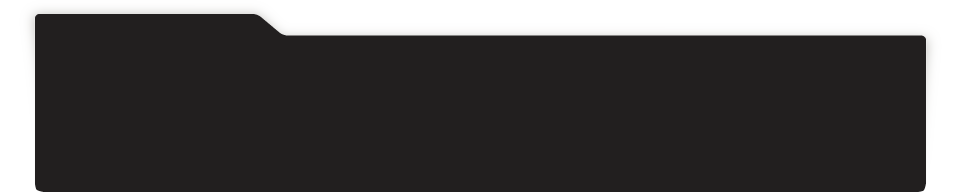
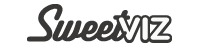
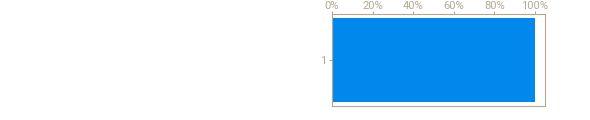
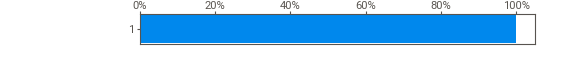
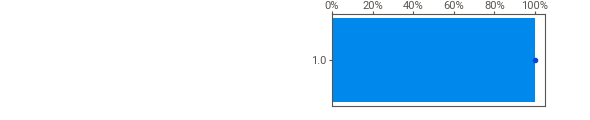
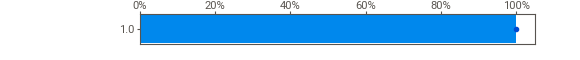
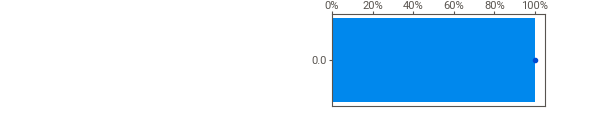
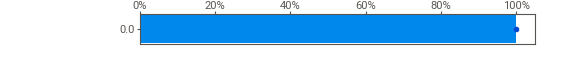
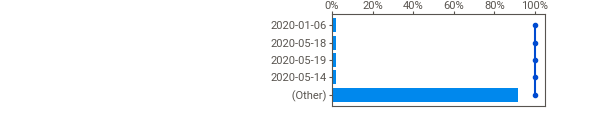
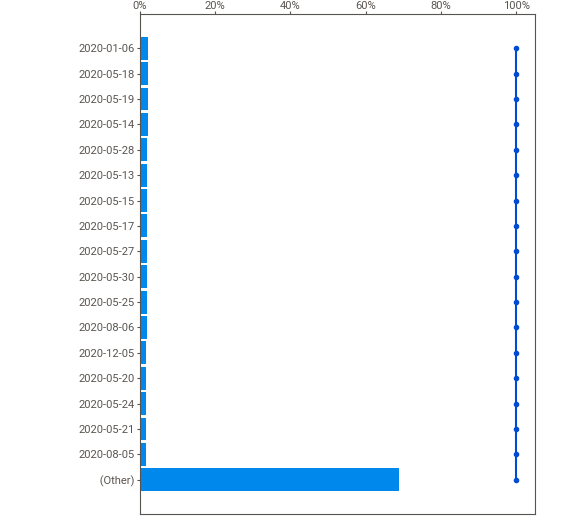
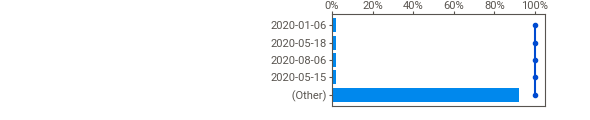
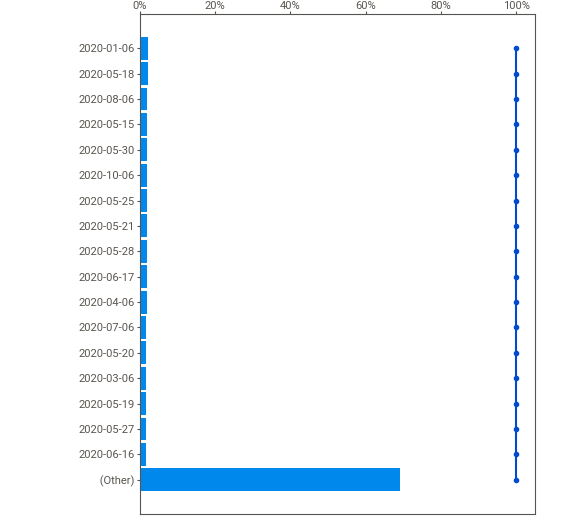
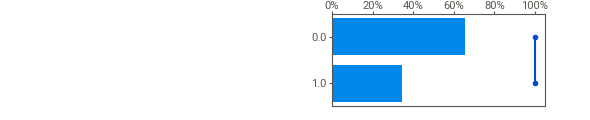
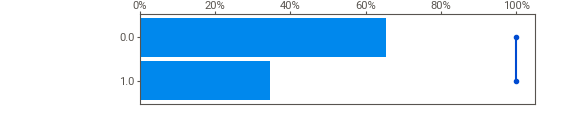
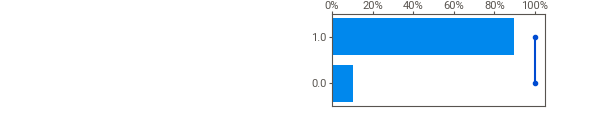
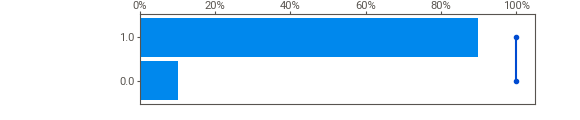
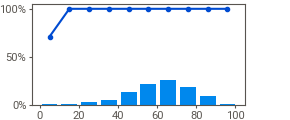
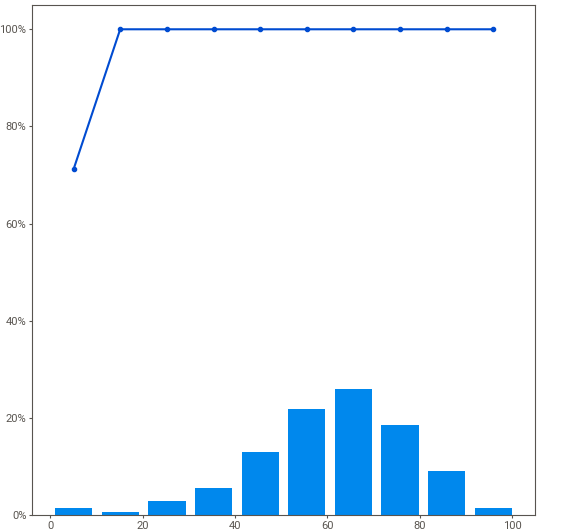
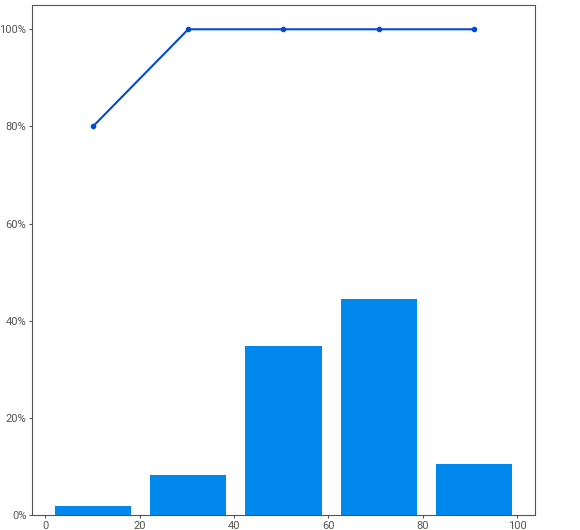
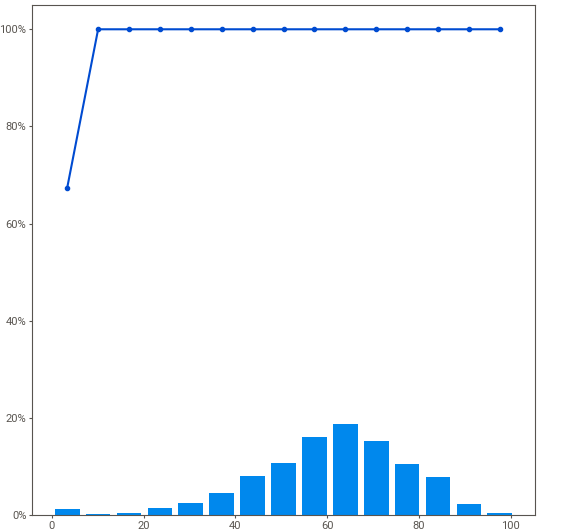
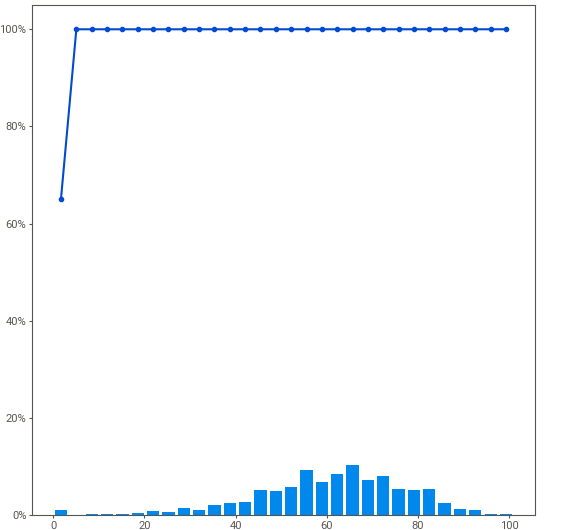
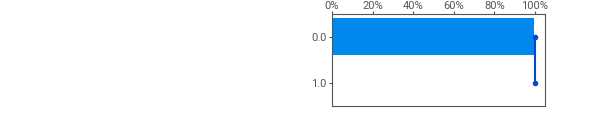
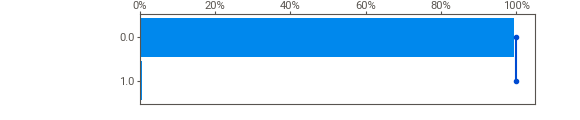
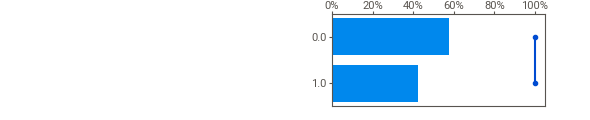
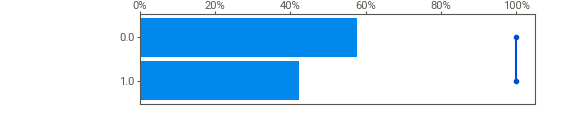
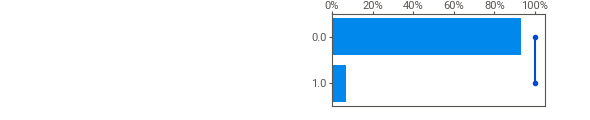
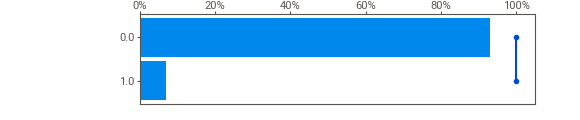
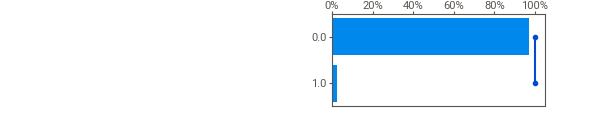
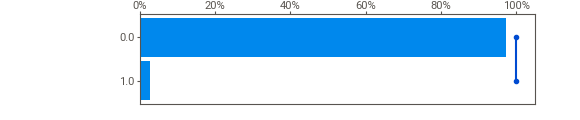
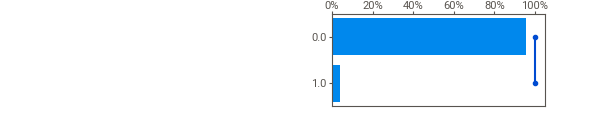
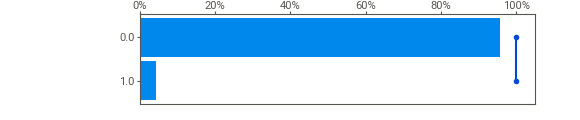
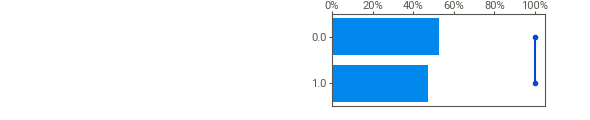
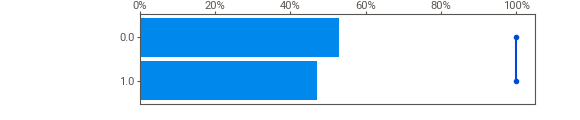
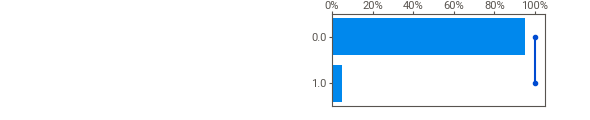
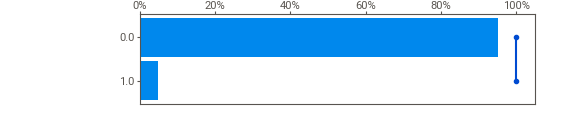
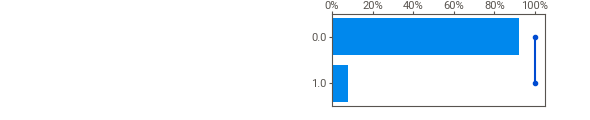
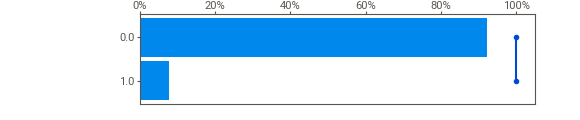
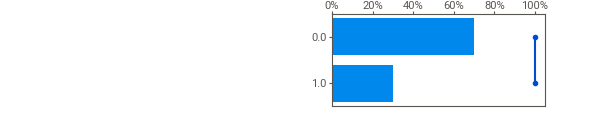
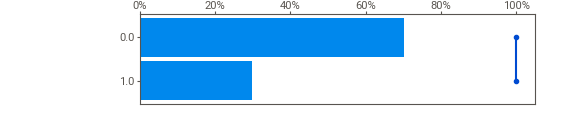
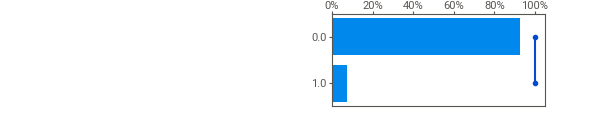
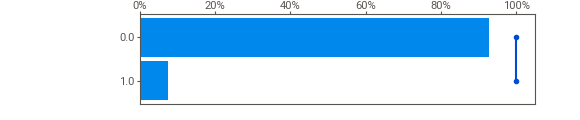
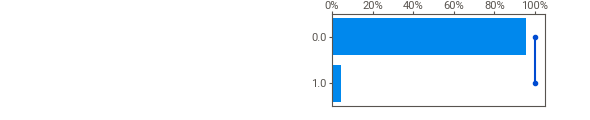
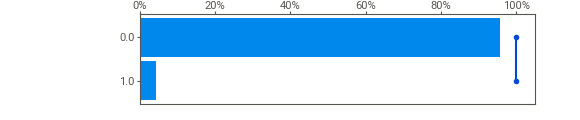
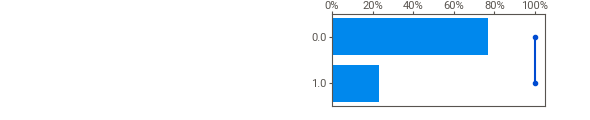
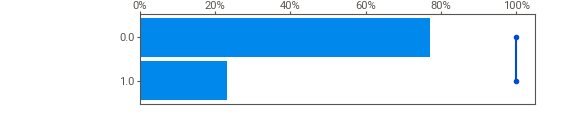
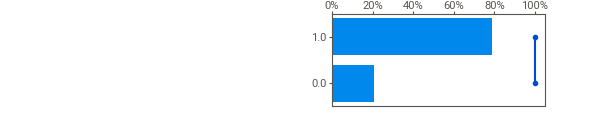
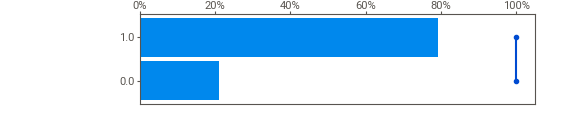
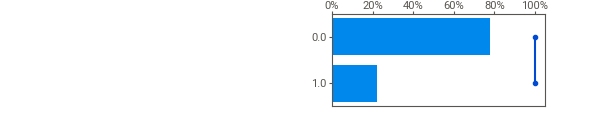
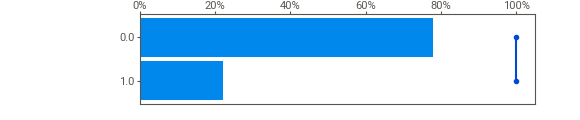
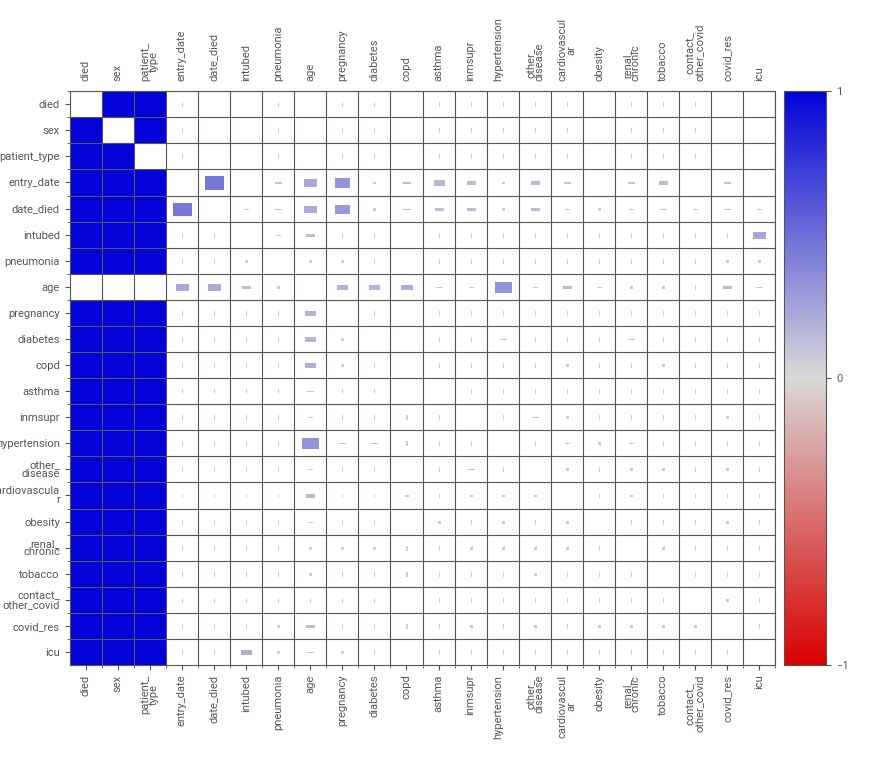
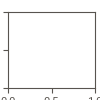

In [39]:
my_report_1.show_notebook()

### Hipoteses e Conclusões

Podemos extrair insights importantes a partir do conjunto de dados. Primeiro podemos ver uma taxa de mortalidade que beira os $6\%$ , ou seja bastante alta. Assim nossa primeira tarefa será explicar o porquê de uma taxa de letalidade tão alta.

Até o momento, existem hipóteses de que o risco de óbito pode estar correlacionado a comorbidades e idade de um individuo. Portanto, se olharmos os fatores de risco do conjunto de dados podemos correlacionar aos óbitos:

- Desenvolvimento de Pneumonia
- Idade
- Se o paciente foi intubado ou não
- Se foi re-infectado pela doença
- Diabetes
- Hipertensão
- Problemas Renais

Sabendo dessa correlação, podemos tentar explicar a alta taxa de letalidade na nosso amostra. Vamos saber a distribuição de indivíduos que contêm esse fatores.

```
Média de idades é 42.62 anos com desvio padrão de 16.66
Pessoas Obesas em nossa amostra 19.53 %
Pessoas re-infectadas em nossa amostra 79.08 %
Pessoas com Hiper-tensão em nossa amostra 19.59 %
Pessoas com problemas Renais em nossa amostra 2.03 %
Pessoas que desenvolveram pneumonia em nossa amostra 18.43 %
Média de idades de pessoas que viream a óbito é 60.75 anos com desvio padrão de 15.40
```

Há um forte indício de que na amostra muitos indivíduos tiveram re-infecção, que é um fator agravante para o óbito. Dessa forma pode-se deduzir que a doença não foi controlada de forma correta, veja o gráfico de média móvel de mortes. 

Outro agravante para a taxa de óbitos é a média de idade que é de pessoas com $60+$ anos.

Sendo assim, a alta taxa de letalidade pode ser explicada pela falta de controle de infeções dos indivíduos, principalmente aqueles com idade avançadas (idosos).

## Perguntas


**a) Desenvolva hipóteses e visualizações envolvendo riscos de internação ou morte**
(coluna “icu” ou “death-date”) por COVID-19 para:
<ul>
    <li>i) pacientes grávidas (coluna “pregnancy”);</li>
<li>ii) pacientes com hipertensão (coluna “hypertension”);</li>
</ul>

**Grávidas**

In [40]:
preg = df[df['pregnancy']==1]

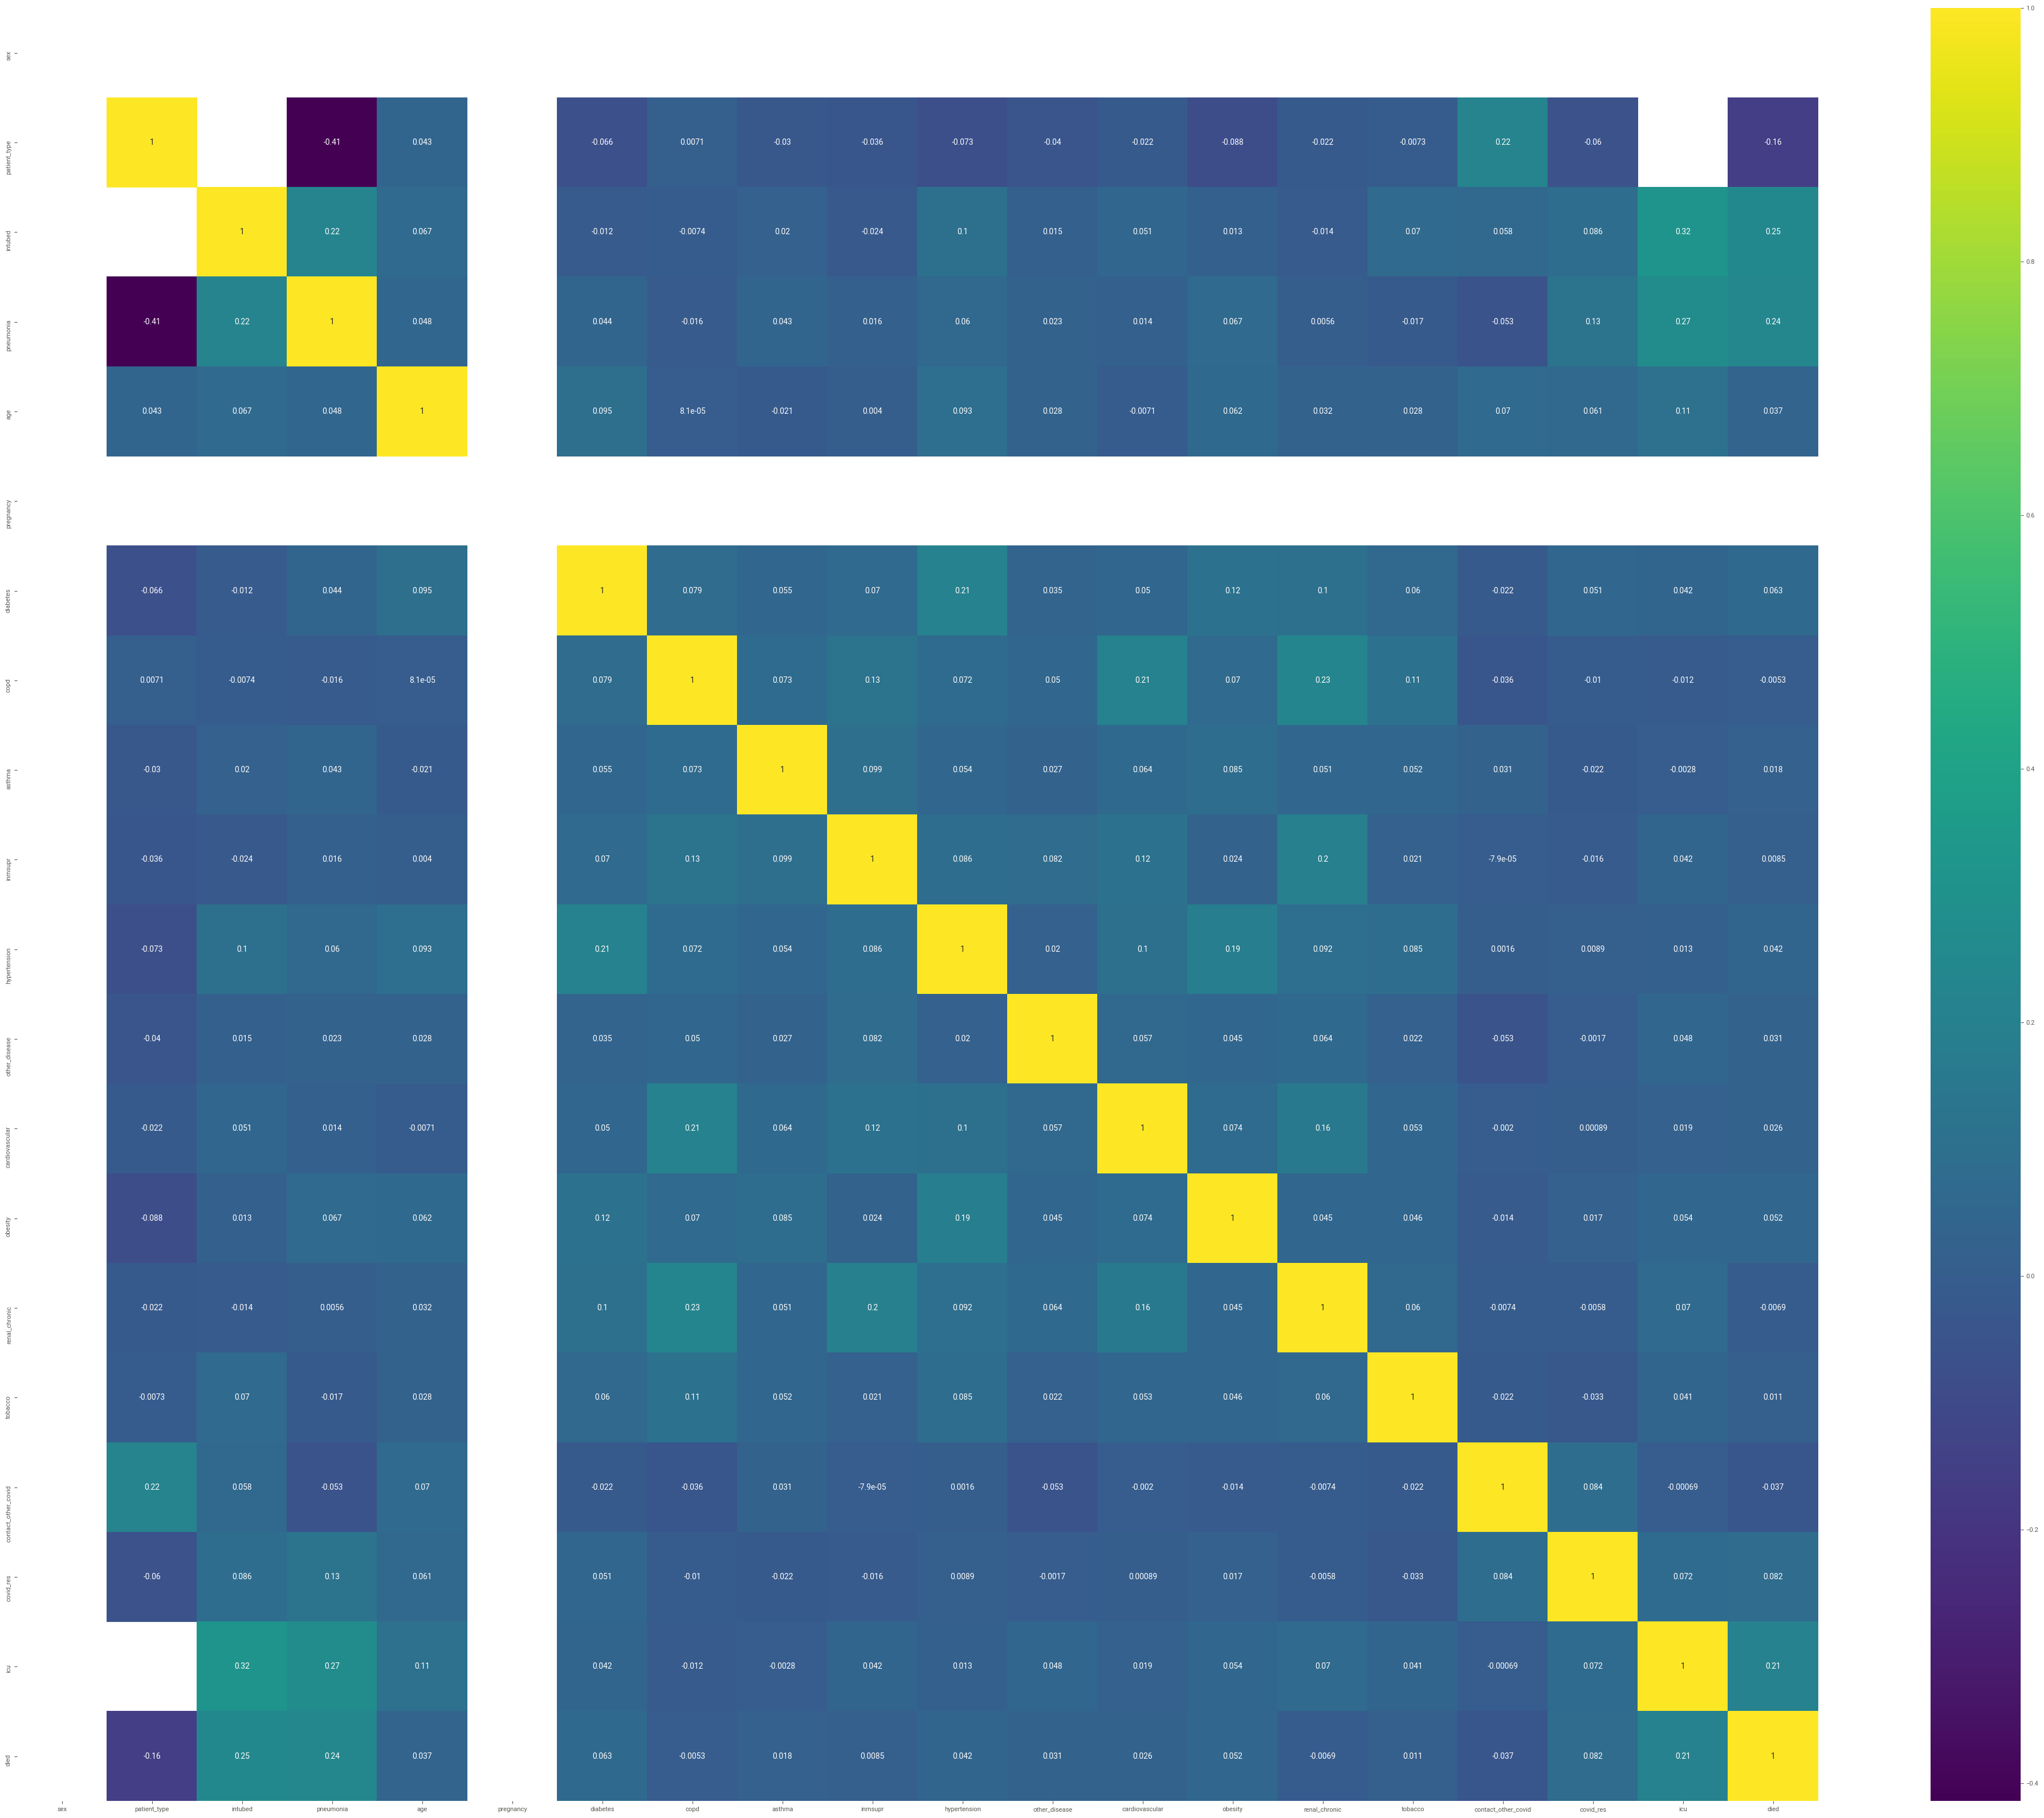

In [41]:
plt.figure(figsize=(40,32))
corrmat = preg.corr()
sns.heatmap(corrmat,annot=True,cmap="viridis")
plt.tight_layout()

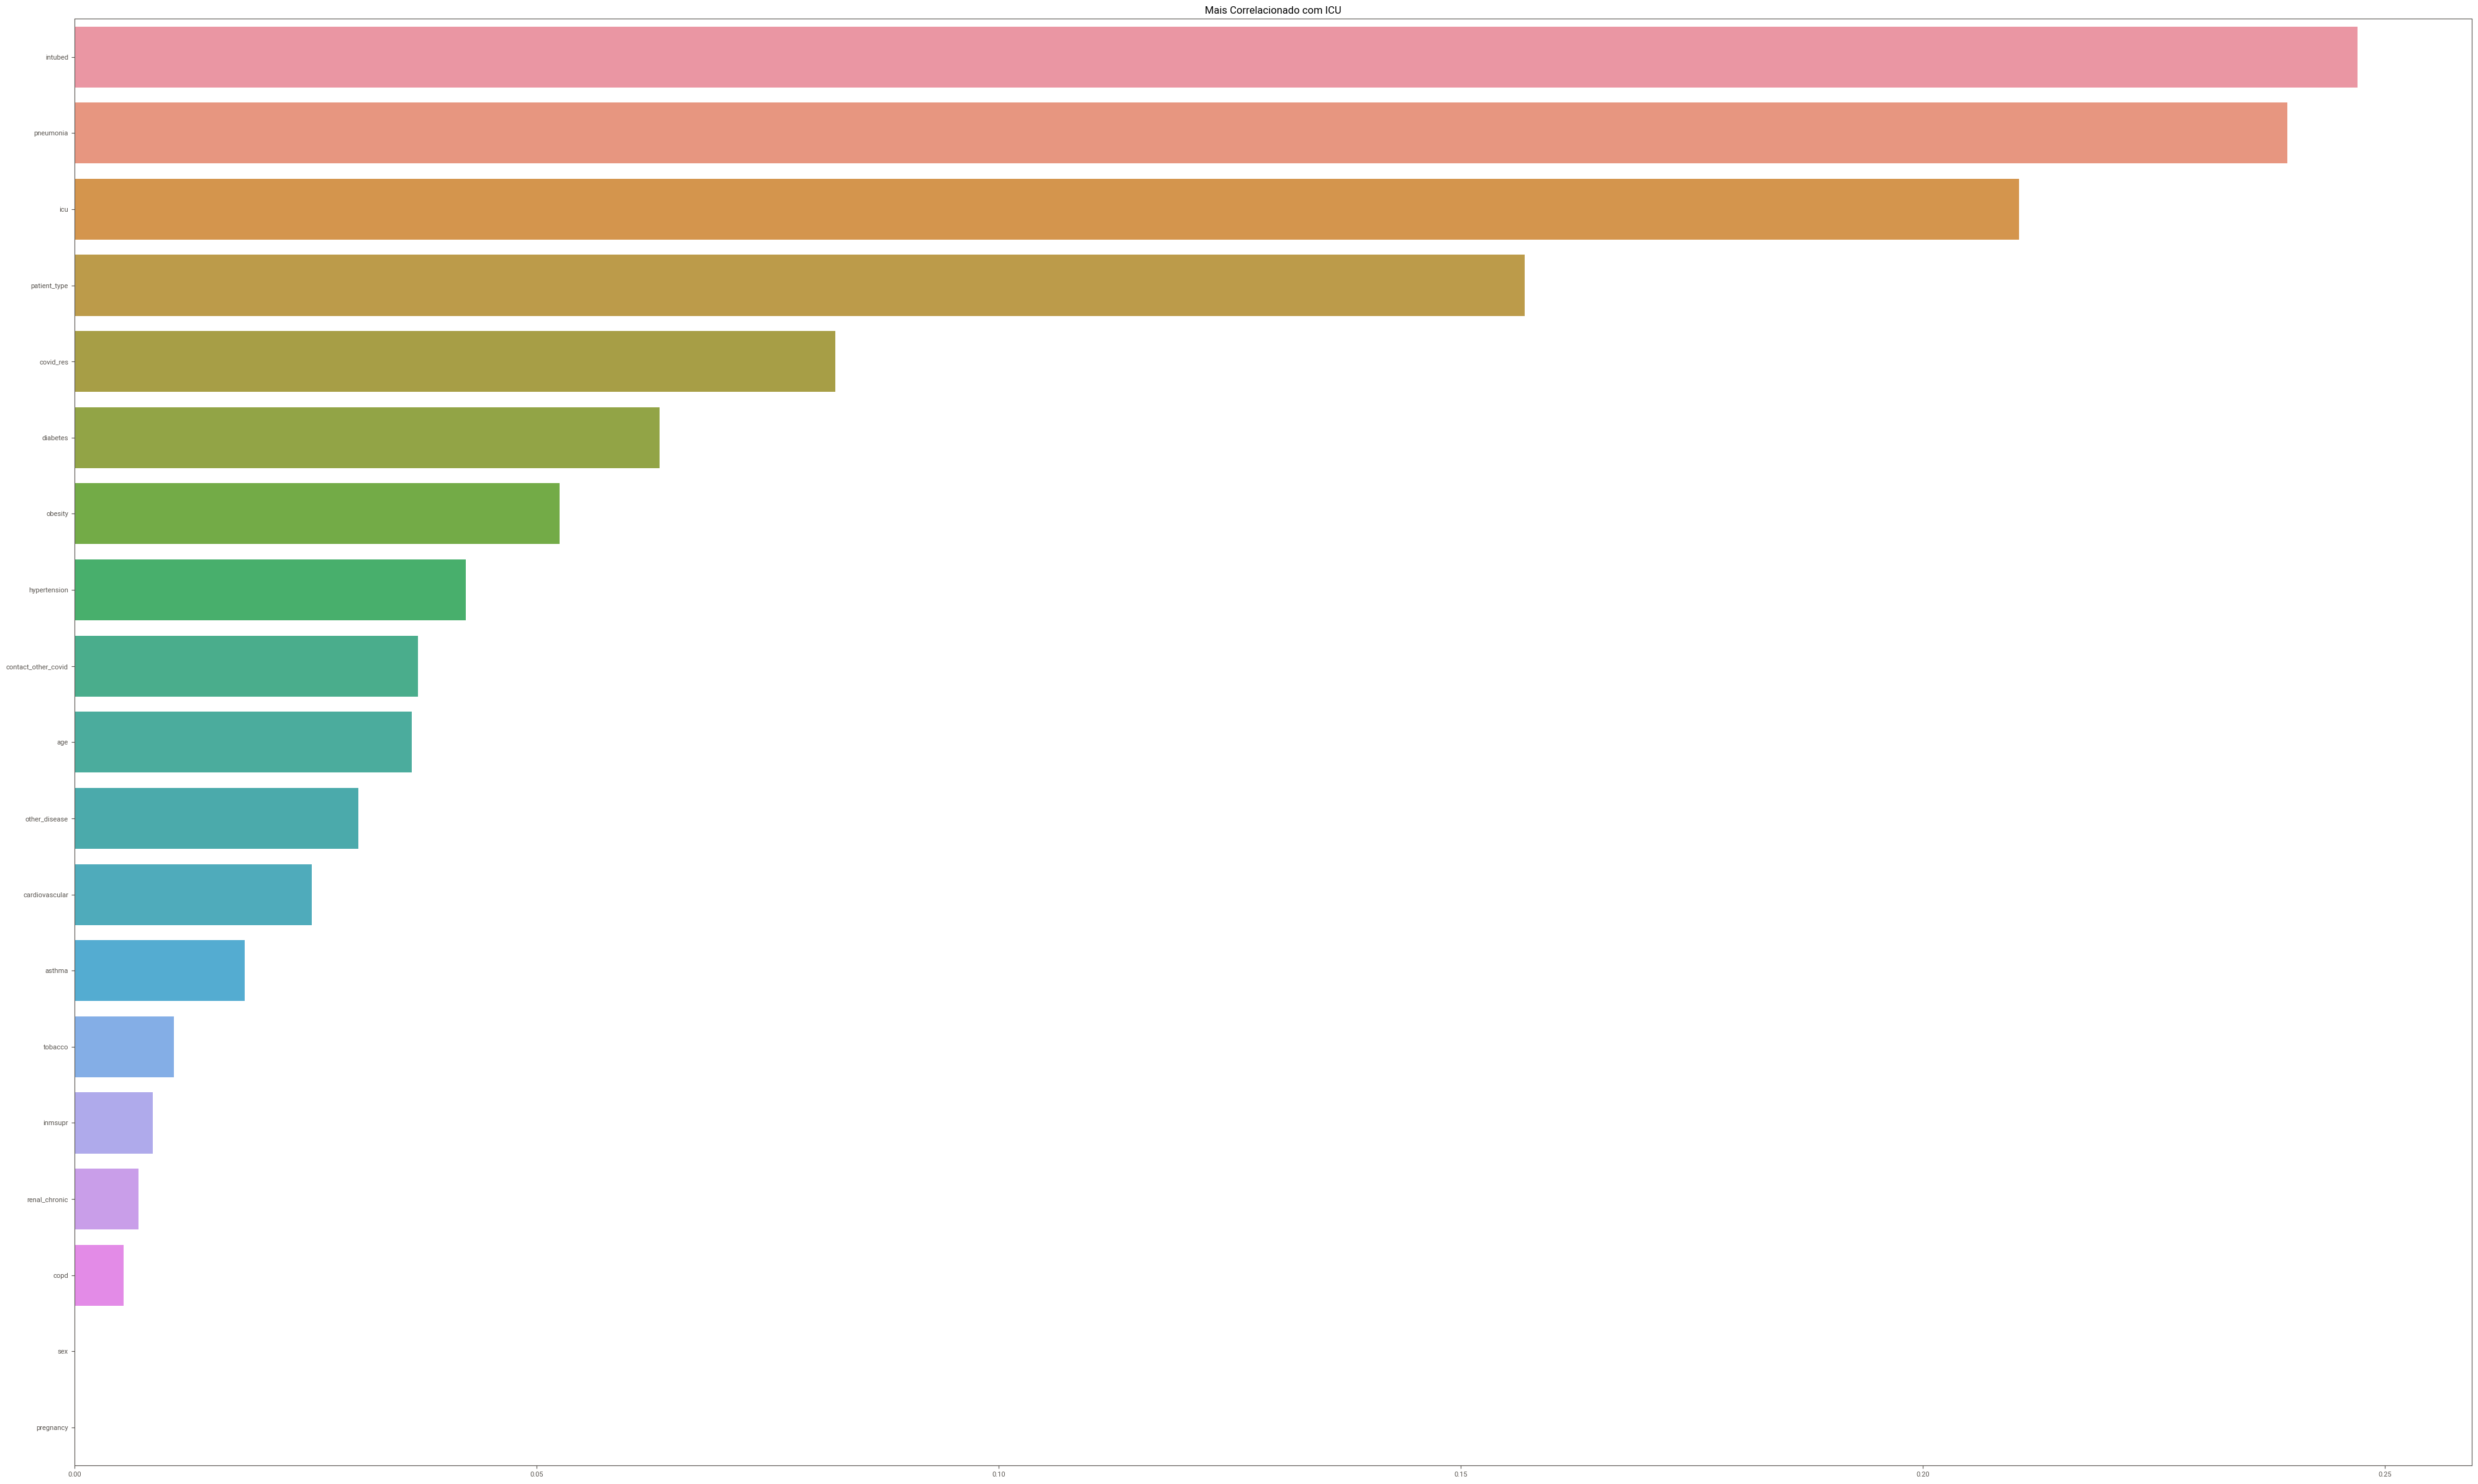

In [42]:
plt.figure(figsize=(40,24))
correlations =corrmat.abs()['died'].sort_values(ascending=False)[1:]
sns.barplot(x=correlations.values,y=correlations.index).set_title('Mais Correlacionado com ICU')
plt.tight_layout()

In [43]:
print("Temos %d"%(len(preg)),"pessoas infectadas. Onde %.d"%(len(preg[preg['died']==1])),
      "vieram á óbito e %.d"%(len(preg[preg['died']==0])),'mil se recuperam')
print('Assim tivemos um taxa de letalidade nessa amostra de %.2f'%((len(preg[preg['died']==1])/len(preg[preg['died']==0]))*100),"%")
print('Média de idades de pessoas que viream a óbito é %.2f'%(preg[preg['died']==1]['age'].mean()),'anos com desvio padrão de %.2f'%(preg[preg['died']==1]['age'].std()))
print('Pessoas Obesas em nossa amostra %.2f'%((len(preg[preg['obesity']==1])/len(preg[preg['obesity']==0]))*100),"%")
print('Pessoas re-infectadas em nossa amostra %.2f'%((len(preg[preg['covid_res']==1])/len(preg[preg['covid_res']==0]))*100),"%")
print('Pessoas com Hipertensão em nossa amostra %.2f'%((len(preg[preg['hypertension']==1])/len(preg[preg['hypertension']==0]))*100),"%")
print('Pessoas que desenvolveram pneumonia em nossa amostra %.2f'%((len(preg[preg['pneumonia']==1])/len(preg[preg['pneumonia']==0]))*100),"%")



Temos 4063 pessoas infectadas. Onde 48 vieram á óbito e 4015 mil se recuperam
Assim tivemos um taxa de letalidade nessa amostra de 1.20 %
Média de idades de pessoas que viream a óbito é 30.77 anos com desvio padrão de 6.48
Pessoas Obesas em nossa amostra 10.27 %
Pessoas re-infectadas em nossa amostra 65.10 %
Pessoas com Hipertensão em nossa amostra 3.60 %
Pessoas que desenvolveram pneumonia em nossa amostra 10.26 %


Text(0.5, 1.0, 'Distribuição de  riscos de internação  por grávidas')

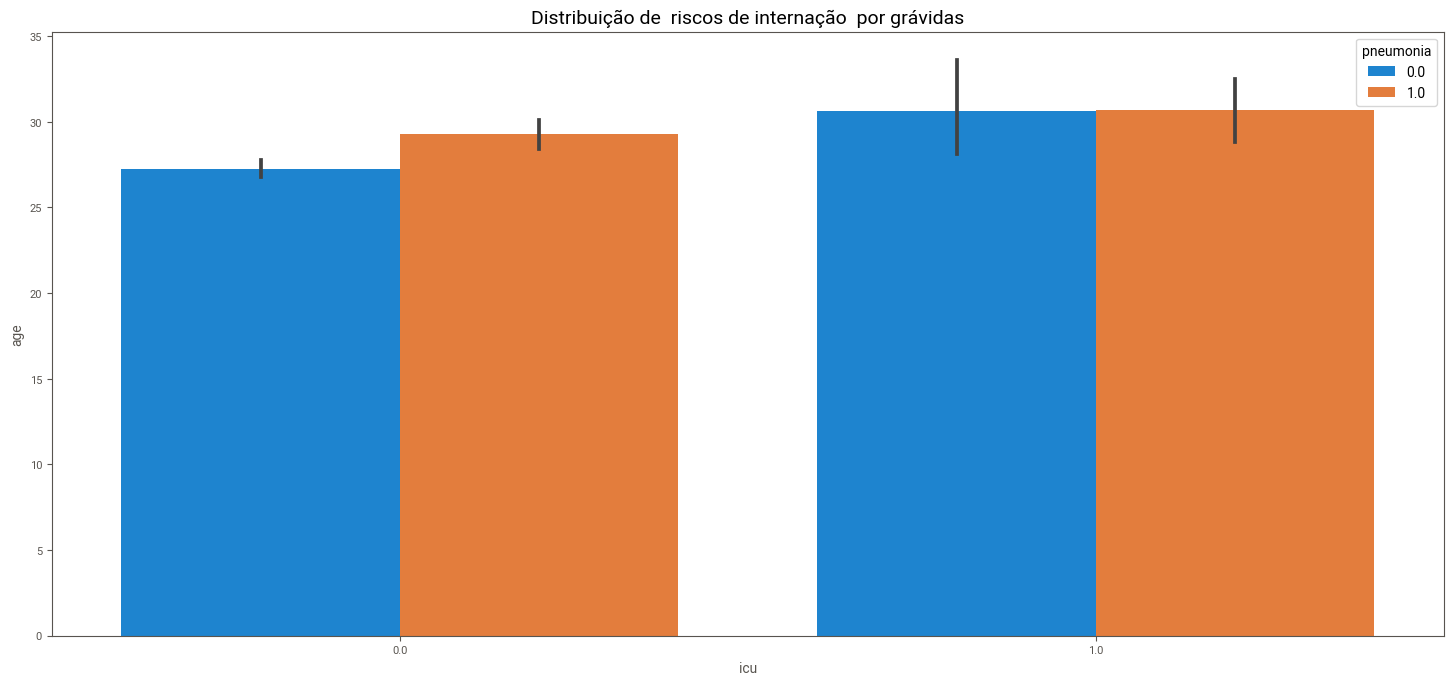

In [44]:
plt.figure(figsize =(16,8))
sns.barplot(data =preg ,y = 'age', x = 'icu', hue = 'pneumonia')
plt.title('Distribuição de  riscos de internação  por grávidas', fontsize = 14)

Text(0.5, 1.0, 'Distribuição de  riscos óbitos/Grávidas com obesidade')

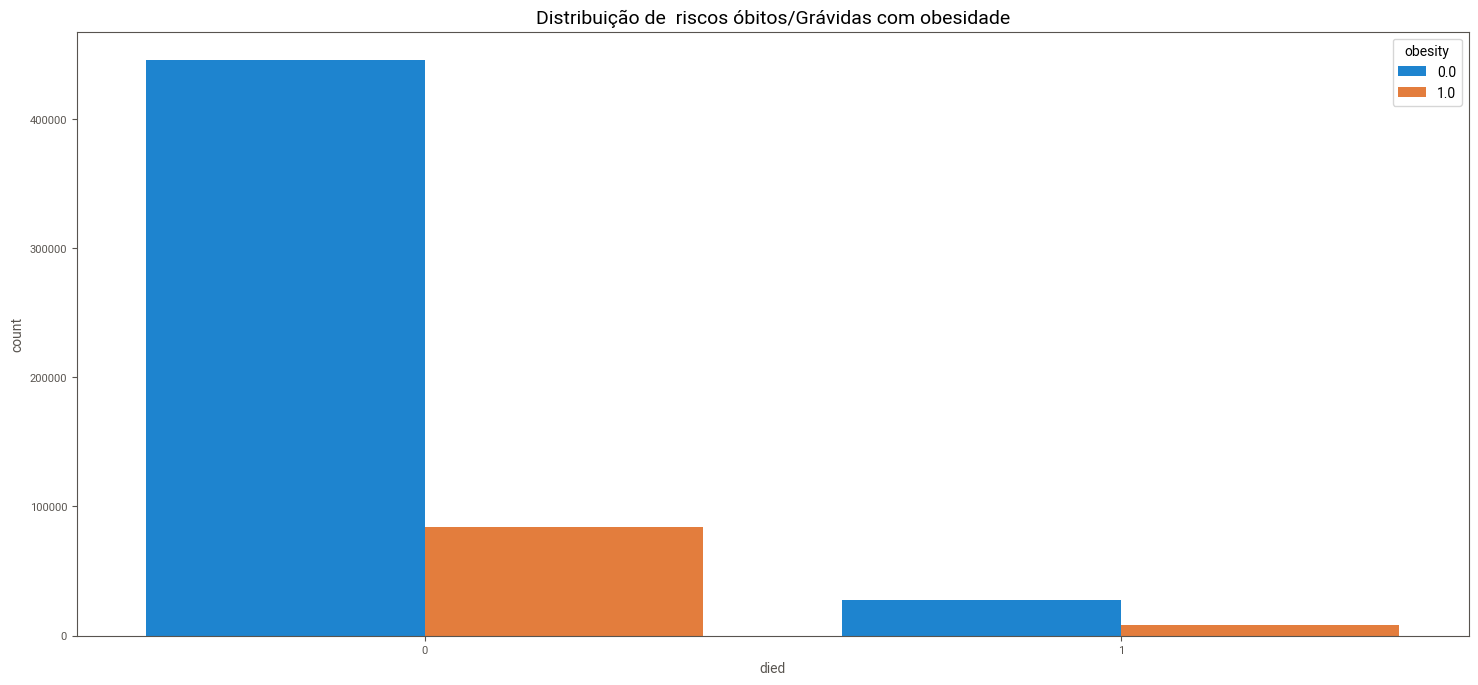

In [45]:
plt.figure(figsize =(16,8))
sns.countplot(data =df , x = 'died', hue = 'obesity')
plt.title('Distribuição de  riscos óbitos/Grávidas com obesidade', fontsize = 14)

Text(0.5, 1.0, 'Distribuição de riscos de internação/grávidas com obesidade')

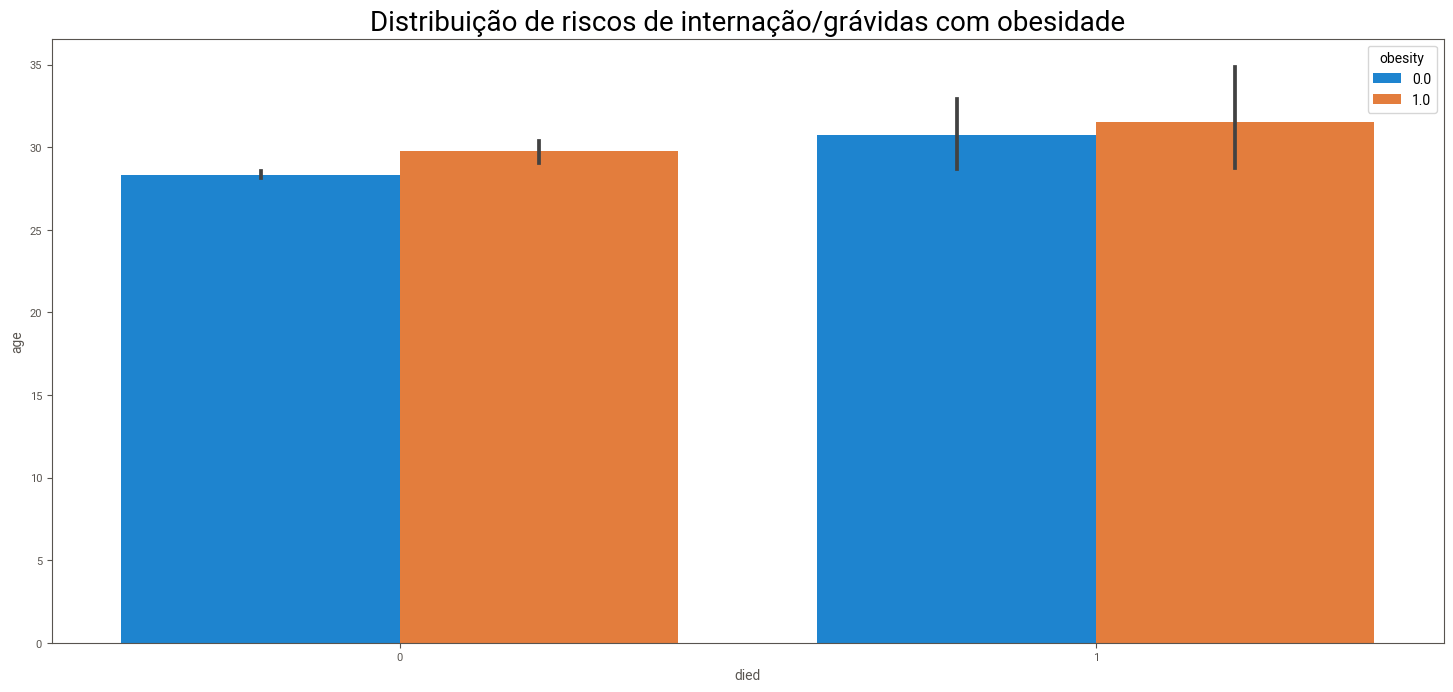

In [46]:
plt.figure(figsize =(16,8))
sns.barplot(data =preg ,y = 'age', x = 'died', hue = 'obesity')
plt.title('Distribuição de riscos de internação/grávidas com obesidade', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de  riscos de internação  por grávidas')

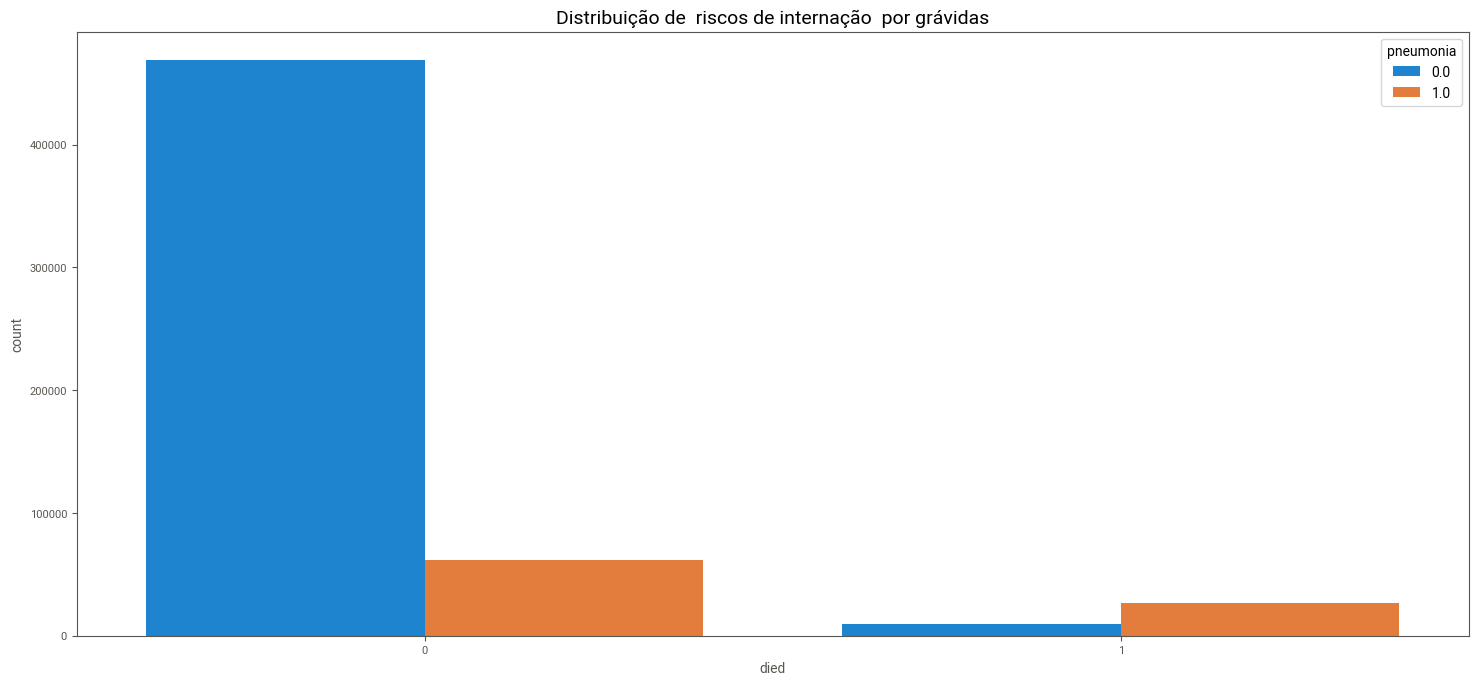

In [47]:
plt.figure(figsize =(16,8))
sns.countplot(data =df , x = 'died', hue = 'pneumonia')
plt.title('Distribuição de  riscos de internação  por grávidas', fontsize = 14)

In [48]:
preg['covid_res'].replace({0: 'Primeira vez', 1 : 'Re-infecção'},inplace=True)
preg['pneumonia'].replace({0: 'Não Tem pneumonia', 1: ' Tem pneumonia'},inplace=True)
preg['hypertension'].replace({0: 'Não Tem hipertensão', 1: 'Tem hipertensão'},inplace=True)
preg['obesity'].replace({0: 'Não é Obeso', 1: 'É obeso'},inplace=True)


/home/rafael/.local/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Text(0.5, 1.0, 'Risco de óbito por idade, Entre grávidas que desenvolveram pneumonia')

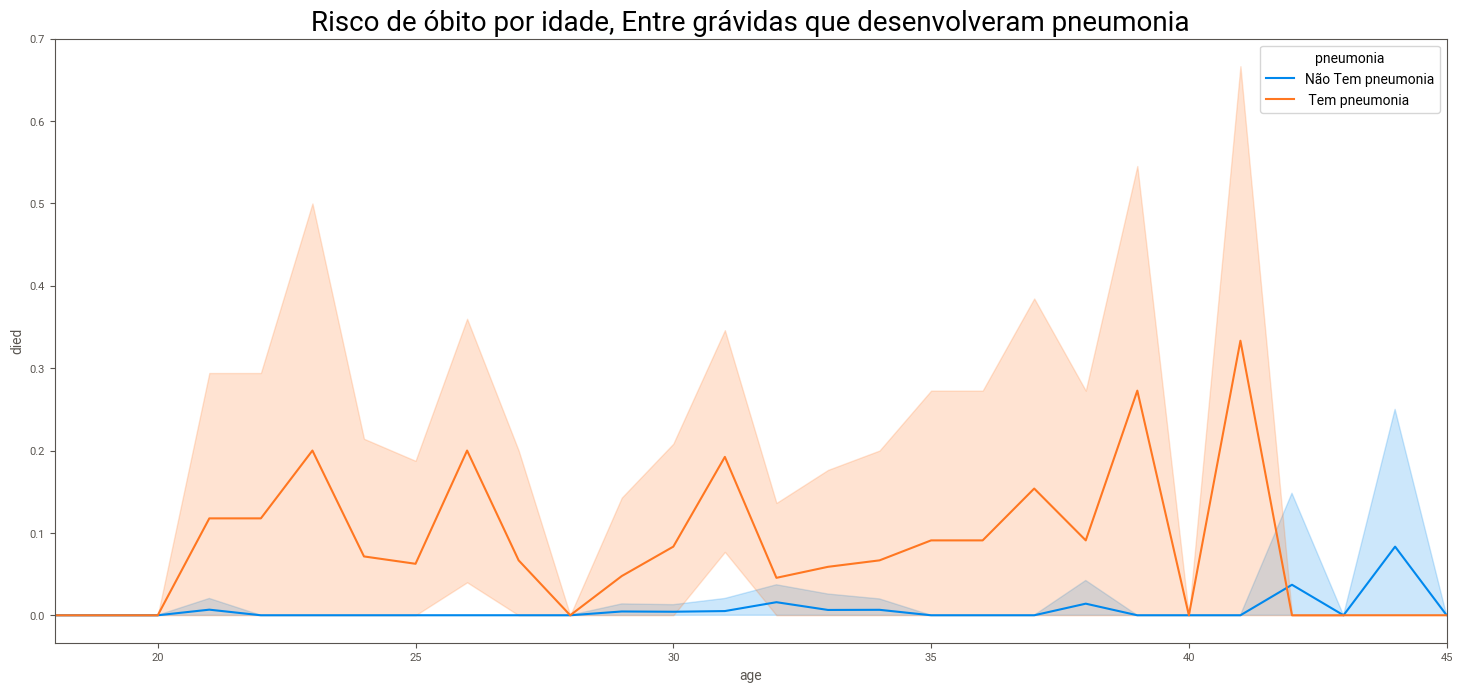

In [49]:
plt.figure(figsize =(16,8))
sns.lineplot(data=preg,
             x='age',
             y='died',
             hue='pneumonia',)
plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre grávidas que desenvolveram pneumonia',fontsize = 20)

Text(0.5, 1.0, 'Risco de óbito por idade, Entre grávidas que se re-infectaram')

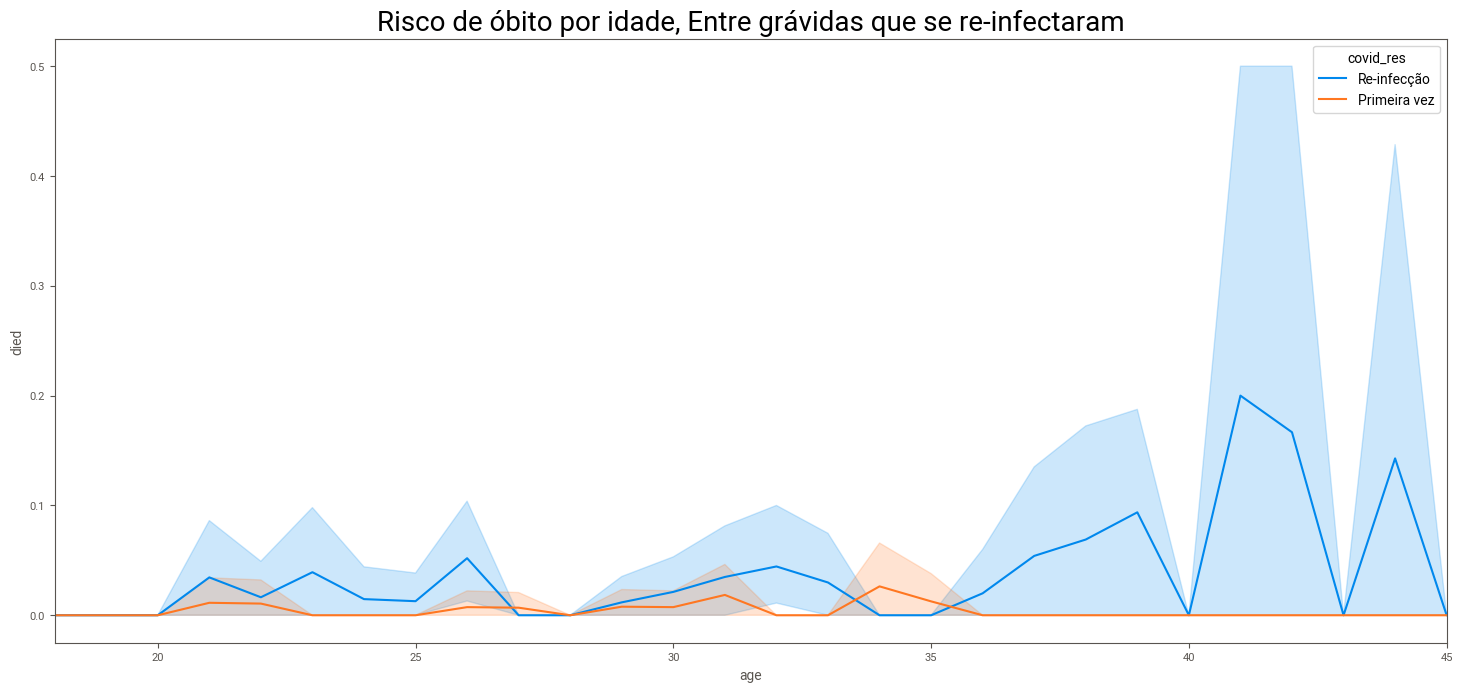

In [50]:
plt.figure(figsize =(16,8))
sns.lineplot(data=preg,
             x='age',
             y='died',
             hue='covid_res',)
plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre grávidas que se re-infectaram',fontsize = 20)

Text(0.5, 1.0, 'Risco de óbito por idade, Entre grávidas que tem hipertensão')

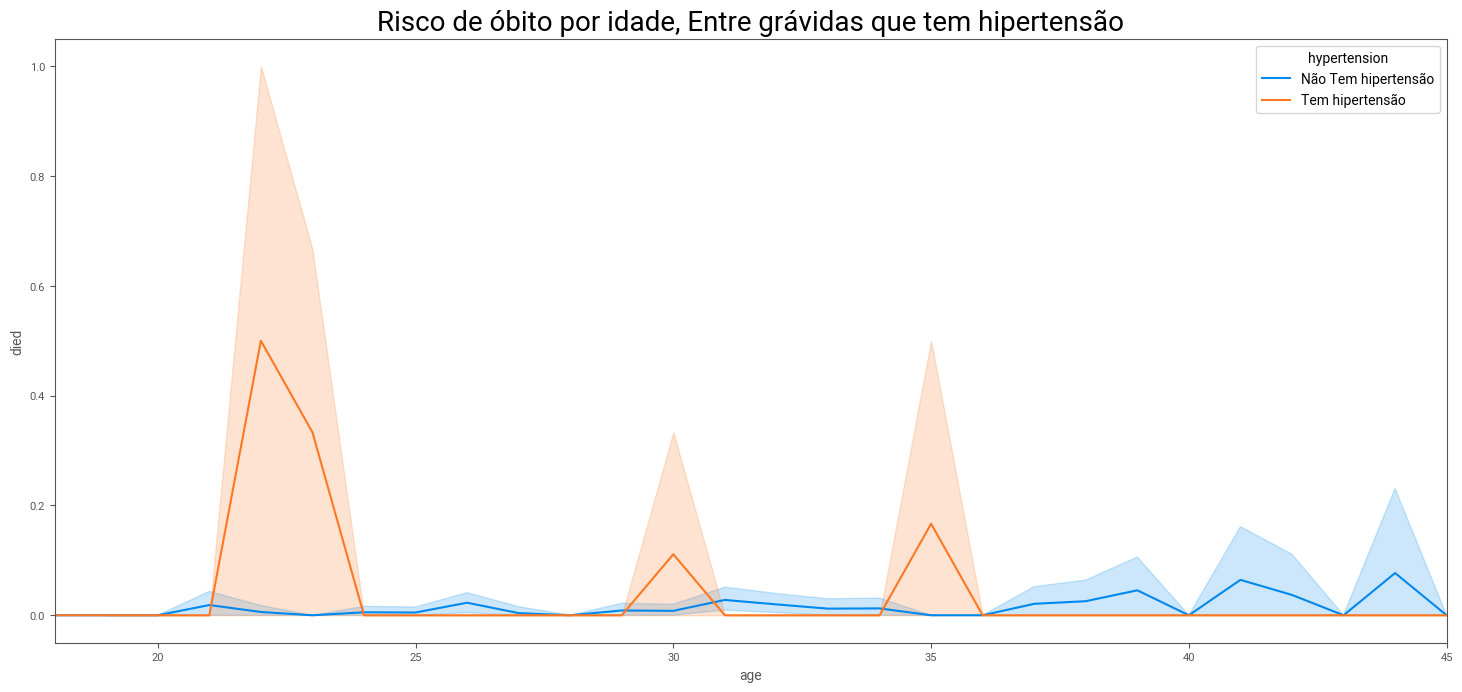

In [51]:
plt.figure(figsize =(16,8))
sns.lineplot(data=preg,
             x='age',
             y='died',
             hue='hypertension',)
plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre grávidas que tem hipertensão',fontsize = 20)

Text(0.5, 1.0, 'Risco de óbito por idade, Entre grávidas que tem obesidade')

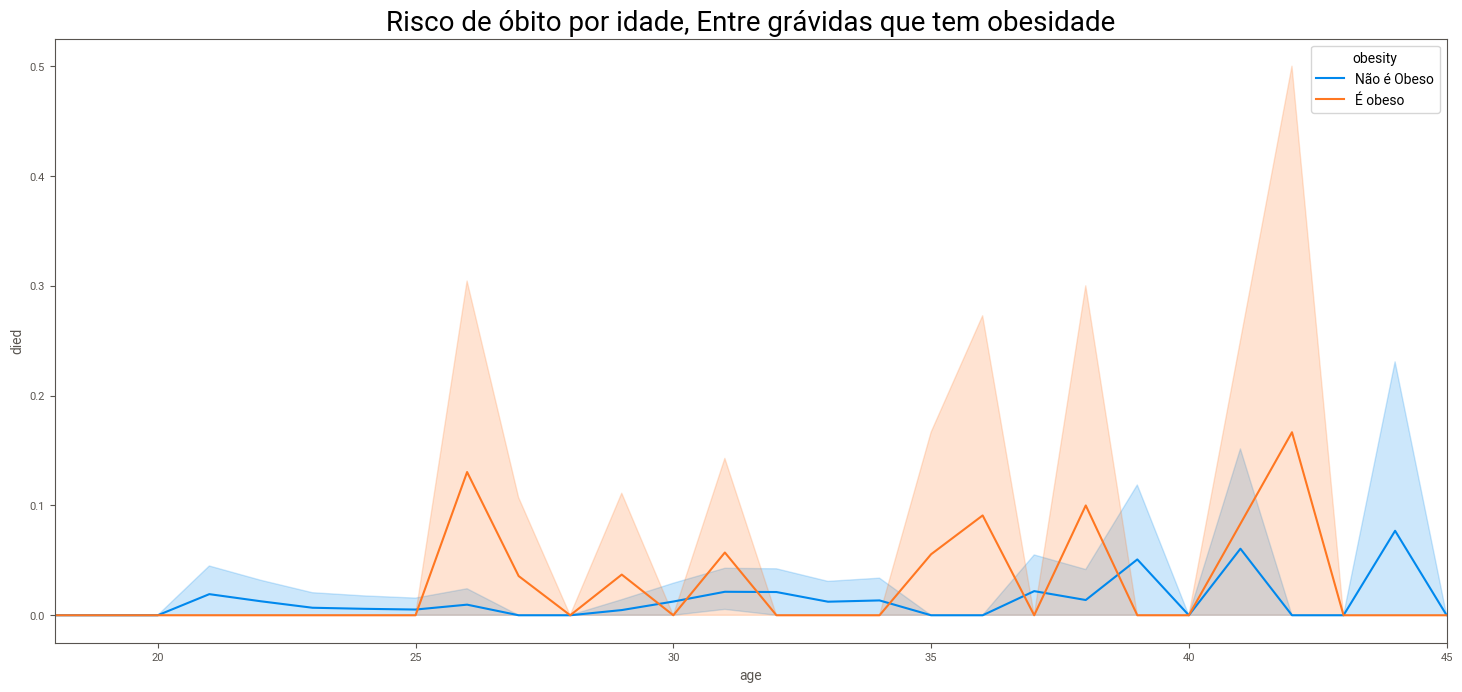

In [52]:
plt.figure(figsize =(16,8))
sns.lineplot(data=preg,
             x='age',
             y='died',
             hue='obesity',)
plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre grávidas que tem obesidade',fontsize = 20)

### Resposta

A principio dentro da nossa amostra o fator gravidez não é por si só um fator de risco para o óbito. Porém se vier acompanhada de outros fatores como:

- Pneumonia
- Foi intubada e está na UTI
- Re-infecção
- Diabetes
- Obesidade
- Hipertensão

Como podemos ver nos gráficos acima, grávidas que desenvolveram pneumonia possuem maiores riscos de virem à óbito,dentro da faixa etária entre $20$ e $45$ anos.  Outro característico é que o fato de re-infeção se tonar ainda mais letal na faixa etária a partir $36$ anos. Hipertensão é um fator de risco para própria gravidez em si, assim se olharmos no gráfico podemos ver que o risco de óbito vem em algumas faixas etárias, $20$ e $25$ , $30$ e $35$. O porquê pode ser uma particularidade do nosso conjunto de dados, um evento sem causa do que uma causalidade em si.

A obesidade é risco para as faixa etárias a partir dos $25$ anos.

Portanto, grávidas com alguns desses tipos de comorbidades têm maior probabilidade vir à óbito.

**Hipertensão**

In [53]:
hiper = df[df['hypertension']==1]

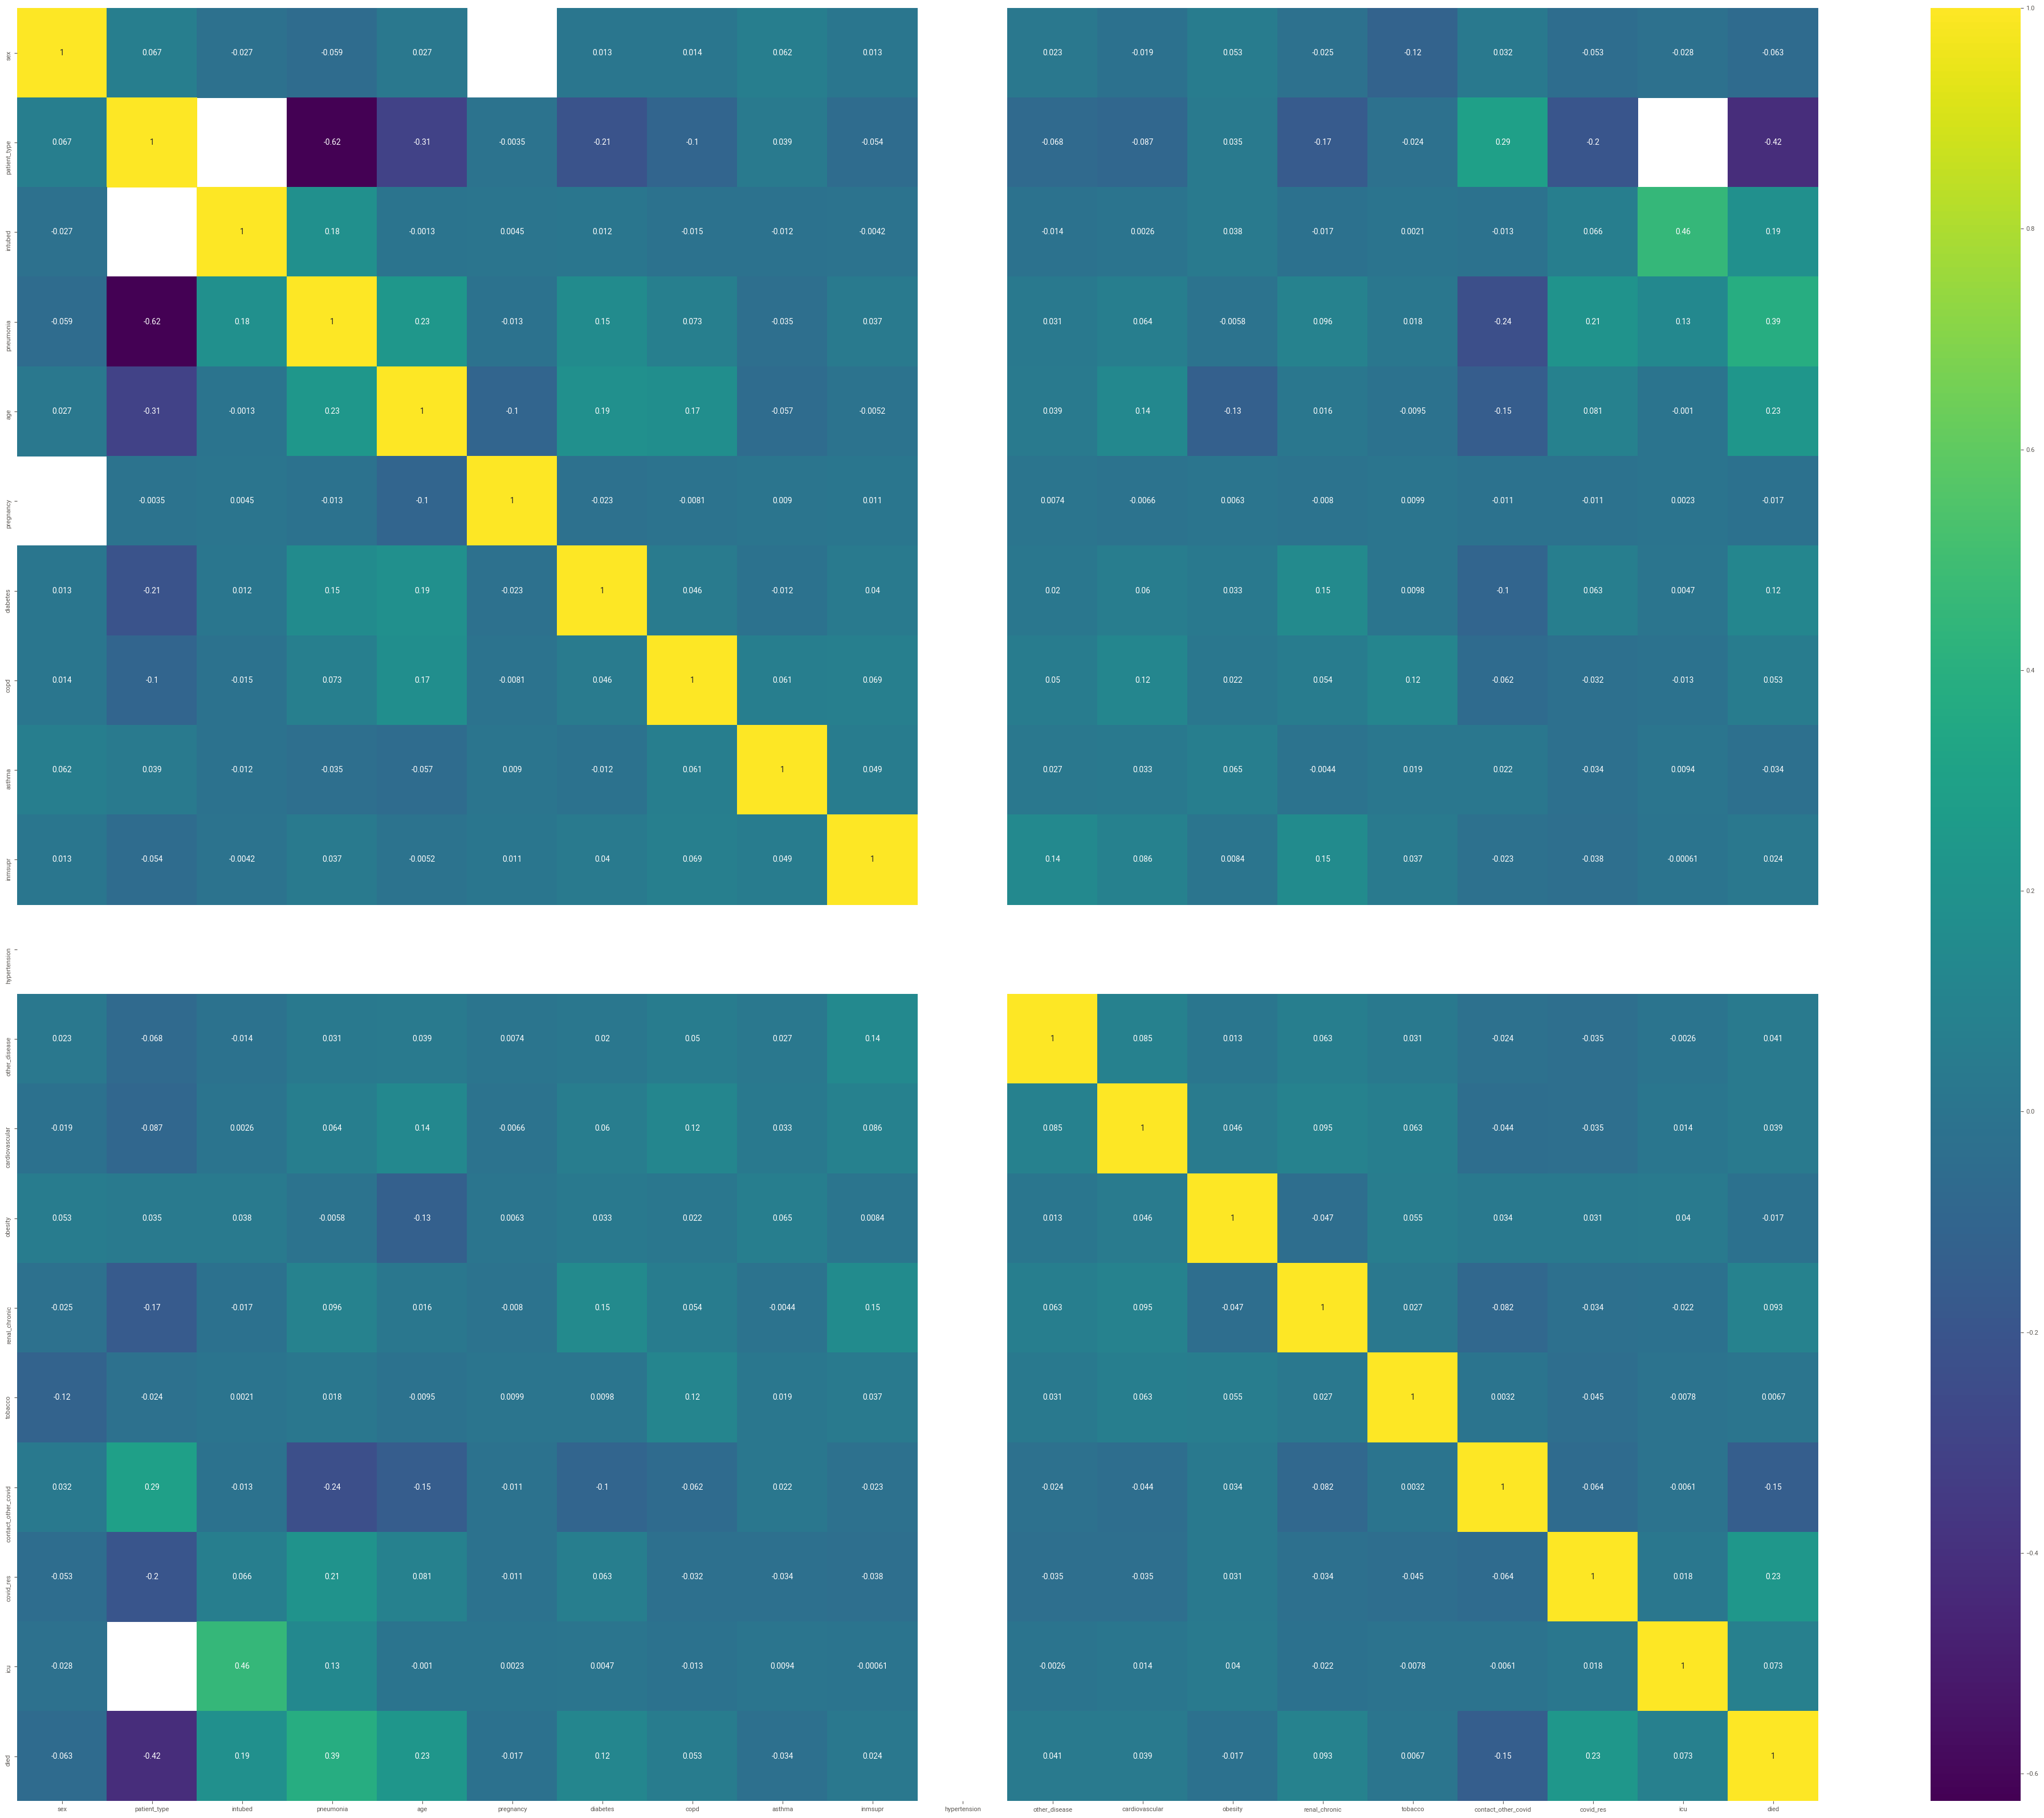

In [54]:
plt.figure(figsize=(40,32))
corrmat = hiper.corr()
sns.heatmap(corrmat,annot=True,cmap="viridis")
plt.tight_layout()

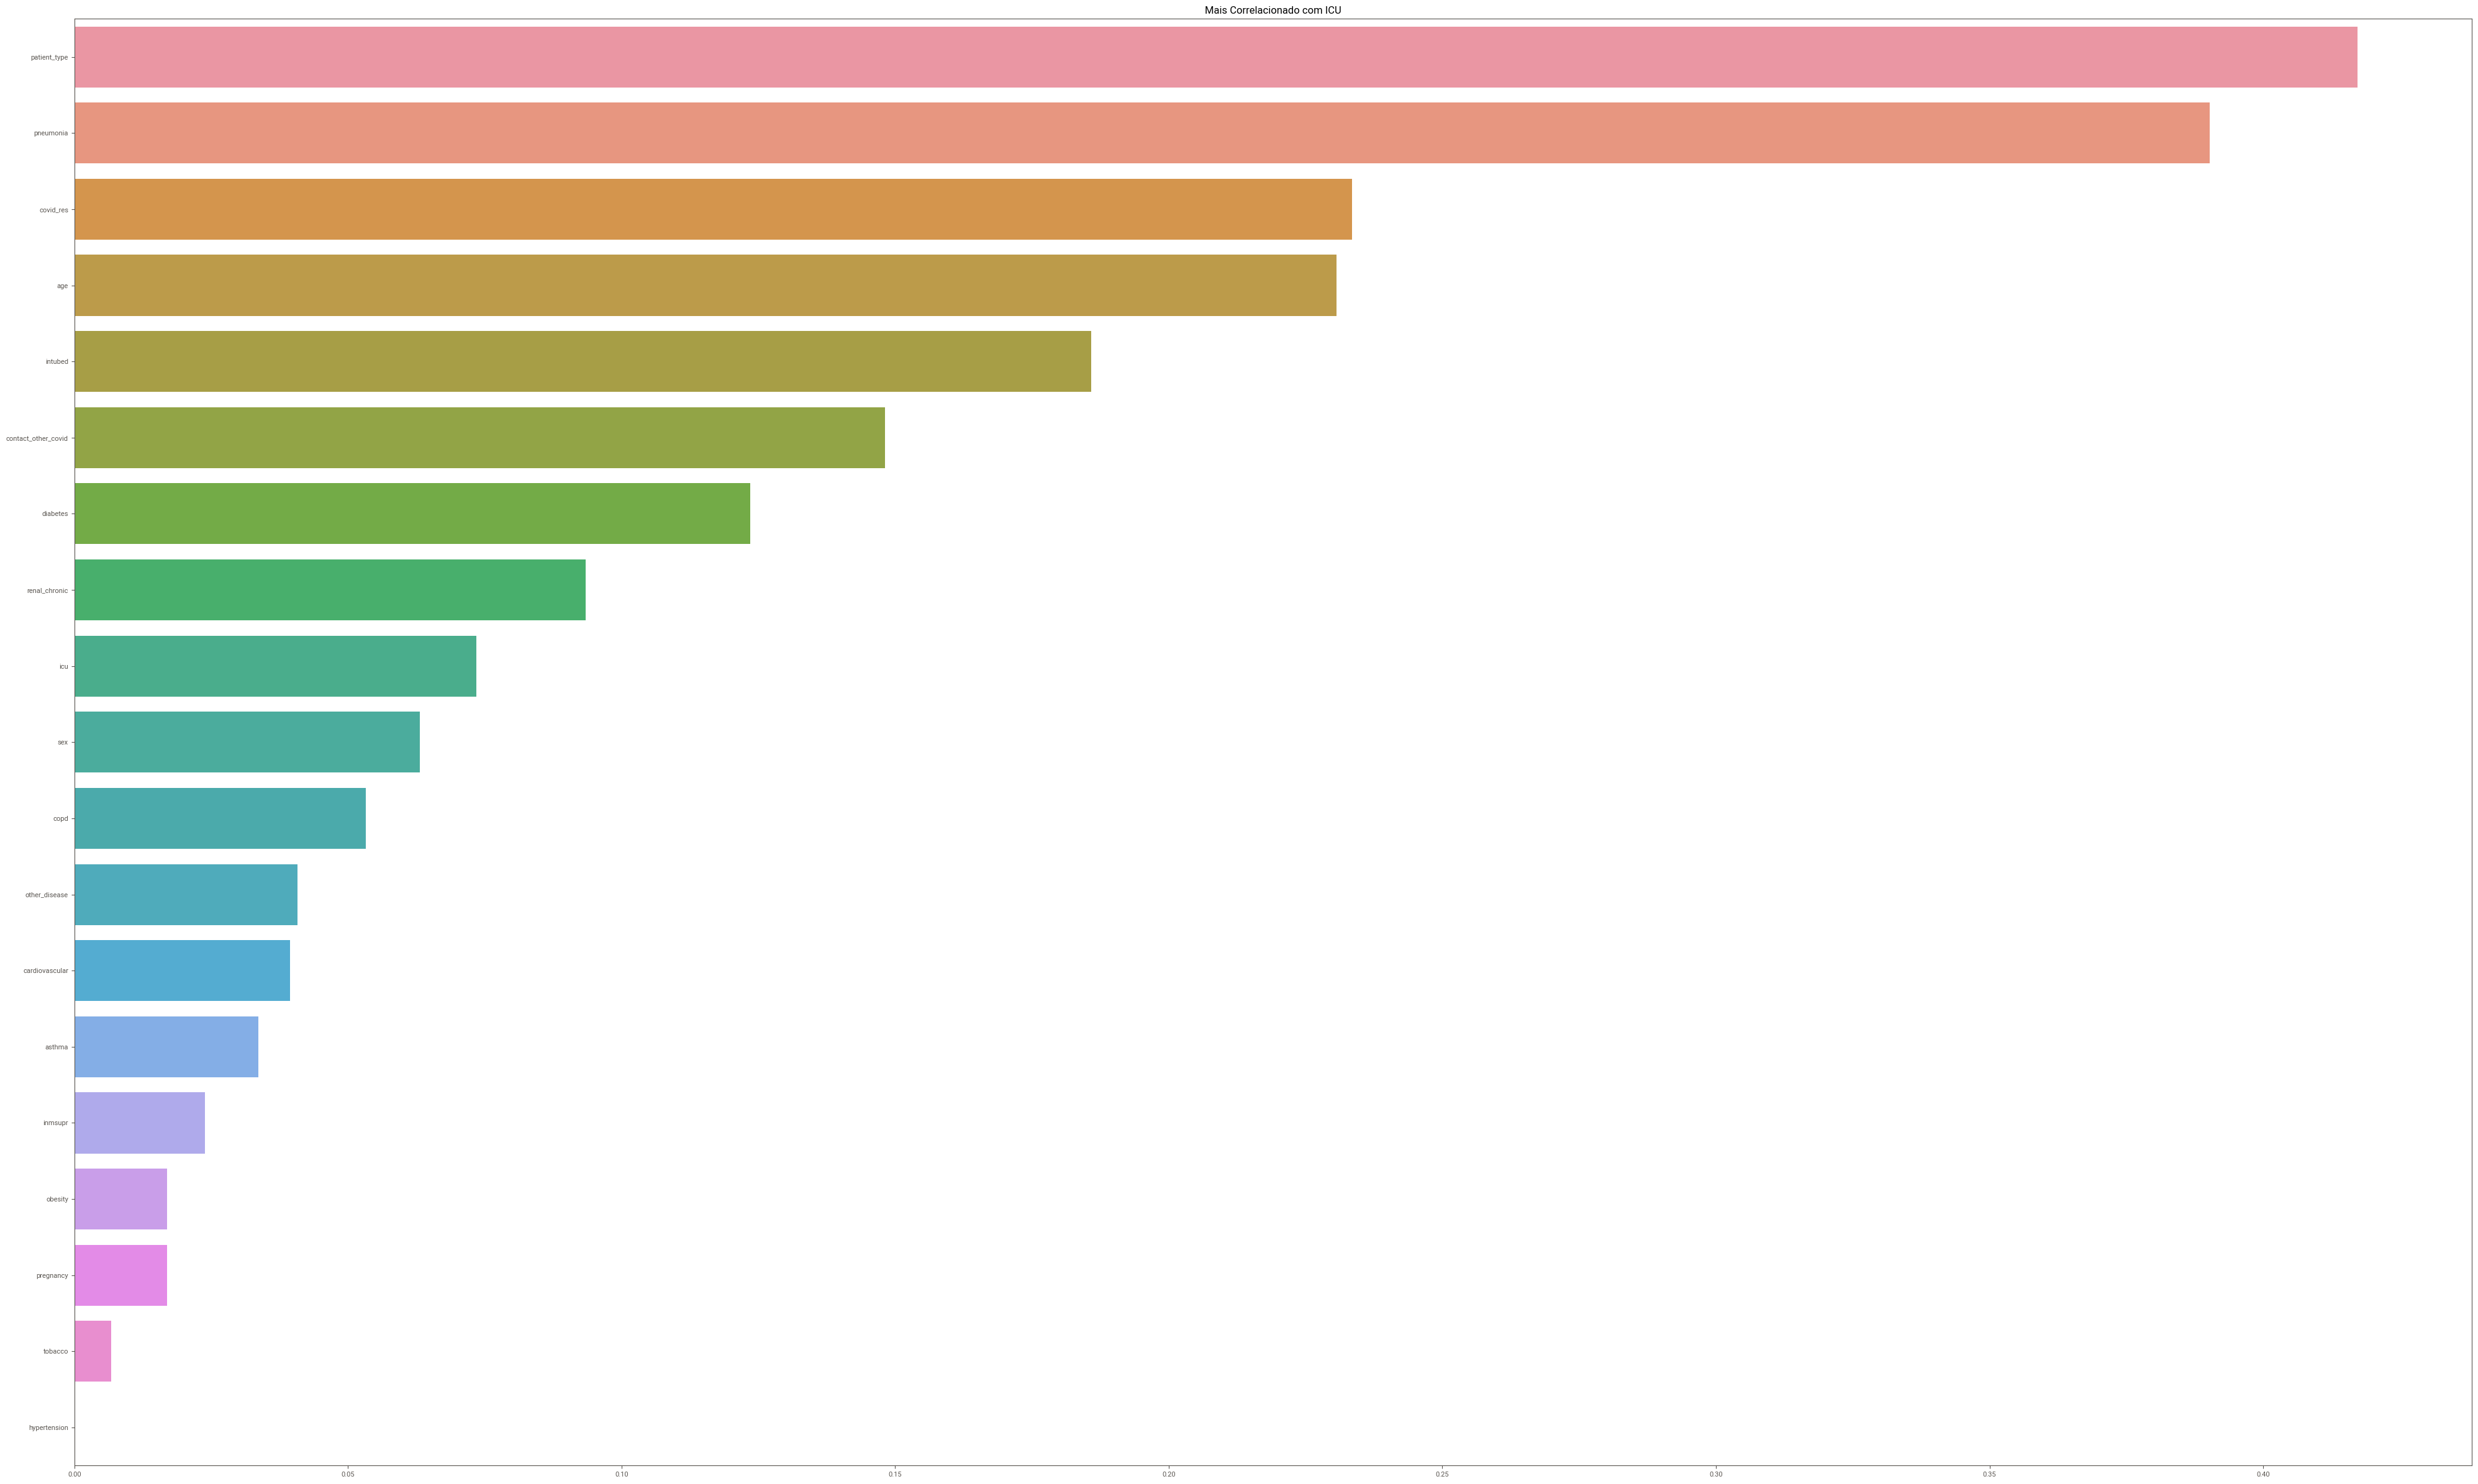

In [55]:
plt.figure(figsize=(40,24))
correlations =corrmat.abs()['died'].sort_values(ascending=False)[1:]
sns.barplot(x=correlations.values,y=correlations.index).set_title('Mais Correlacionado com ICU')
plt.tight_layout()

In [56]:
print("Temos %d"%(len(hiper)),"pessoas infectadas. Onde %.d"%(len(hiper[hiper['died']==1])),
      "vieram á óbito e %.d"%(len(hiper[hiper['died']==0])),'mil se recuperam')
print('Assim tivemos um taxa de letalidade nessa amostra de %.2f'%((len(hiper[hiper['died']==1])/len(hiper[hiper['died']==0]))*100),"%")
print('Média de idades de pessoas que viream a óbito é %.2f'%(hiper[hiper['died']==1]['age'].mean()),'anos com desvio padrão de %.2f'%(preg[preg['died']==1]['age'].std()))
print('Pessoas Obesas em nossa amostra %.2f'%((len(hiper[hiper['obesity']==1])/len(hiper[hiper['obesity']==0]))*100),"%")
print('Pessoas re-infectadas em nossa amostra %.2f'%((len(hiper[hiper['covid_res']==1])/len(hiper))*100),"%")
print('Pessoas que desenvolveram pneumonia em nossa amostra %.2f'%((len(hiper[hiper['pneumonia']==1])/len(hiper[hiper['pneumonia']==0]))*100),"%")
print('Pessoas com Diabetes em nossa amostra %.2f'%((len(hiper[hiper['diabetes']==1])/len(hiper[hiper['diabetes']==0]))*100),"%")
print('Pessoas com Problemas Renais em nossa amostra %.2f'%((len(hiper[hiper['renal_chronic']==1])/len(hiper[hiper['renal_chronic']==0]))*100),"%")



Temos 92508 pessoas infectadas. Onde 15136 vieram á óbito e 77372 mil se recuperam
Assim tivemos um taxa de letalidade nessa amostra de 19.56 %
Média de idades de pessoas que viream a óbito é 65.05 anos com desvio padrão de 6.48
Pessoas Obesas em nossa amostra 43.08 %
Pessoas re-infectadas em nossa amostra 47.88 %
Pessoas que desenvolveram pneumonia em nossa amostra 45.51 %
Pessoas com Diabetes em nossa amostra 68.92 %
Pessoas com Problemas Renais em nossa amostra 8.64 %


In [57]:
hiper['covid_res'].replace({0: 'Primeira vez', 1 : 'Re-infecção'},inplace=True)
hiper['pneumonia'].replace({0: 'Não Tem pneumonia', 1: ' Tem pneumonia'},inplace=True)
hiper['diabetes'].replace({0: 'Não Tem diabetes', 1: 'Tem diabetes'},inplace=True)
hiper['obesity'].replace({0: 'Não é Obeso', 1: 'É obeso'},inplace=True)
hiper['renal_chronic'].replace({0: 'Sem Problemas Renais', 1: 'Com Problemas Renais'},inplace=True)

/home/rafael/.local/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Text(0.5, 1.0, 'Risco de óbito por idade, Entre hipertensos que possuem Problemas Renais')

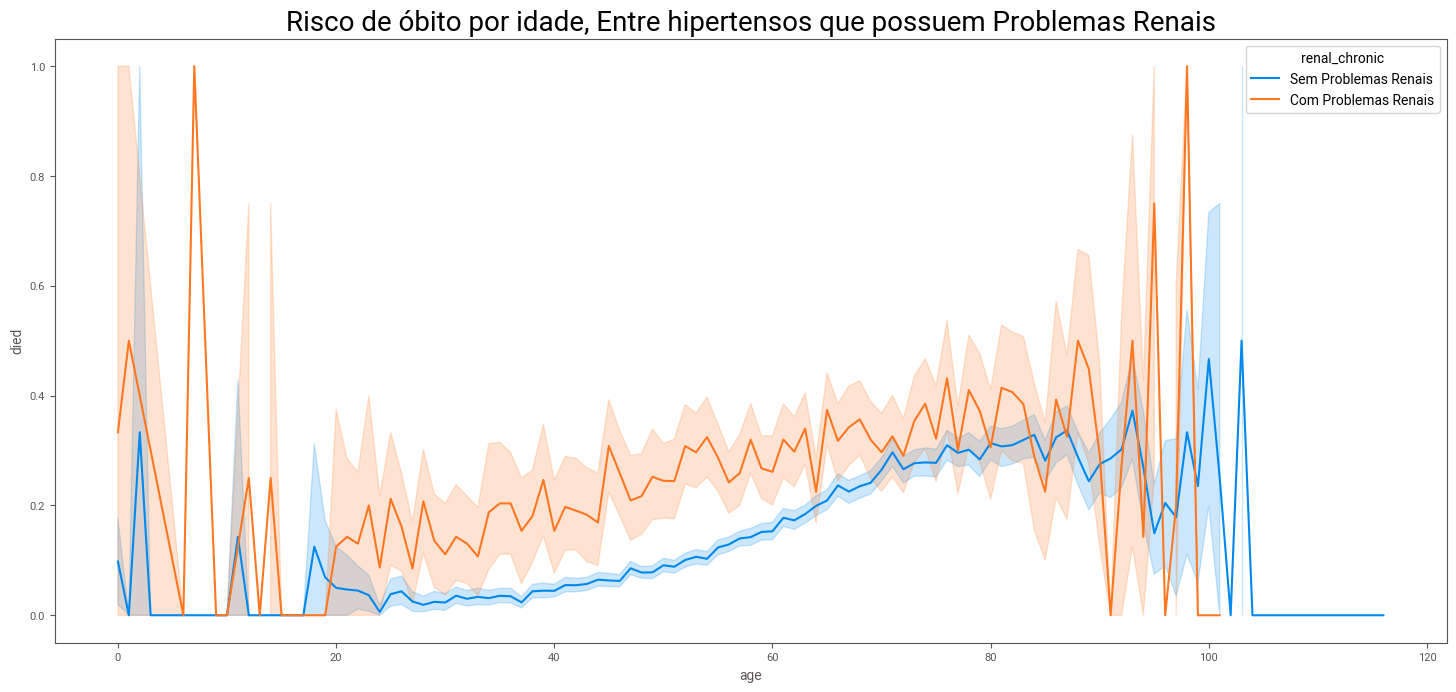

In [58]:
plt.figure(figsize =(16,8))
sns.lineplot(data=hiper,
             x='age',
             y='died',
             hue='renal_chronic',)
#plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre hipertensos que possuem Problemas Renais',fontsize = 20)

Text(0.5, 1.0, 'Risco de óbito por idade, Entre hipertensos que são Diabeticos')

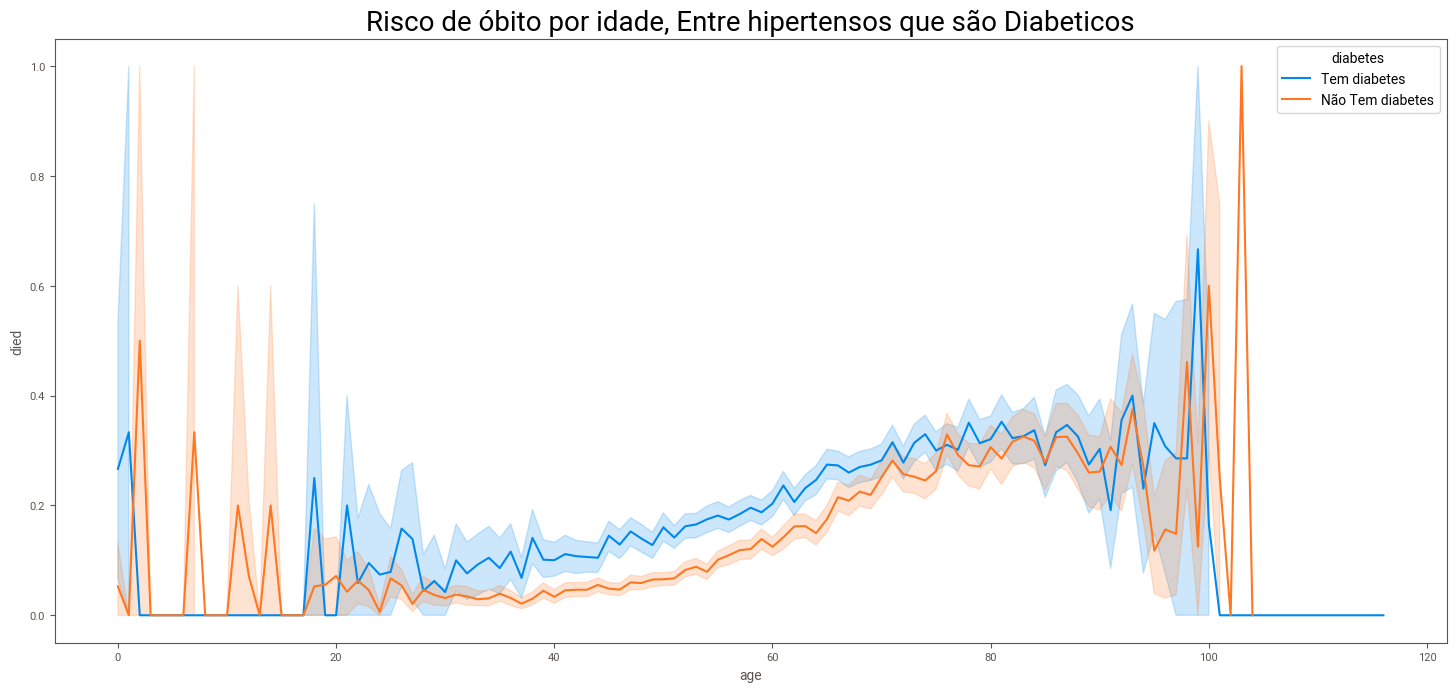

In [59]:
plt.figure(figsize =(16,8))
sns.lineplot(data=hiper,
             x='age',
             y='died',
             hue='diabetes',)
#plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre hipertensos que são Diabeticos',fontsize = 20)

Text(0.5, 1.0, 'Risco de óbito por idade, Entre hipertensos que são obesos')

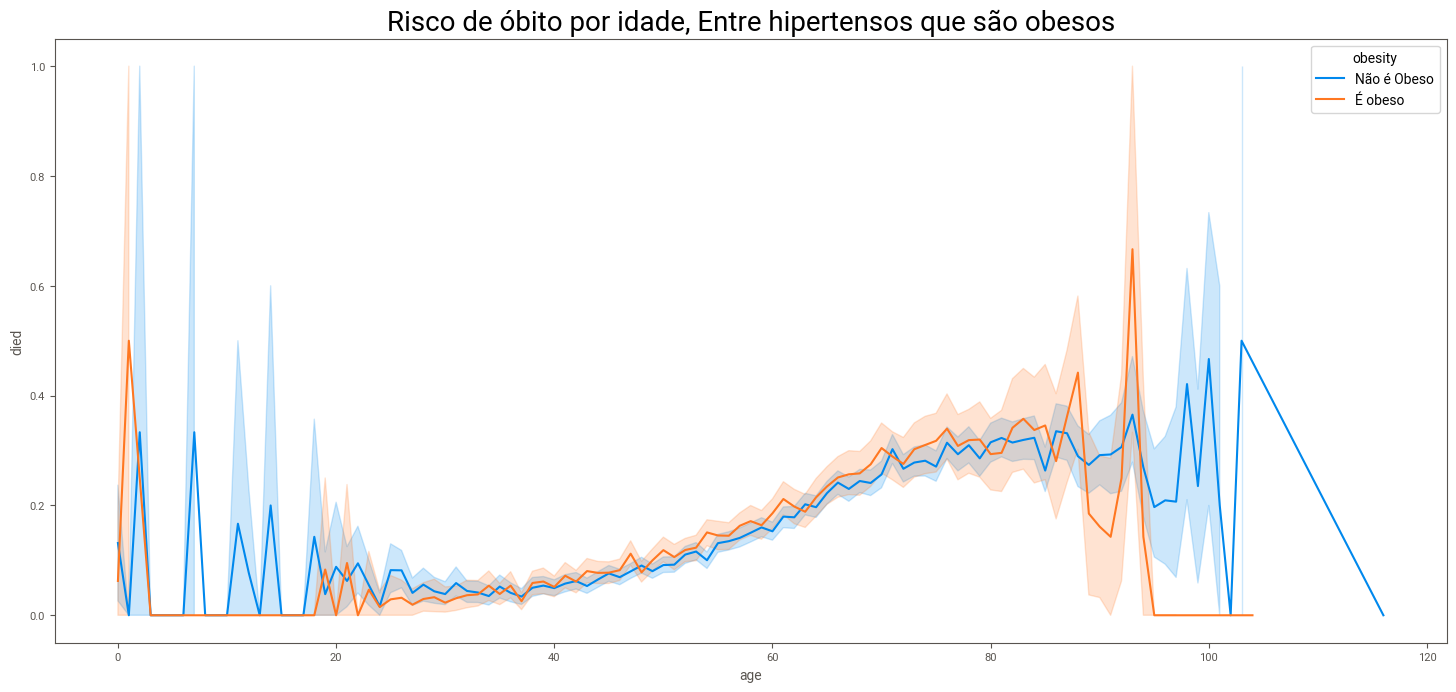

In [60]:
plt.figure(figsize =(16,8))
sns.lineplot(data=hiper,
             x='age',
             y='died',
             hue='obesity',)
#plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre hipertensos que são obesos',fontsize = 20)

Text(0.5, 1.0, 'Risco de óbito por idade, Entre hipertensos que se re-infectaram')

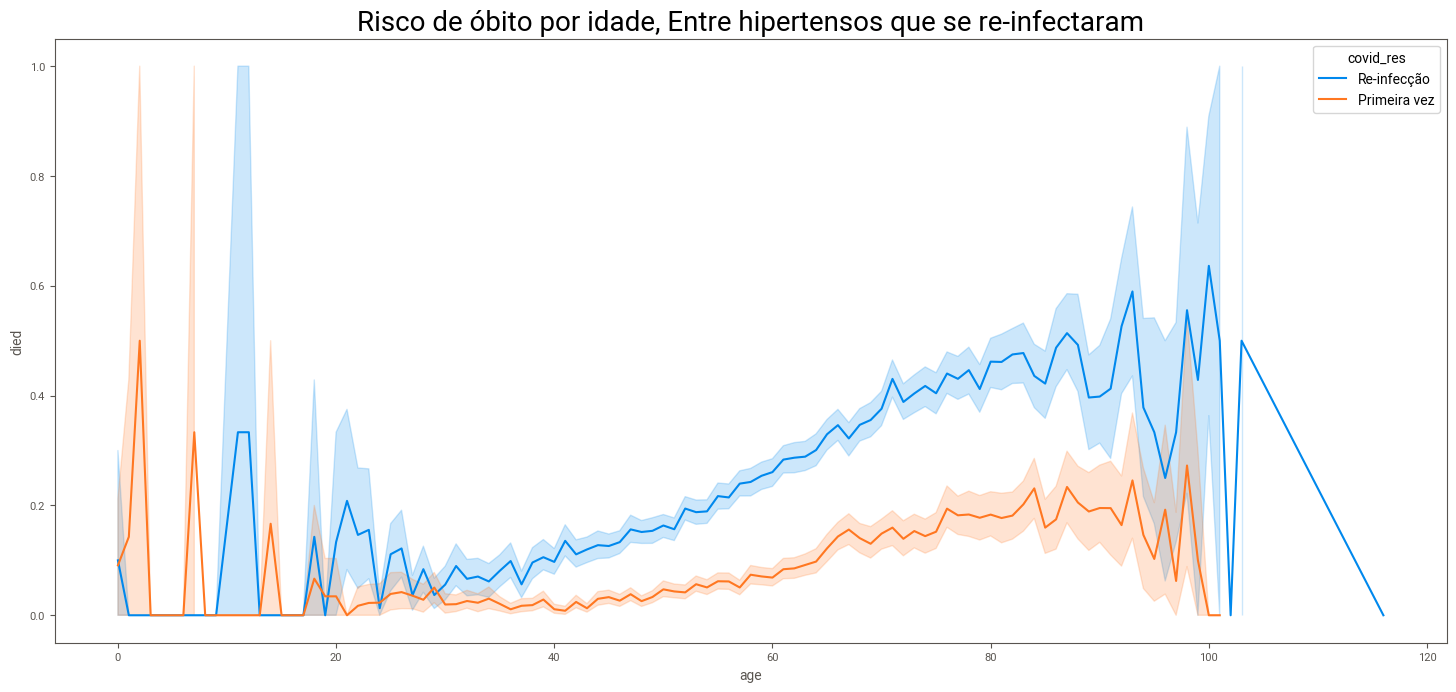

In [61]:
plt.figure(figsize =(16,8))
sns.lineplot(data=hiper,
             x='age',
             y='died',
             hue='covid_res',)
#plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre hipertensos que se re-infectaram',fontsize = 20)

Text(0.5, 1.0, 'Risco de óbito por idade, Entre hipertensos que desenvolveram pneumonia')

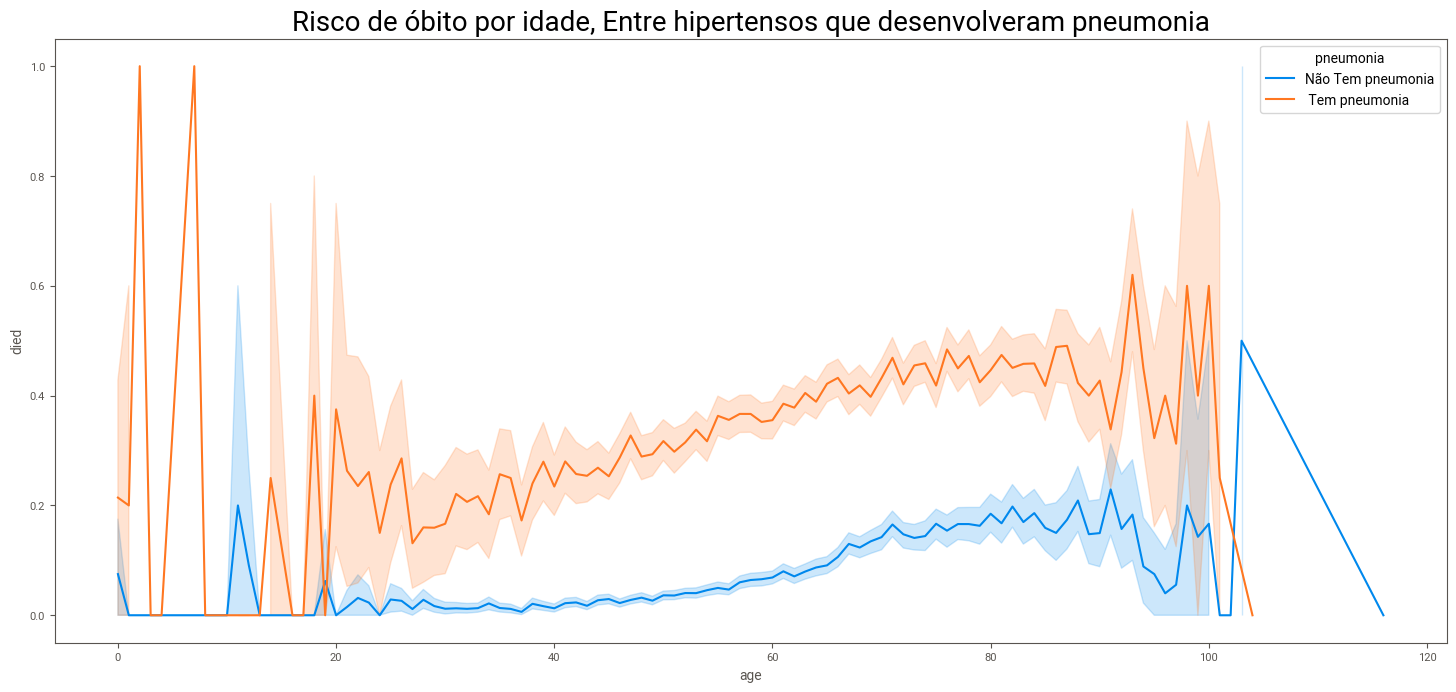

In [62]:
plt.figure(figsize =(16,8))
sns.lineplot(data=hiper,
             x='age',
             y='died',
             hue='pneumonia',)
#plt.xlim(18,45)
plt.title('Risco de óbito por idade, Entre hipertensos que desenvolveram pneumonia',fontsize = 20)

Text(0.5, 1.0, 'Distribuição de riscos de óbito/idade entre hipertensos com diabetes')

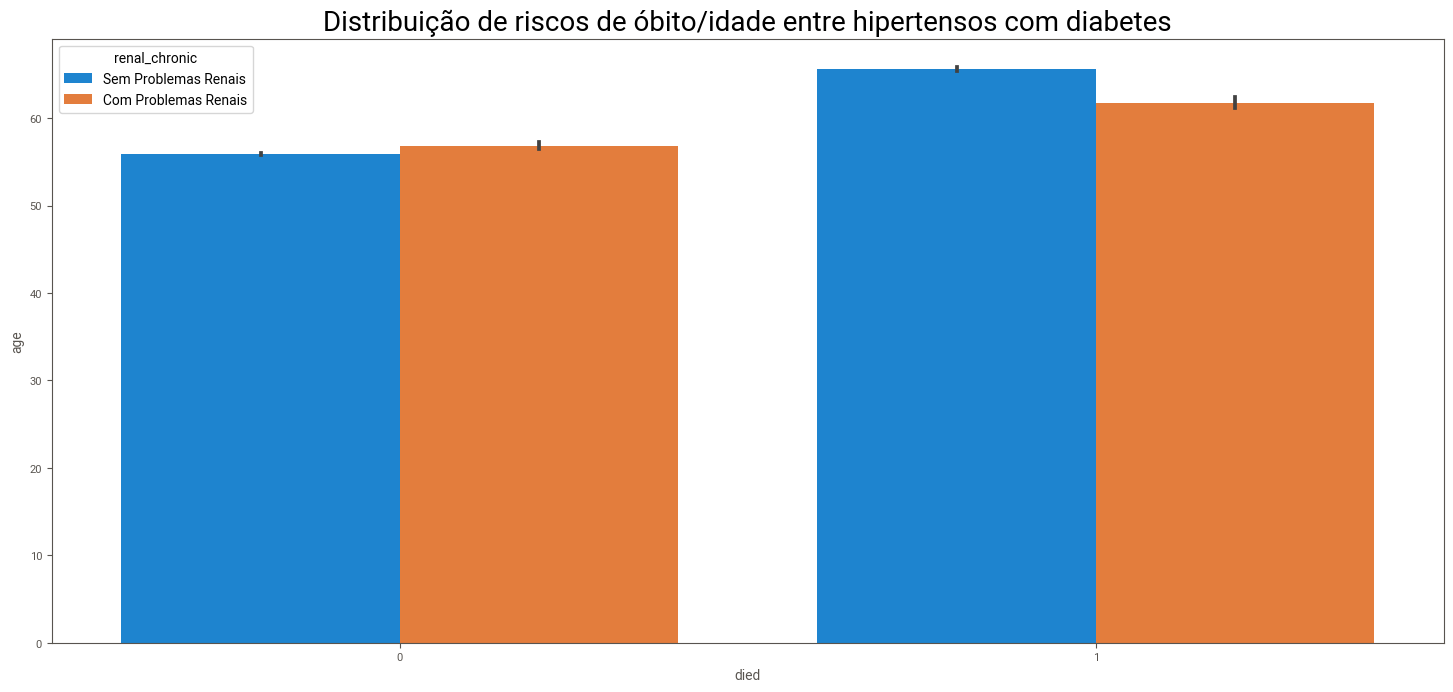

In [63]:
plt.figure(figsize =(16,8))
sns.barplot(data =hiper ,y = 'age', x = 'died', hue = 'renal_chronic')
plt.title('Distribuição de riscos de óbito/idade entre hipertensos com diabetes', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de riscos de óbito/idade entre hipertensos com diabetes')

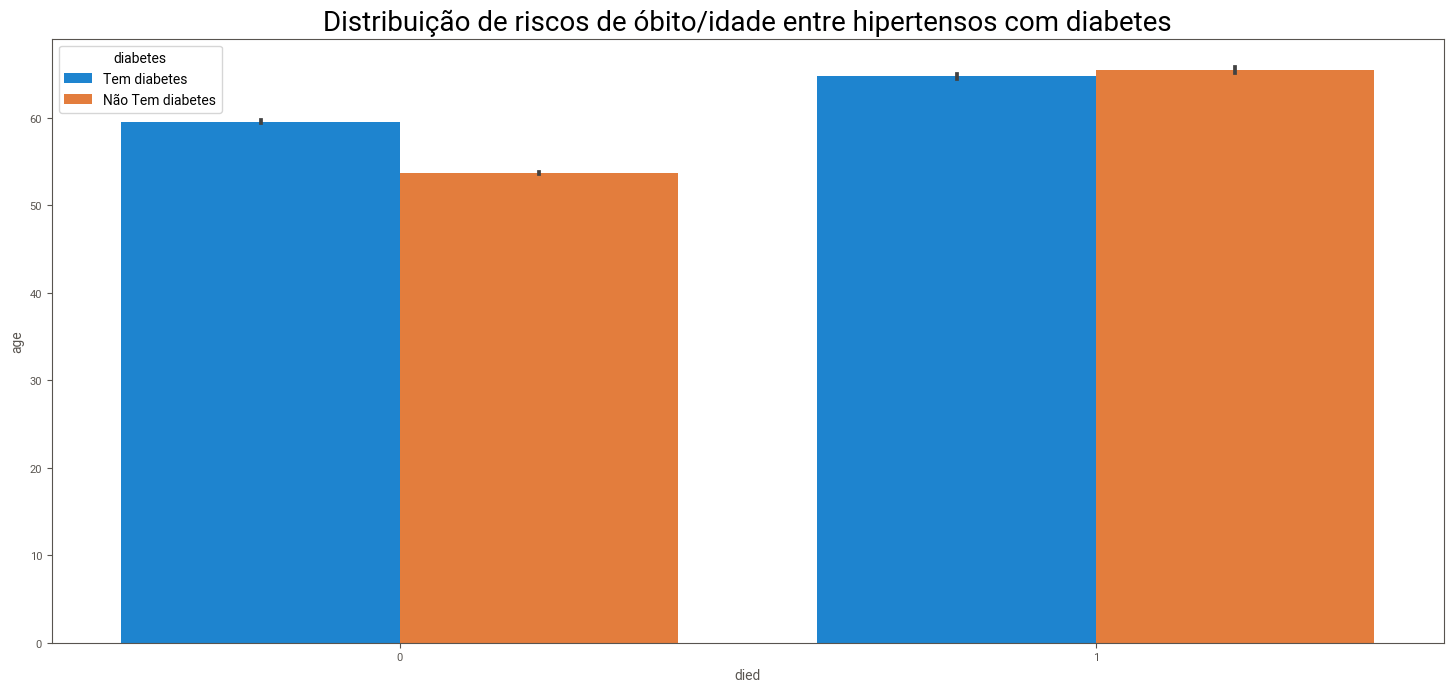

In [64]:
plt.figure(figsize =(16,8))
sns.barplot(data =hiper ,y = 'age', x = 'died', hue = 'diabetes')
plt.title('Distribuição de riscos de óbito/idade entre hipertensos com diabetes', fontsize = 20)

Text(0.5, 1.0, 'Distribuição de riscos de óbito/idade entre hipertensos com pneumonia')

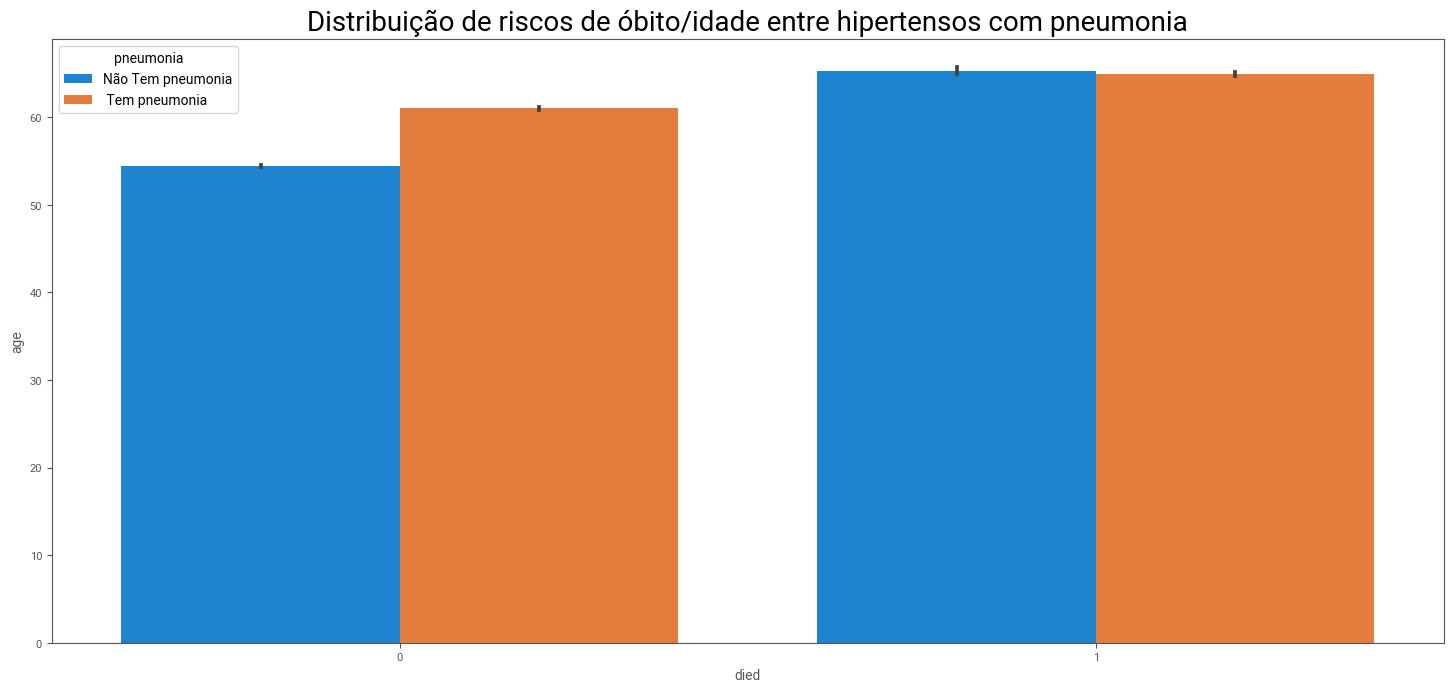

In [65]:
plt.figure(figsize =(16,8))
sns.barplot(data =hiper ,y = 'age', x = 'died', hue = 'pneumonia')
plt.title('Distribuição de riscos de óbito/idade entre hipertensos com pneumonia', fontsize = 20)

### Resposta

A principio dentro da nossa amostra o fator hipertensão está correlacionado ao óbito. Logo, se vier acompanhada de outros fatores como:

- Pneumonia
- Foi intubada e está na UTI
- Re-infecção
- Diabetes
- Problemas Renais

Há aumento de do risco de vir a óbito.

Dados sobre os hipertensos:

```
Temos 92508 pessoas infectadas. Onde 15136 vieram á óbito e 77372 mil se recuperam
Assim tivemos um taxa de letalidade nessa amostra de 19.56 %
Média de idades de pessoas que viream a óbito é 65.05 anos com desvio padrão de 6.48
Pessoas Obesas em nossa amostra 43.08 %
Pessoas re-infectadas em nossa amostra 47.88 %
Pessoas que desenvolveram pneumonia em nossa amostra 45.51 %
Pessoas com Diabetes em nossa amostra 68.92 %
Pessoas com Problemas Renais em nossa amostra 8.64 %
```

É inferido que idade avançada, ou seja, indivíduos com idade superior a 60 anos e hipertensos tem maior risco de óbito. Portanto vamos apenas focar nas comorbidades que possam geram mais risco.

Novamente, vemos que o fator pneumonia é  um agravante muito perigoso e que indivíduos que desenvolveram tem maior chance de vir a óbito. O risco de óbito em casos de re-infeção são alto em indivíduos a partir de $40$ anos. A obesidade não tem correlação forte com os risco de óbito, porém $43.03$% dos hipertensos que vieram à óbito eram obeso. Assim, pode existir uma causa que é necessário investigação.

Concluímos que hipertensão é fator de risco que aumenta de acordo com idade do individuo. E também é agravada se vier com outras comorbidades.

## Machine Learning

**Desenvolva um modelo preditivo de classificação para predição da variável de internação (coluna “icu”) da base de dados e avalie métricas relevantes;**

Para isso, iremos usar uma Técnica de AutoML usando o Framework pycaret

In [66]:
from pycaret.classification import *

**impando dos dados**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   566602 non-null  object 
 1   sex                  566602 non-null  float64
 2   patient_type         566602 non-null  float64
 3   entry_date           566602 non-null  object 
 4   date_symptoms        566602 non-null  object 
 5   date_died            36176 non-null   object 
 6   intubed              121789 non-null  float64
 7   pneumonia            566591 non-null  float64
 8   age                  566602 non-null  int64  
 9   pregnancy            277903 non-null  float64
 10  diabetes             564621 non-null  float64
 11  copd                 564853 non-null  float64
 12  asthma               564850 non-null  float64
 13  inmsupr              564622 non-null  float64
 14  hypertension         564778 non-null  float64
 15  other_disease    

In [68]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [69]:
new_df = df.drop(['date_symptoms','date_died','contact_other_covid','entry_date','id','died','patient_type','intubed'],axis = 1 )
new_df.dropna(subset = ['icu','covid_res'],inplace = True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107423 entries, 2 to 499688
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sex             107423 non-null  float64
 1   pneumonia       107423 non-null  float64
 2   age             107423 non-null  int64  
 3   pregnancy       42789 non-null   float64
 4   diabetes        106823 non-null  float64
 5   copd            106887 non-null  float64
 6   asthma          106891 non-null  float64
 7   inmsupr         106800 non-null  float64
 8   hypertension    106884 non-null  float64
 9   other_disease   106462 non-null  float64
 10  cardiovascular  106833 non-null  float64
 11  obesity         106840 non-null  float64
 12  renal_chronic   106871 non-null  float64
 13  tobacco         106844 non-null  float64
 14  covid_res       107423 non-null  float64
 15  icu             107423 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 13.9 MB


In [70]:
new_df['pregnancy'].fillna(0,inplace = True)
new_df.dropna(inplace = True)

In [71]:
new_df.isna().sum()

sex               0
pneumonia         0
age               0
pregnancy         0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
covid_res         0
icu               0
dtype: int64

In [72]:
age = std.fit_transform(new_df['age'].values.reshape(-1,1))
new_df['age'] = age # Normalizando a idade

Text(0.5, 1.0, 'Distribuição de Óbito/Recuperados')

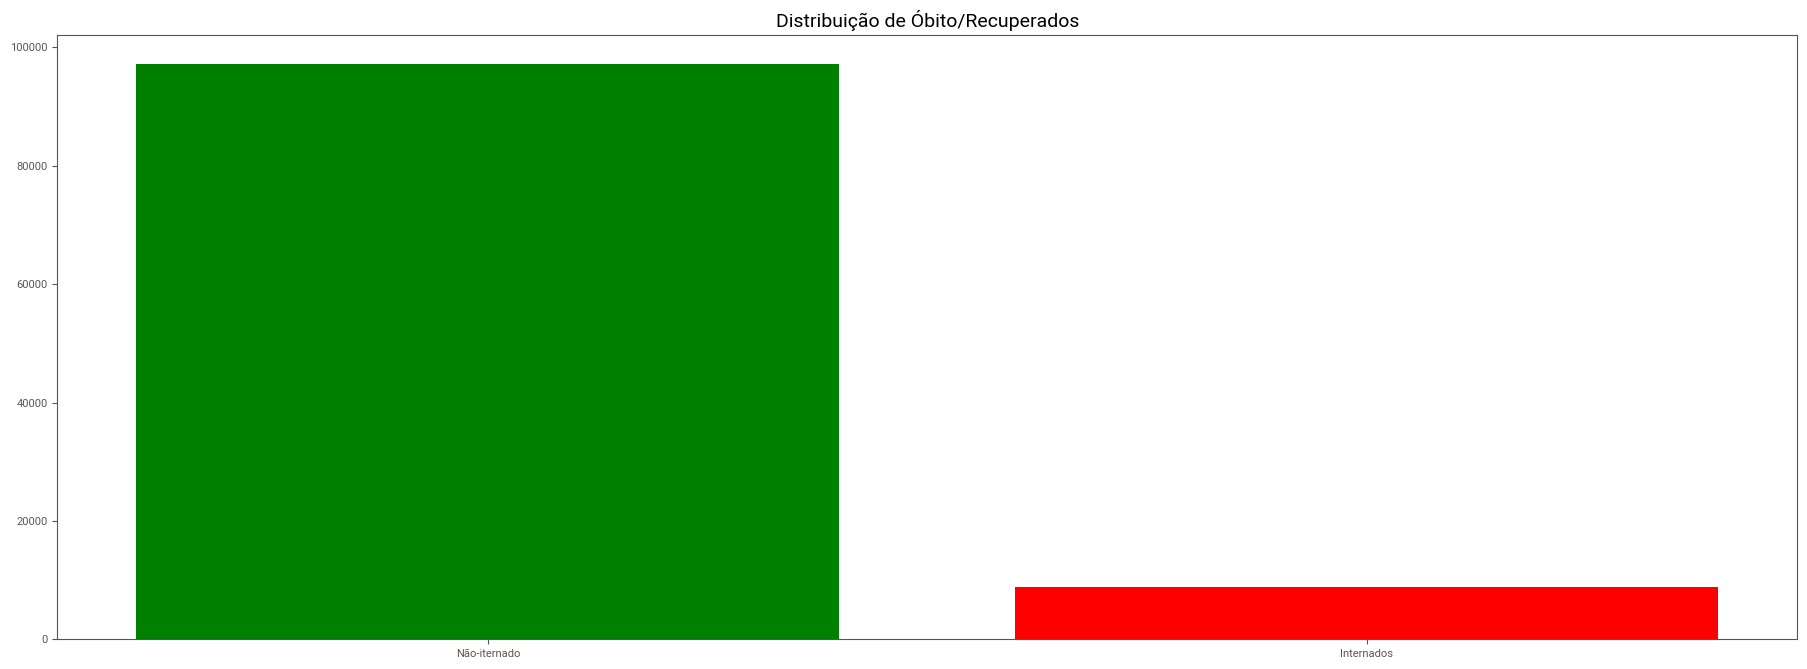

In [73]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.bar(['Não-iternado','Internados'],new_df['icu'].value_counts(), color= ['green','r'])
plt.title('Distribuição de Óbito/Recuperados', fontsize = 14)

Os dados estão desbalanceados

In [74]:
s = setup( new_df
          ,target = 'icu'
          ,fix_imbalance = True
          ,log_experiment = True
          ,experiment_name = 'covid-19'
          ,n_jobs = 20
         )

In [75]:
#best = compare_models(fold = 5)

In [76]:
catboost = create_model('catboost', fold = 5)

In [77]:
tuned_cat = tune_model(catboost,fold=10,n_iter = 15,choose_better = True)

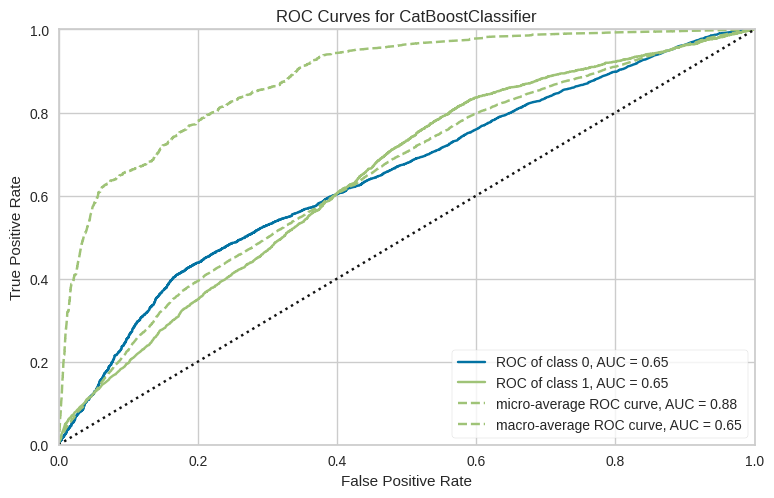

In [78]:
plot_model(tuned_cat, plot='auc')

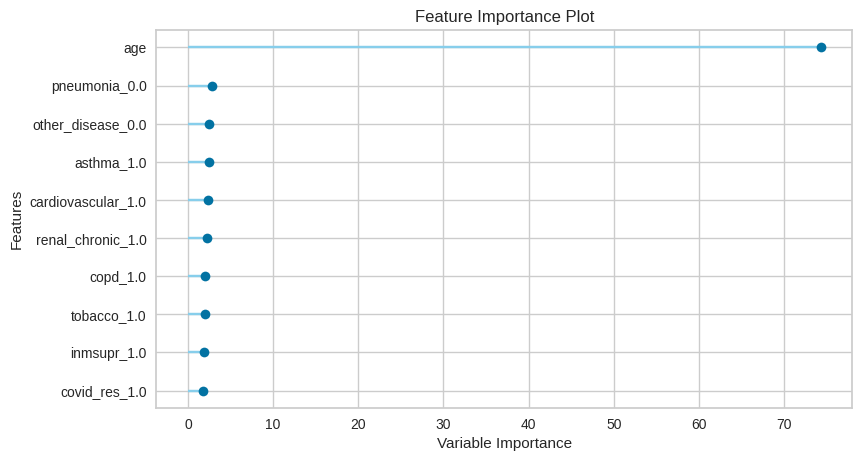

In [79]:
plot_model(tuned_cat, plot='feature')

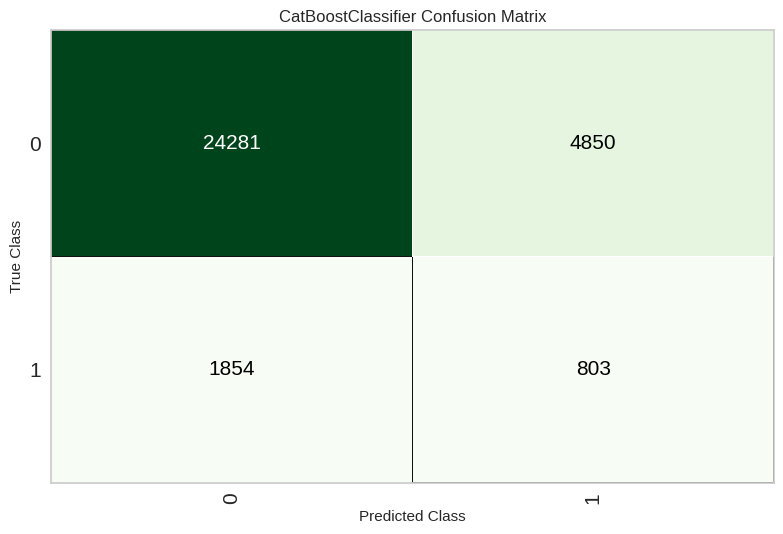

In [80]:
plot_model(tuned_cat, plot='confusion_matrix')

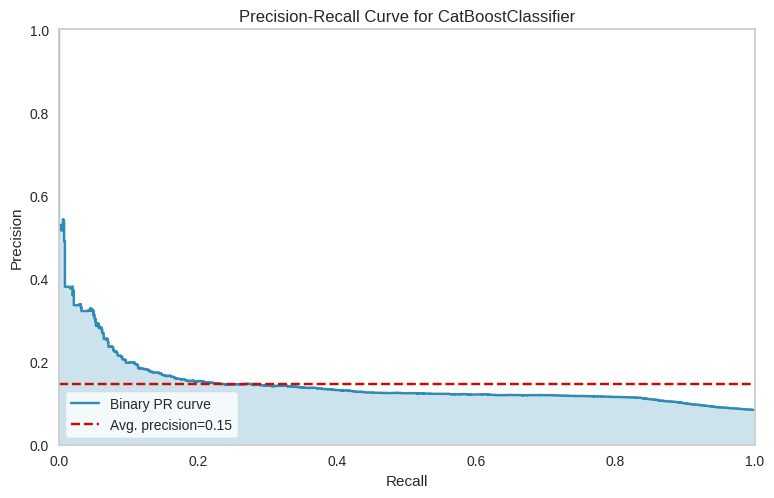

In [81]:
plot_model(tuned_cat, plot='pr')

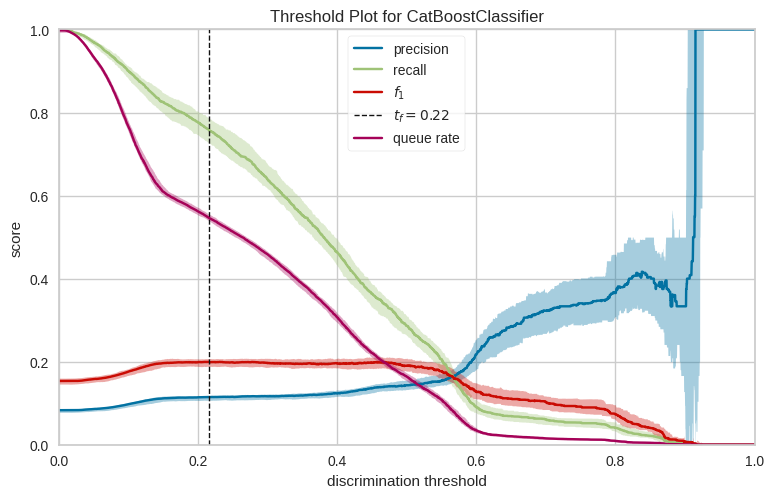

In [82]:
plot_model(tuned_cat, plot='threshold')

In [85]:
final_catboost = finalize_model(tuned_cat)

In [86]:
save_model(final_catboost,'modelo-final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='icu',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='icu')),
                 ('fix_perfect', Remove_100(target='icu')),
                 ('clean_names', Clean_

## Conclusão

No trabalho feito nesse notebook é baseado num conjunto de dados fornecido pelo governo do México, onde há informações de indivíduos contaminado pelo **Covid-19**. A partir desse conjunto fizemos uma analise, para extrair informações sobre risco de internação e óbito. No primeiro momento é escolhido analisar o risco de óbito devido a sua completeza em relação ao conjunto de dados, já que o risco de internação,"ICU", possuía muito dados incompletos.

Feita análise de dados, é criado um algoritmo de classificação para tentar prever internações dado os fatores. Dessa forma usamos um framework, Pycaret, de **AutoML.** Usamos o método *SMOTE* para resolver o problema de dados não balanceados. Testamos alguns algoritmos e avaliamos a métricas de classificação. Assim, escolhemos o CatBoost Classifier onde é feito a, tunagem,avaliação e exportação do modelo para produção.

Existe a possibilidade de melhorar do algoritmo usando técnicas de enseble ou até tentar fazer uma Rede Neural para classificação, mas demanda um custo computacional um pouco alto.  Portanto, demandaria mais tempo. 

Finalmente vimos que a feature mais importatnte para o modelo foi a idade. É esperado já que média de idades para internações/óbitos são de $65$ anos.
